In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model

# Data Load

In [186]:
gold = pd.read_csv('./data/gold.csv', index_col=0)
silver = pd.read_csv('./data/silver.csv', index_col=0)
platinum = pd.read_csv('./data/platinum.csv', index_col=0)

In [187]:
gold['Date'] = pd.to_datetime(gold['Date'], format = '%Y-%m-%d')
silver['Date'] = pd.to_datetime(silver['Date'], format = '%Y-%m-%d')
platinum['Date'] = pd.to_datetime(platinum['Date'], format = '%Y-%m-%d')

In [4]:
gold_price = gold.set_index(keys = 'Date')
silver_price = silver.set_index(keys = 'Date')
platinum_price = platinum.set_index(keys = 'Date')

In [5]:
gold_diff = gold_price.diff().dropna()
silver_diff = silver_price.diff().dropna()
platinum_diff = platinum_price.diff().dropna()

In [3]:
exchange = pd.read_csv('./data/exchange.csv', index_col=0)

In [11]:
exchange0 = exchange[['0']]
exchange1 = exchange[['1']]
exchange2 = exchange[['2']]
exchange3 = exchange[['3']]
exchange4 = exchange[['4']]
exchange5 = exchange[['5']]
exchange6 = exchange[['6']]
exchangeOT = exchange[['OT']]

In [12]:
exchange0.rename(columns={'0':'y'}, inplace =True)
exchange1.rename(columns={'1':'y'}, inplace =True)
exchange2.rename(columns={'2':'y'}, inplace =True)
exchange3.rename(columns={'3':'y'}, inplace =True)
exchange4.rename(columns={'4':'y'}, inplace =True)
exchange5.rename(columns={'5':'y'}, inplace =True)
exchange6.rename(columns={'6':'y'}, inplace =True)
exchangeOT.rename(columns={'OT':'y'}, inplace =True)

C:\Users\Seungyun\AppData\Local\Temp\ipykernel_24096\3491300796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange0.rename(columns={'0':'y'}, inplace =True)
C:\Users\Seungyun\AppData\Local\Temp\ipykernel_24096\3491300796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange1.rename(columns={'1':'y'}, inplace =True)
C:\Users\Seungyun\AppData\Local\Temp\ipykernel_24096\3491300796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [13]:
exchange0_diff = exchange0['y'].diff().dropna()
exchange1_diff = exchange1['y'].diff().dropna()
exchange2_diff = exchange2['y'].diff().dropna()
exchange3_diff = exchange3['y'].diff().dropna()
exchange4_diff = exchange4['y'].diff().dropna()
exchange5_diff = exchange5['y'].diff().dropna()
exchange6_diff = exchange6['y'].diff().dropna()
exchangeOT_diff = exchangeOT['y'].diff().dropna()

# Data Analysis

In [10]:
#ADF

def ADF(data):
    
    result = adfuller(data, autolag = 'AIC')
    
    print('-----ADF-----')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))

Gold Price
             Price
count  1290.000000
mean   1501.741550
std     254.202298
min    1162.000000
25%    1278.525000
50%    1411.600000
75%    1774.575000
max    2069.400000

Gold Price Differencing
             Price
count  1289.000000
mean      0.517145
std      14.645796
min     -97.300000
25%      -5.100000
50%       0.800000
75%       7.000000
max      93.200000


<Figure size 1200x600 with 0 Axes>

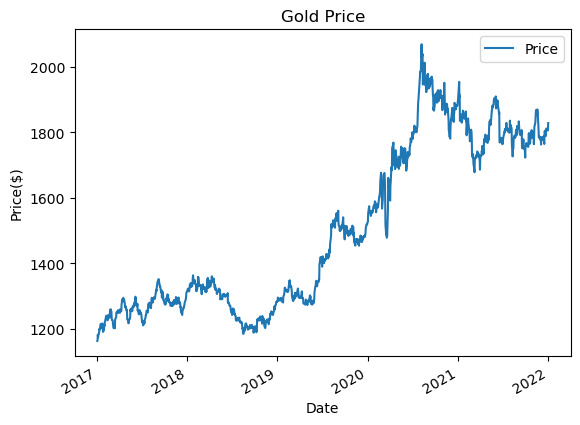

<Figure size 2000x600 with 0 Axes>

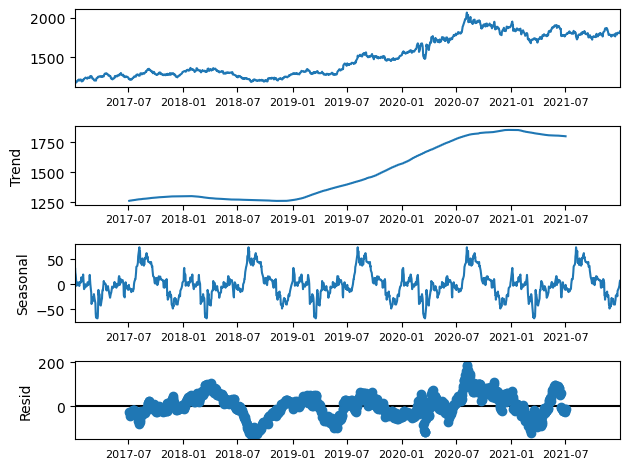

<Figure size 1200x600 with 0 Axes>

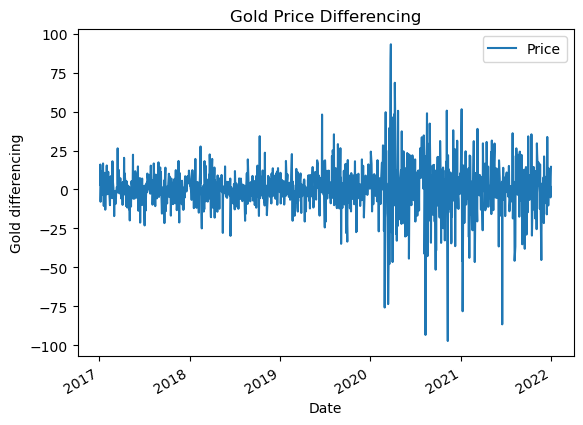

<Figure size 2000x600 with 0 Axes>

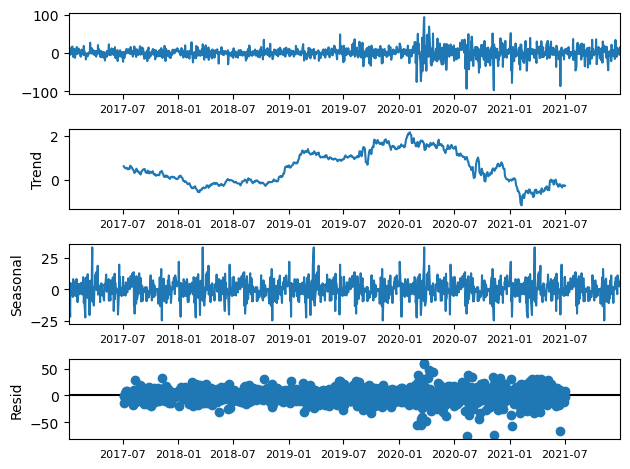

-----ADF-----
ADF Statistic: -0.806442
p-value: 0.8172225725
Lag: 6
observation: 1283
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
None
-----ADF-----
ADF Statistic: -17.368823
p-value: 0.0000000000
Lag: 5
observation: 1283
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


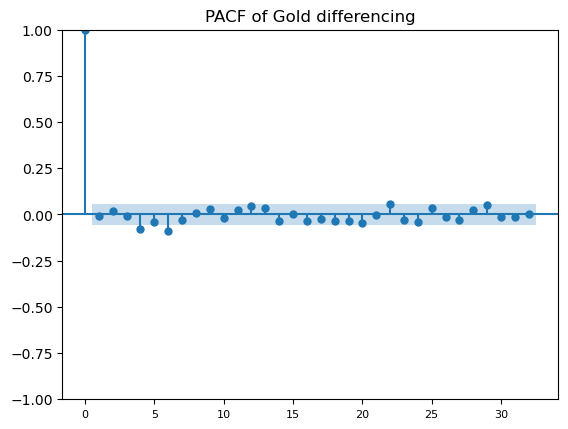

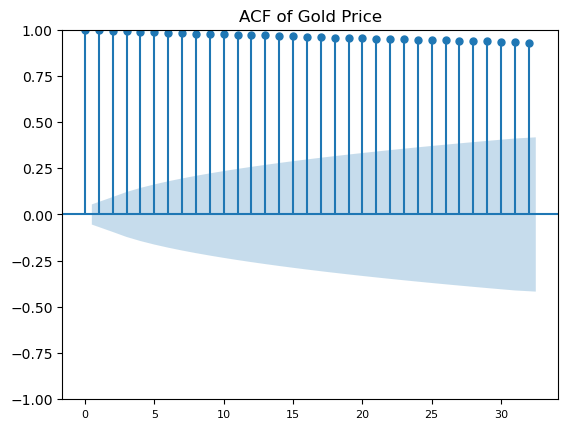

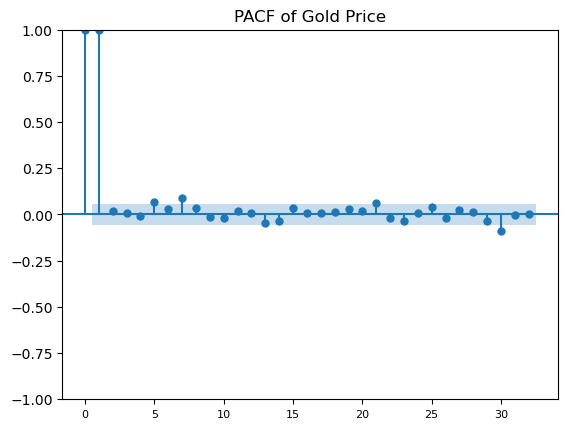

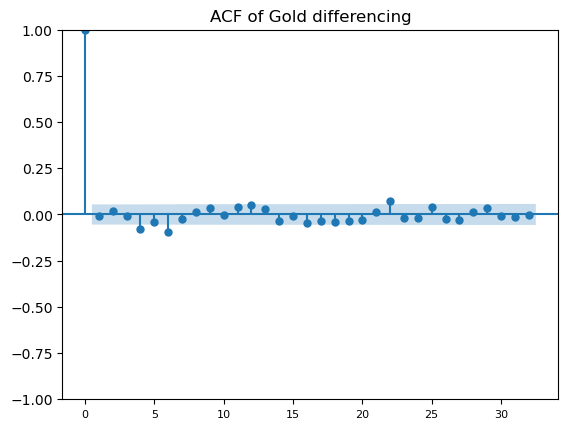

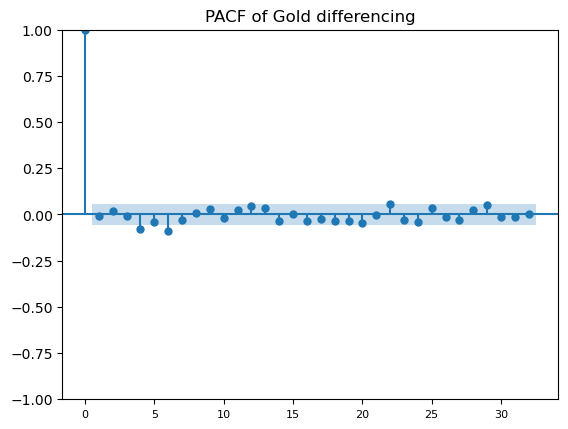

In [7]:
print('Gold Price')
print(gold_price.describe())
print()
print('Gold Price Differencing')
print(gold_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
gold_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Gold Price')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
gold_decomp = seasonal_decompose(gold_price, model = 'additive',  period = 258)
gold_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
gold_diff.plot(kind='line')
plt.ylabel('Gold differencing')
plt.title('Gold Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
gold_diff_decomp = seasonal_decompose(gold_diff, model = 'additive', period = 258)
gold_diff_decomp.plot()
plt.show()

#ADF
print(ADF(gold_price))
print(ADF(gold_diff))

#ACF,PACF
plot_acf(gold_price,title = 'ACF of Gold Price')
plot_pacf(gold_price, title = 'PACF of Gold Price')
plot_acf(gold_diff, title = 'ACF of Gold differencing')
plot_pacf(gold_diff, title = 'PACF of Gold differencing')

Silver Price
             Price
count  1280.000000
mean     18.938000
std       4.197287
min      11.770000
25%      16.032500
50%      17.150000
75%      23.095000
max      29.420000

Silver Price Differencing
             Price
count  1279.000000
mean      0.005426
std       0.387319
min      -3.210000
25%      -0.120000
50%       0.000000
75%       0.140000
max       2.510000


<Figure size 1200x600 with 0 Axes>

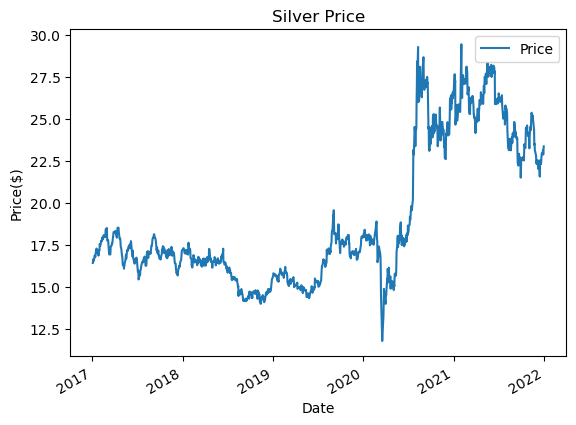

<Figure size 2000x600 with 0 Axes>

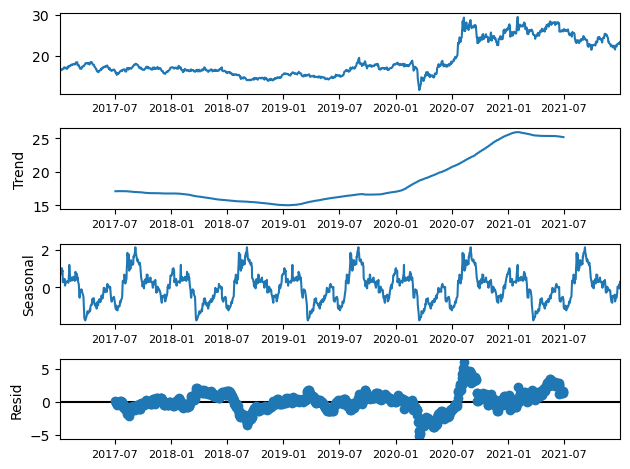

<Figure size 1200x600 with 0 Axes>

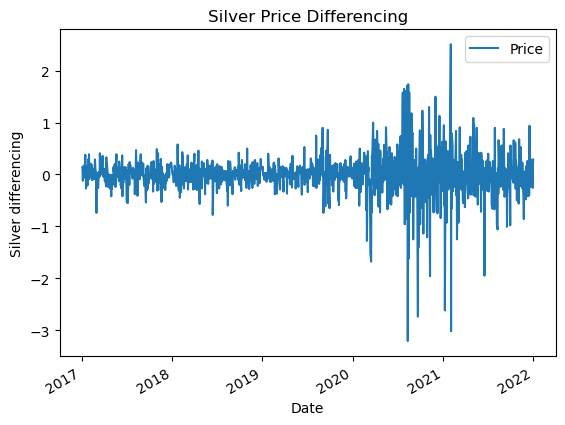

<Figure size 2000x600 with 0 Axes>

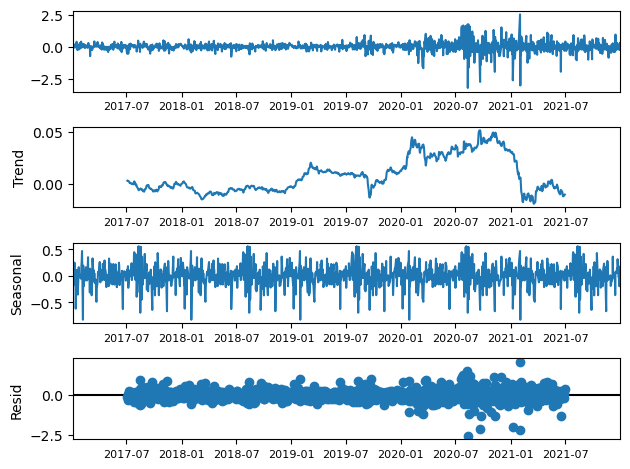

-----ADF-----
ADF Statistic: -1.380636
p-value: 0.5915234301
Lag: 16
observation: 1263
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
None
-----ADF-----
ADF Statistic: -8.479066
p-value: 0.0000000000
Lag: 15
observation: 1263
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


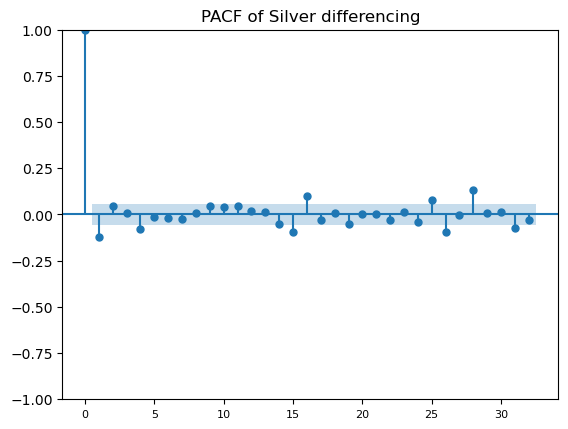

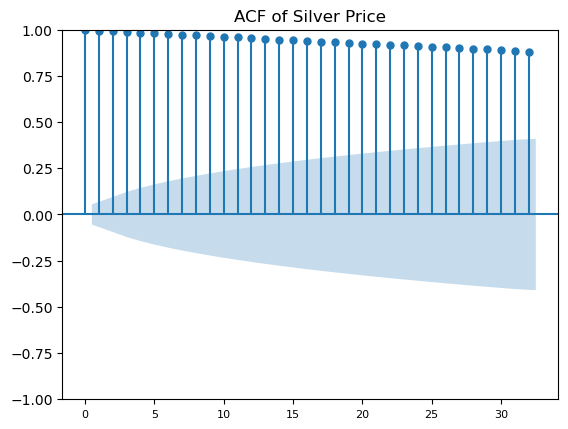

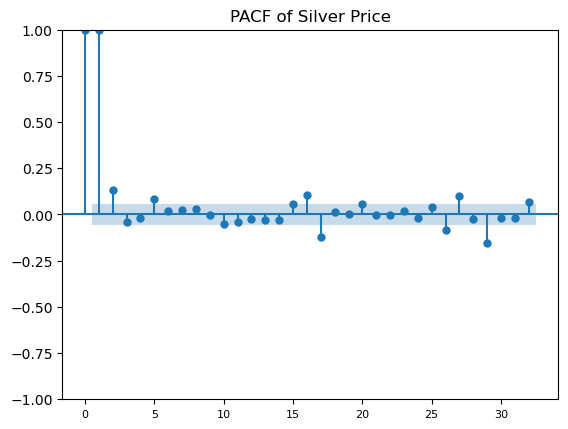

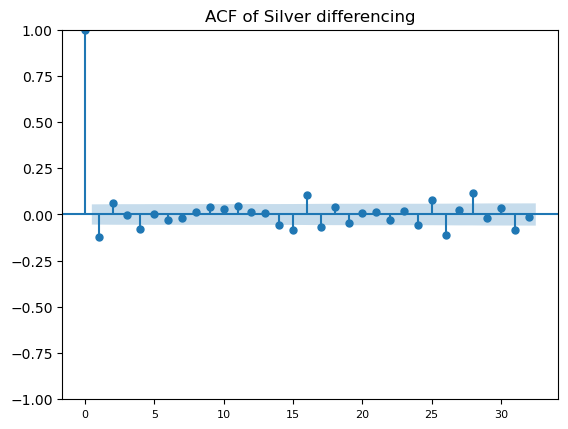

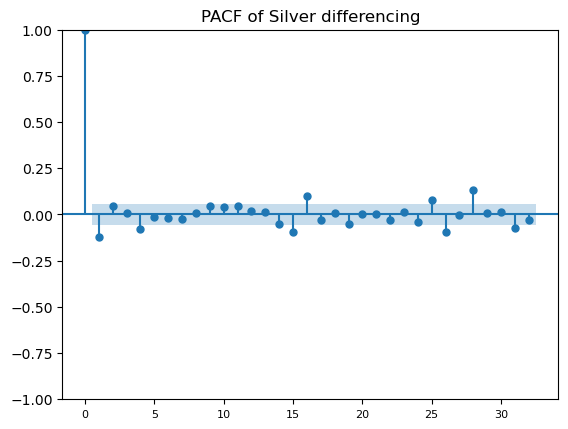

In [8]:
print('Silver Price')
print(silver_price.describe())
print()
print('Silver Price Differencing')
print(silver_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
silver_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Silver Price')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
silver_decomp = seasonal_decompose(silver_price, model = 'additive', period = 256)
silver_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
silver_diff.plot(kind='line')
plt.ylabel('Silver differencing')
plt.title('Silver Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
silver_diff_decomp = seasonal_decompose(silver_diff, model = 'additive', period = 256)
silver_diff_decomp.plot()
plt.show()

#ADF
print(ADF(silver_price))
print(ADF(silver_diff))

#ACF,PACF
plot_acf(silver_price, title = 'ACF of Silver Price')
plot_pacf(silver_price, title = 'PACF of Silver Price')
plot_acf(silver_diff, title = 'ACF of Silver differencing')
plot_pacf(silver_diff, title = 'PACF of Silver differencing')

Platinum Price
             Price
count  1557.000000
mean    937.764804
std     110.629828
min     595.200000
25%     856.800000
50%     930.050000
75%     986.050000
max    1318.750000

Platinum Price Differencing
             Price
count  1556.000000
mean      0.038303
std      14.353192
min    -100.550000
25%      -6.262500
50%       0.500000
75%       7.050000
max      69.450000


<Figure size 1200x600 with 0 Axes>

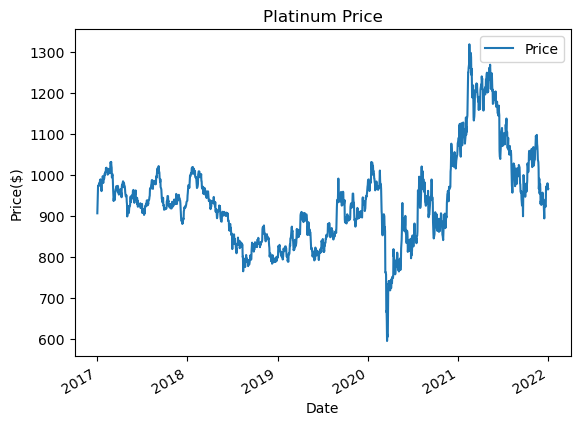

<Figure size 2000x600 with 0 Axes>

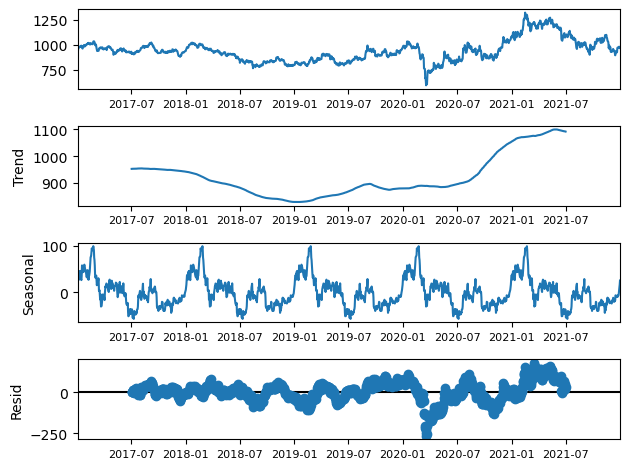

<Figure size 1200x600 with 0 Axes>

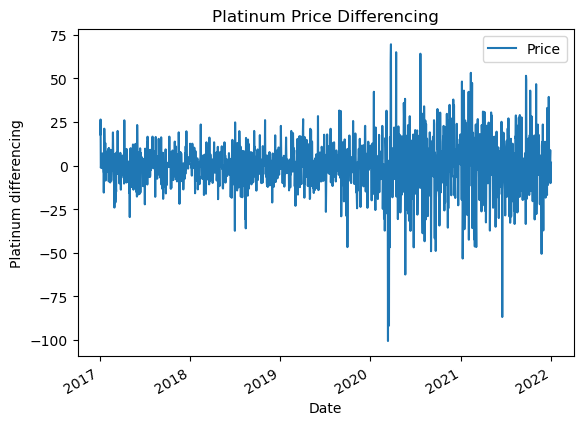

<Figure size 2000x600 with 0 Axes>

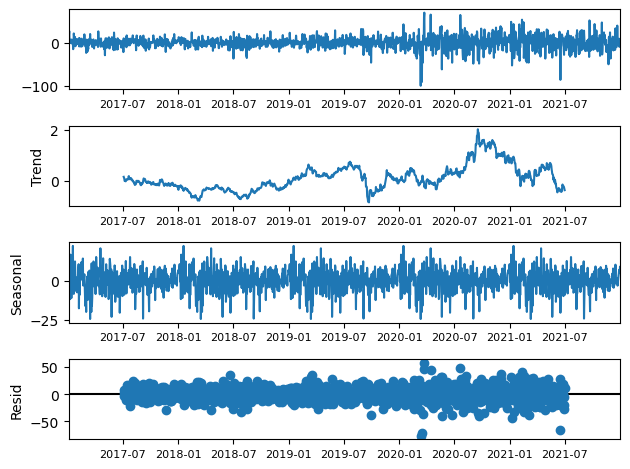

-----ADF-----
ADF Statistic: -2.563174
p-value: 0.1008497353
Lag: 0
observation: 1556
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
None
-----ADF-----
ADF Statistic: -14.583203
p-value: 0.0000000000
Lag: 9
observation: 1546
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


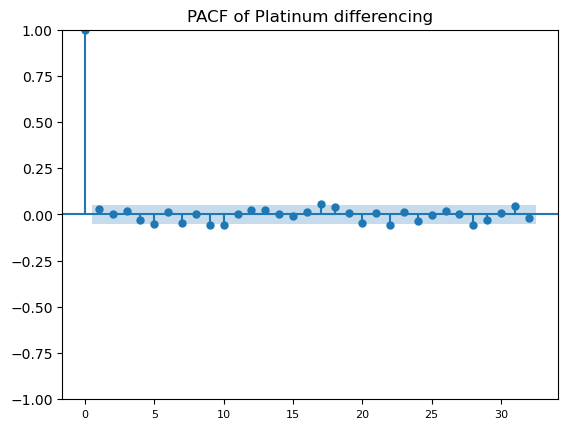

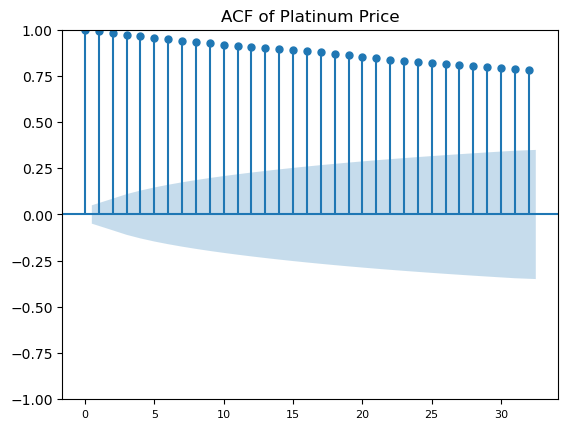

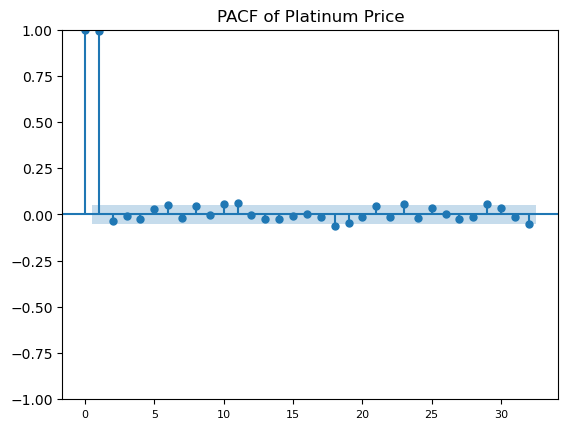

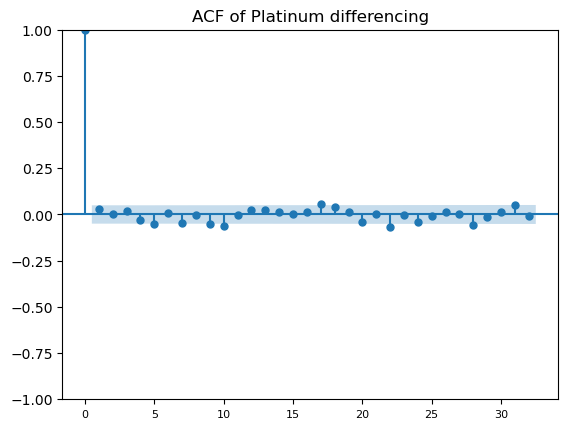

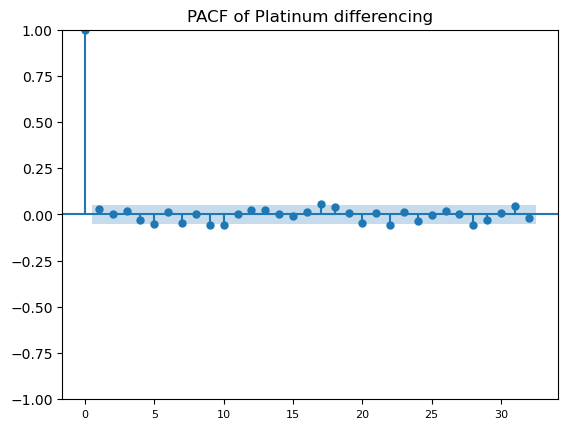

In [9]:
print('Platinum Price')
print(platinum_price.describe())
print()
print('Platinum Price Differencing')
print(platinum_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
platinum_price.plot(kind='line')
plt.ylabel('Price($)')
plt.title('Platinum Price')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
platinum_decomp = seasonal_decompose(platinum_price, model = 'additive', period = 311)
platinum_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
platinum_diff.plot(kind='line')
plt.ylabel('Platinum differencing')
plt.title('Platinum Price Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
platinum_diff_decomp = seasonal_decompose(platinum_diff, model = 'additive', period = 311)
platinum_diff_decomp.plot()
plt.show()

#ADF
print(ADF(platinum_price))
print(ADF(platinum_diff))

#ACF,PACF
plot_acf(platinum_price,title = 'ACF of Platinum Price')
plot_pacf(platinum_price, title = 'PACF of Platinum Price')
plot_acf(platinum_diff, title = 'ACF of Platinum differencing')
plot_pacf(platinum_diff, title = 'PACF of Platinum differencing')

Exchange 0
                 y
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536

Exchange 0 Differencing
count    7587.000000
mean       -0.000009
std         0.006049
min        -0.150073
25%        -0.002400
50%         0.000000
75%         0.002500
max         0.151362
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

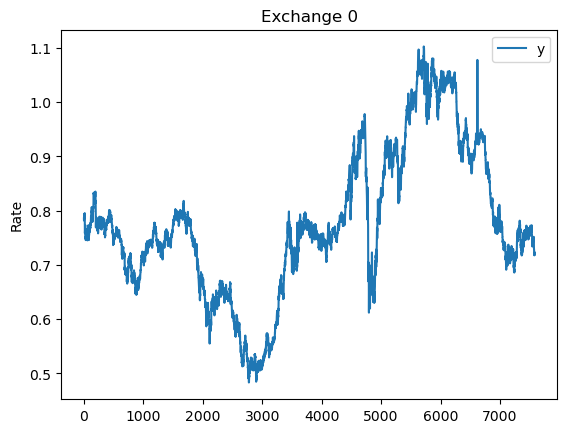

<Figure size 2000x600 with 0 Axes>

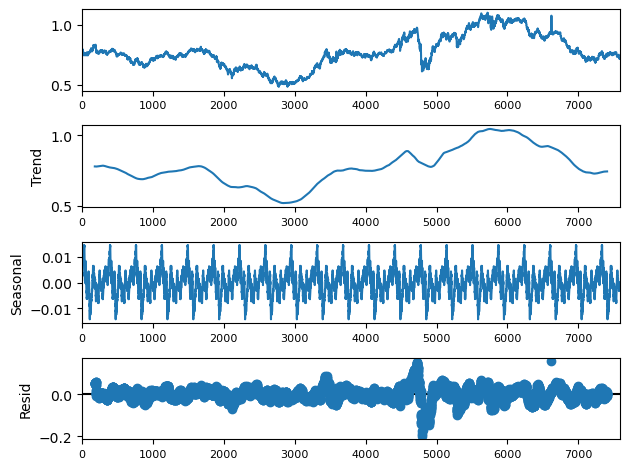

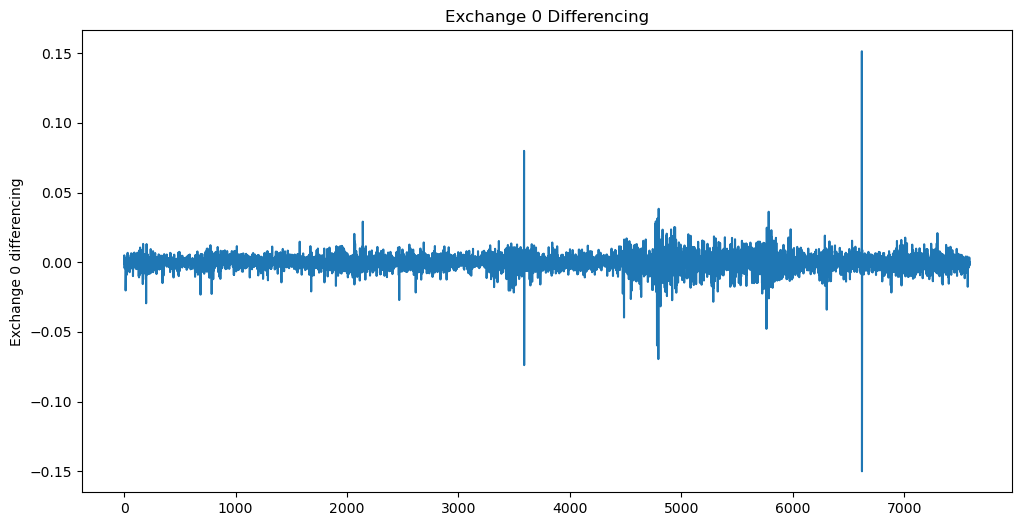

<Figure size 2000x600 with 0 Axes>

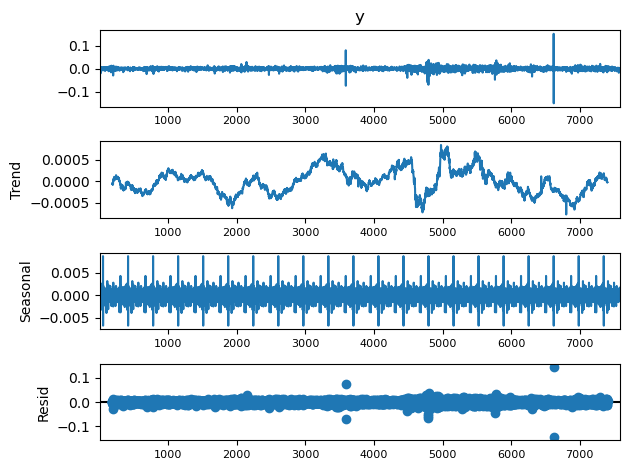

-----ADF-----
ADF Statistic: -1.664994
p-value: 0.4492327354
Lag: 1
observation: 7586
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -99.393431
p-value: 0.0000000000
Lag: 0
observation: 7586
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


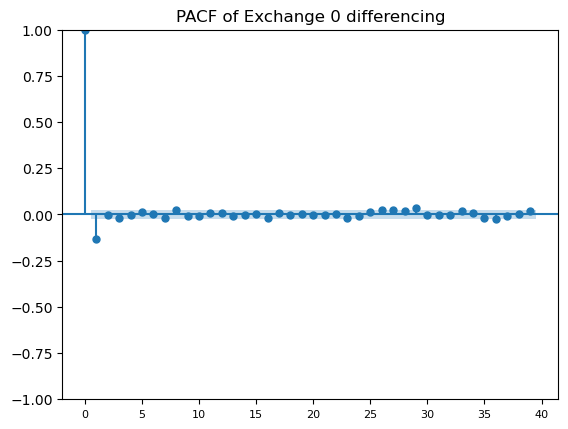

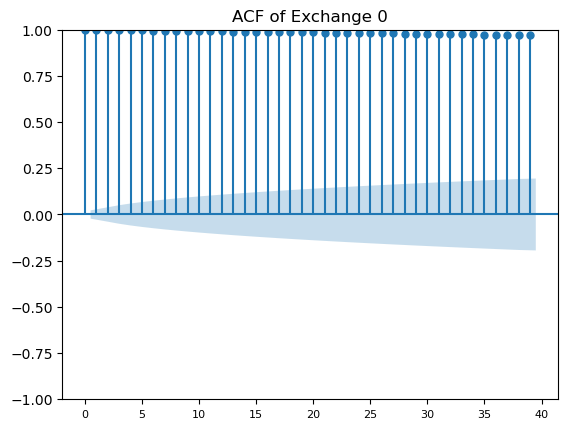

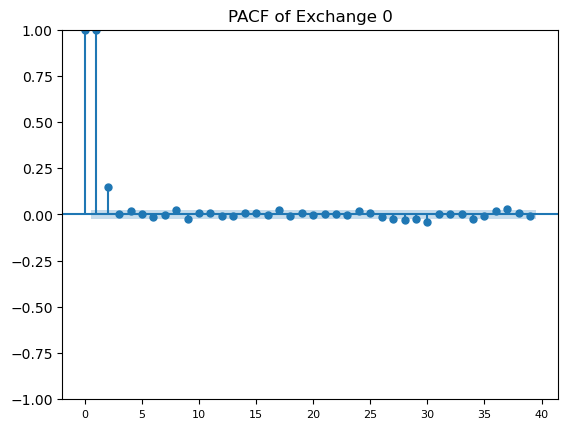

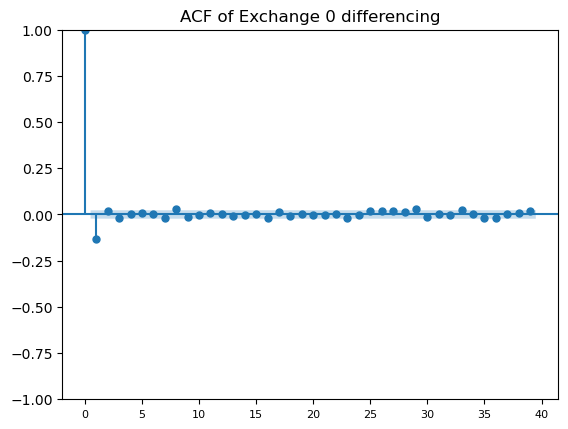

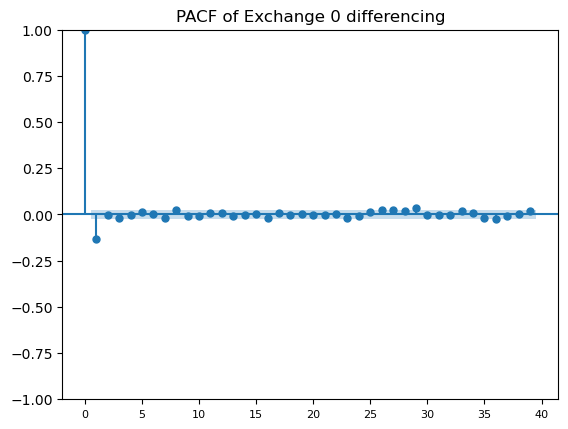

In [30]:
print('Exchange 0')
print(exchange0.describe())
print()
print('Exchange 0 Differencing')
print(exchange0_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange0.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 0')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange0_decomp = seasonal_decompose(exchange0, model = 'additive',  period = 365)
exchange0_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange0_diff.plot(kind='line')
plt.ylabel('Exchange 0 differencing')
plt.title('Exchange 0 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange0_diff_decomp = seasonal_decompose(exchange0_diff, model = 'additive', period = 365)
exchange0_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange0))
print(ADF(exchange0_diff))

#ACF,PACF
plot_acf(exchange0,title = 'ACF of Exchange 0')
plot_pacf(exchange0, title = 'PACF of Exchange 0')
plot_acf(exchange0_diff, title = 'ACF of Exchange 0 differencing')
plot_pacf(exchange0_diff, title = 'PACF of Exchange 0 differencing')

Exchange 1
                 y
count  7588.000000
mean      1.634105
std       0.161544
min       1.211534
25%       1.532887
50%       1.606574
75%       1.707646
max       2.109000

Exchange 1 Differencing
count    7587.000000
mean       -0.000050
std         0.010037
min        -0.188468
25%        -0.004300
50%         0.000000
75%         0.004579
max         0.192868
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

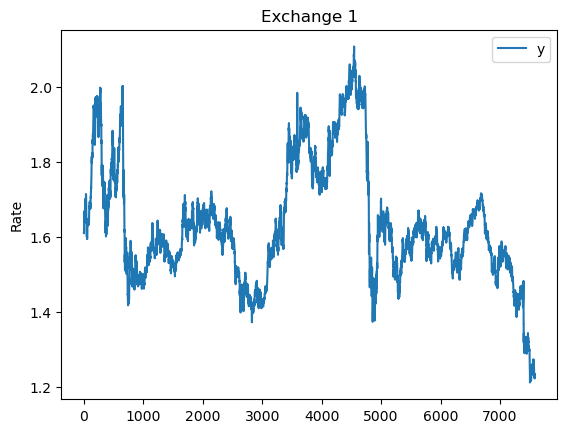

<Figure size 2000x600 with 0 Axes>

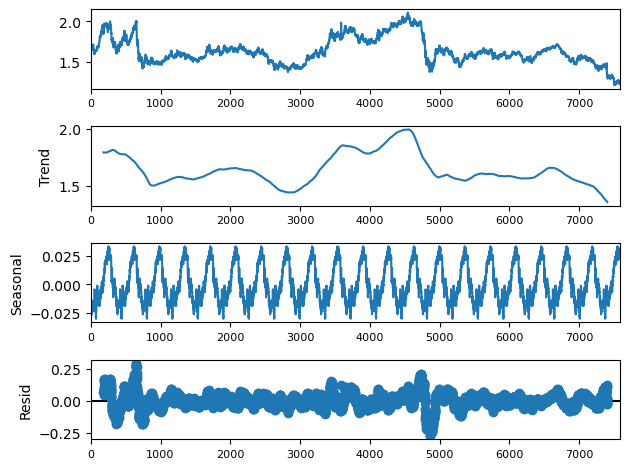

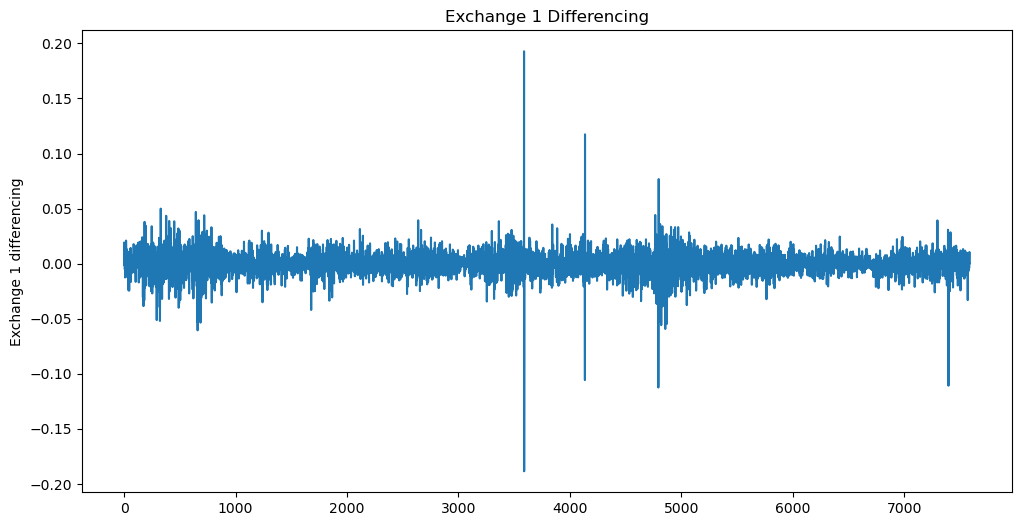

<Figure size 2000x600 with 0 Axes>

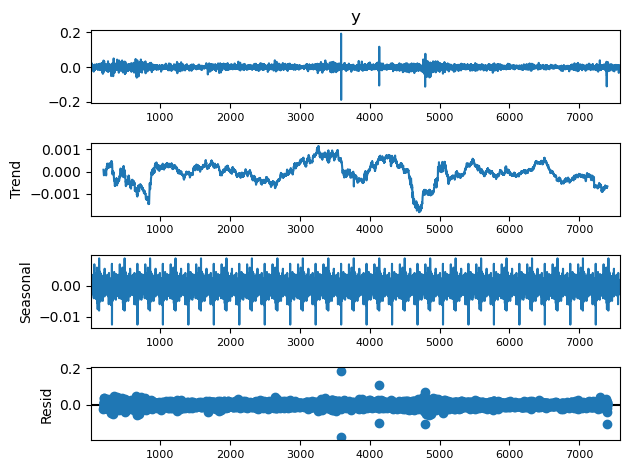

-----ADF-----
ADF Statistic: -2.149718
p-value: 0.2249980637
Lag: 14
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -22.636334
p-value: 0.0000000000
Lag: 13
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


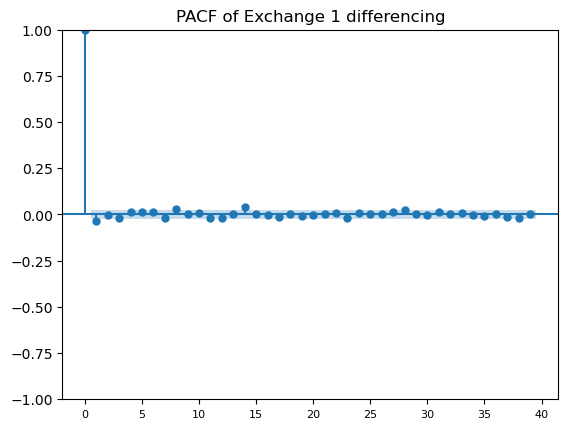

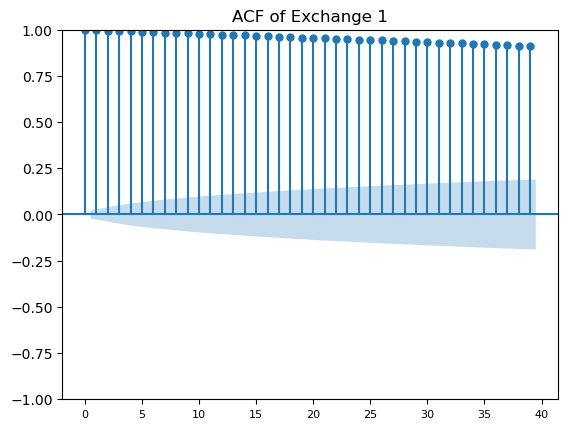

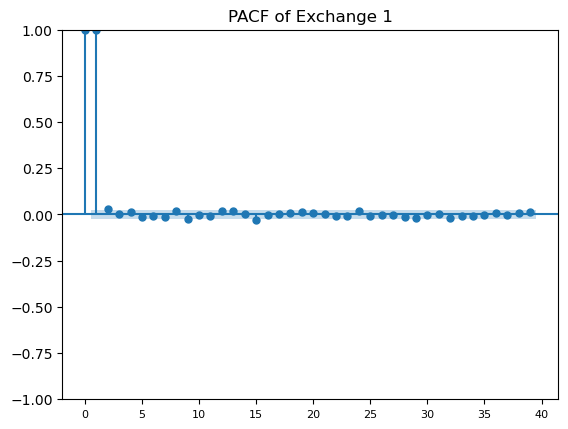

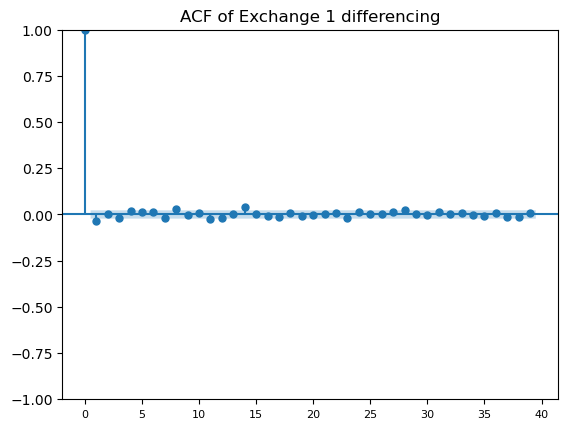

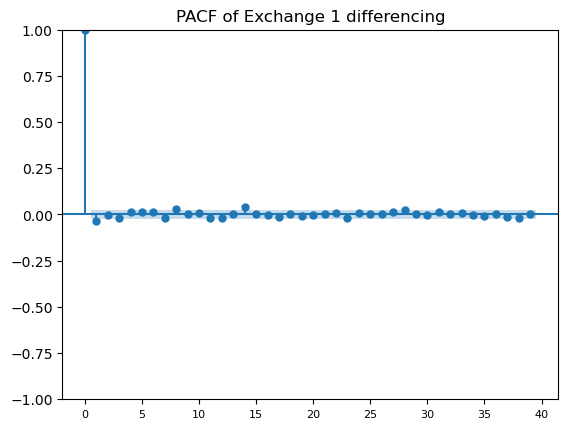

In [32]:
print('Exchange 1')
print(exchange1.describe())
print()
print('Exchange 1 Differencing')
print(exchange1_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange1.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 1')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange1_decomp = seasonal_decompose(exchange1, model = 'additive',  period = 365)
exchange1_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange1_diff.plot(kind='line')
plt.ylabel('Exchange 1 differencing')
plt.title('Exchange 1 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange1_diff_decomp = seasonal_decompose(exchange1_diff, model = 'additive', period = 365)
exchange1_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange1))
print(ADF(exchange1_diff))

#ACF,PACF
plot_acf(exchange1,title = 'ACF of Exchange 1')
plot_pacf(exchange1, title = 'PACF of Exchange 1')
plot_acf(exchange1_diff, title = 'ACF of Exchange 1 differencing')
plot_pacf(exchange1_diff, title = 'PACF of Exchange 1 differencing')

Exchange 2
                 y
count  7588.000000
mean      0.821811
std       0.117123
min       0.618582
25%       0.727901
50%       0.811582
75%       0.920394
max       1.091524

Exchange 2 Differencing
count    7587.000000
mean       -0.000015
std         0.004486
min        -0.088299
25%        -0.001636
50%         0.000000
75%         0.001653
max         0.091646
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

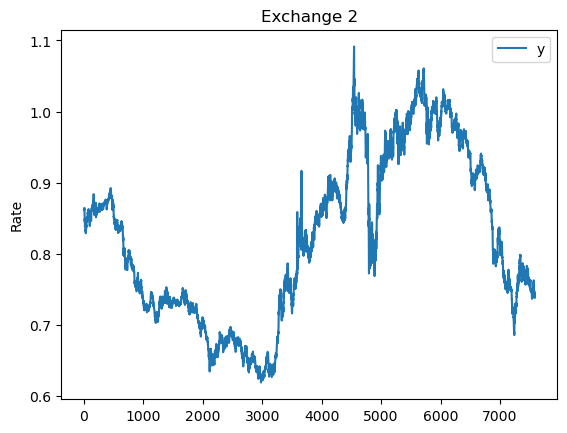

<Figure size 2000x600 with 0 Axes>

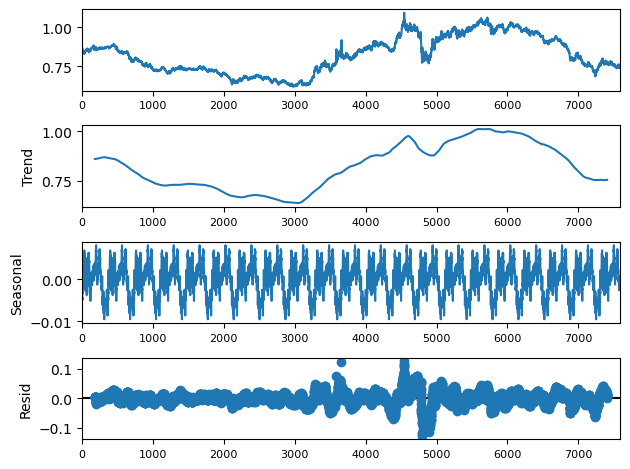

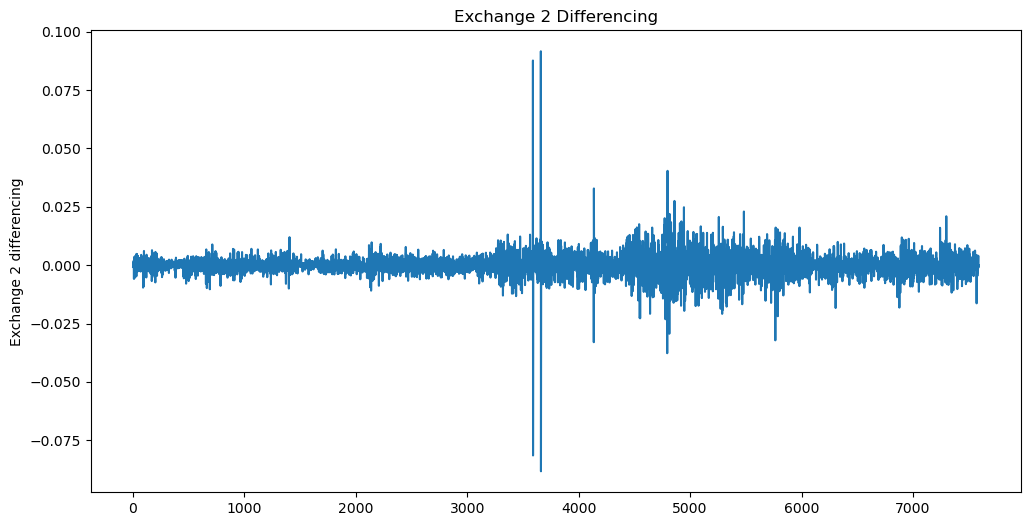

<Figure size 2000x600 with 0 Axes>

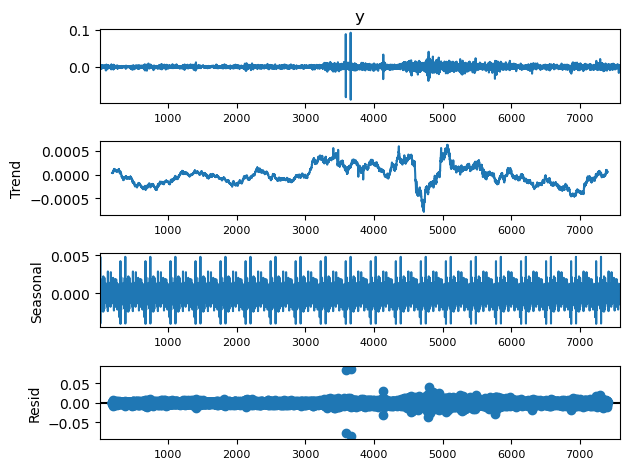

-----ADF-----
ADF Statistic: -1.352572
p-value: 0.6047908050
Lag: 7
observation: 7580
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -35.296871
p-value: 0.0000000000
Lag: 6
observation: 7580
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


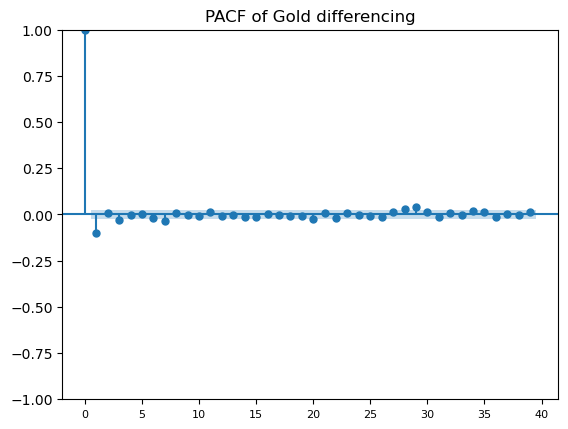

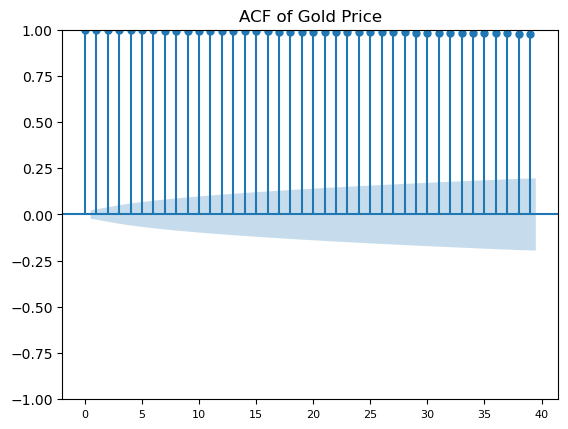

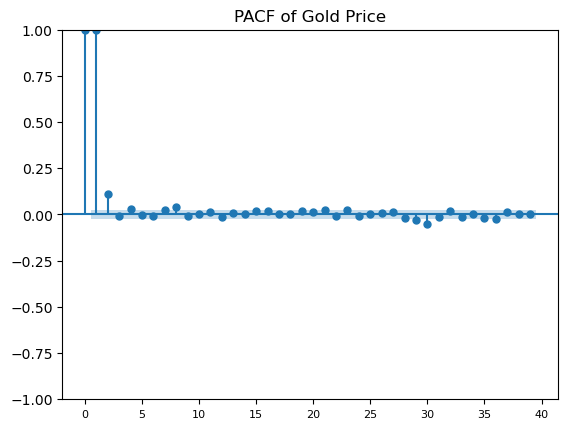

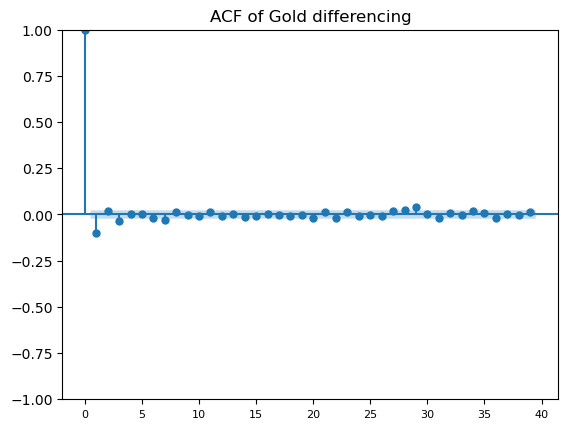

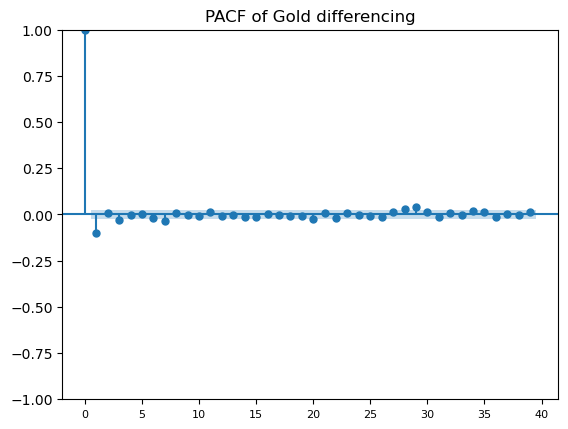

In [24]:
print('Exchange 2')
print(exchange2.describe())
print()
print('Exchange 2 Differencing')
print(exchange2_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange2.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 2')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange2_decomp = seasonal_decompose(exchange2, model = 'additive',  period = 365)
exchange2_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange2_diff.plot(kind='line')
plt.ylabel('Exchange 2 differencing')
plt.title('Exchange 2 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange2_diff_decomp = seasonal_decompose(exchange2_diff, model = 'additive', period = 365)
exchange2_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange2))
print(ADF(exchange2_diff))

#ACF,PACF
plot_acf(exchange2,title = 'ACF of Exchange 2')
plot_pacf(exchange2, title = 'PACF of Exchange 2')
plot_acf(exchange2_diff, title = 'ACF of Exchange 2 differencing')
plot_pacf(exchange2_diff, title = 'PACF of Exchange 2 differencing')

Exchange 3
                 y
count  7588.000000
mean      0.848146
std       0.168874
min       0.548617
25%       0.696864
50%       0.813959
75%       1.014018
max       1.374079

Exchange 3 Differencing
count    7587.000000
mean        0.000046
std         0.006416
min        -0.109971
25%        -0.002741
50%         0.000000
75%         0.002783
max         0.132340
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

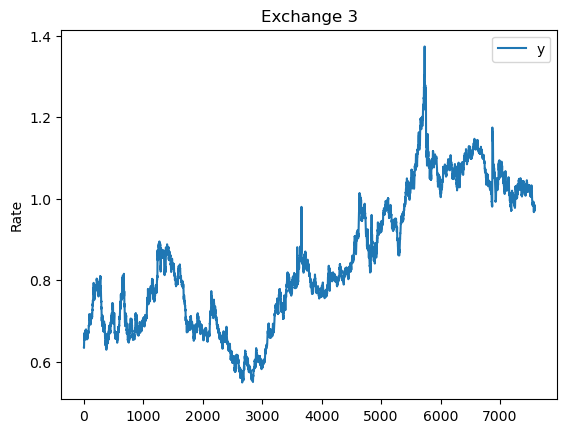

<Figure size 2000x600 with 0 Axes>

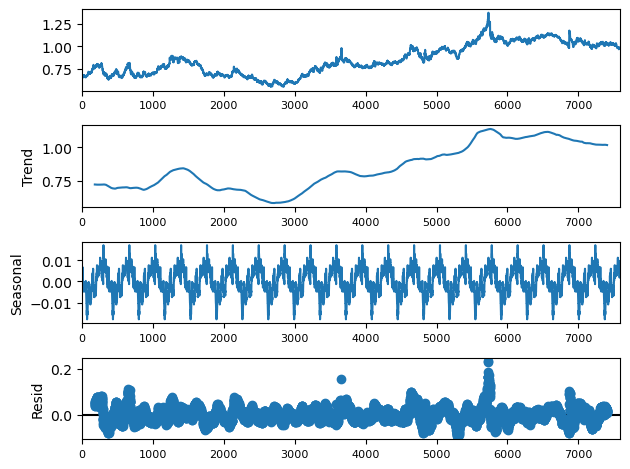

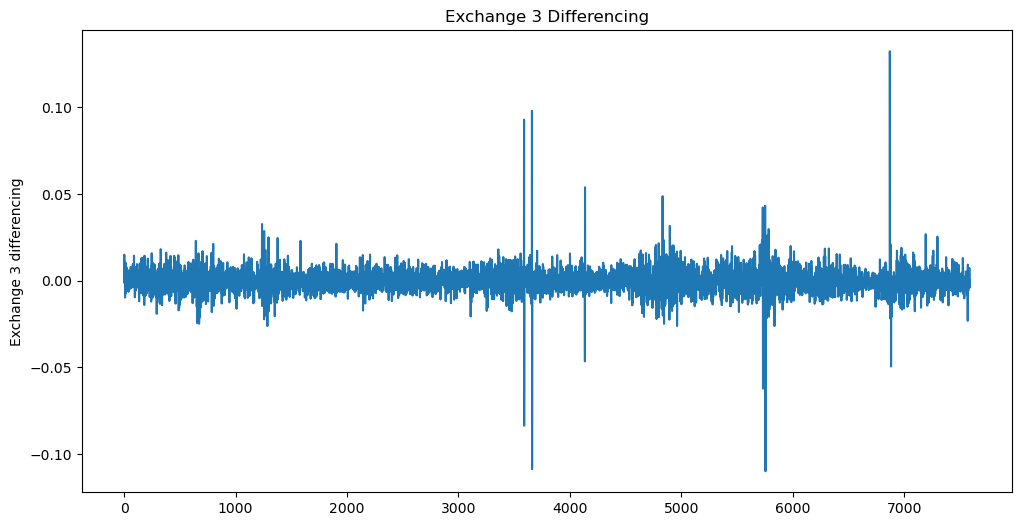

<Figure size 2000x600 with 0 Axes>

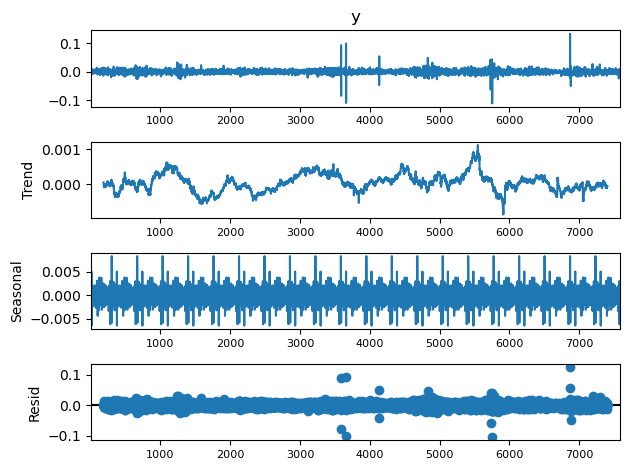

-----ADF-----
ADF Statistic: -1.586708
p-value: 0.4902670129
Lag: 14
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -24.489297
p-value: 0.0000000000
Lag: 13
observation: 7573
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


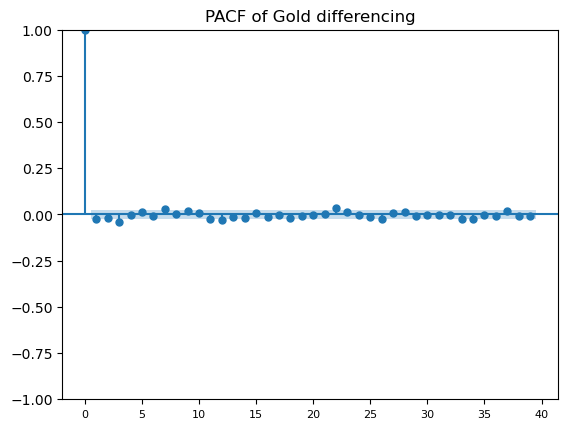

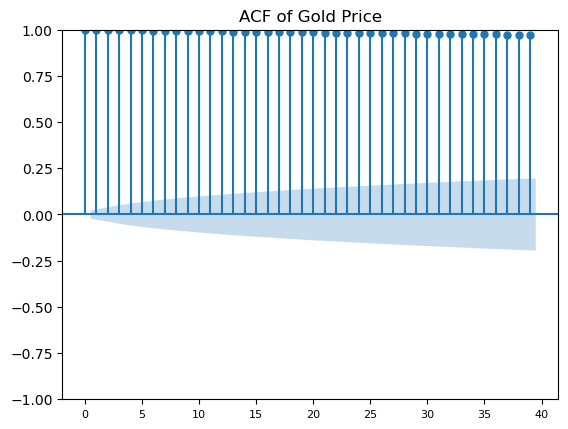

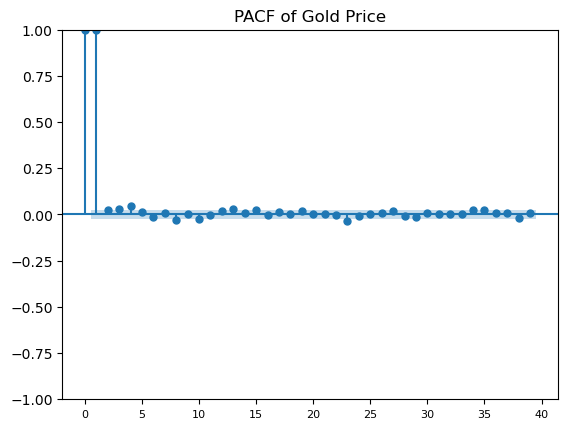

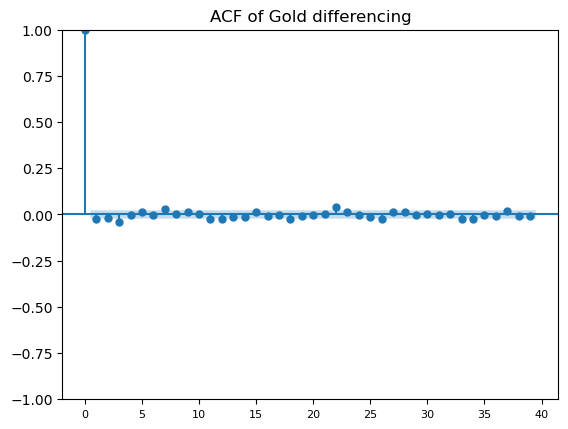

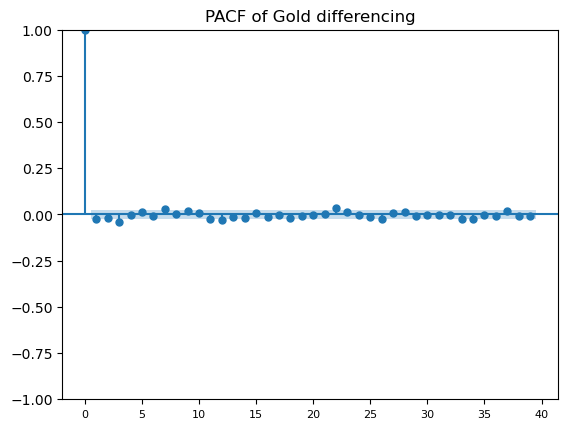

In [25]:
print('Exchange 3')
print(exchange3.describe())
print()
print('Exchange 3 Differencing')
print(exchange3_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange3.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 3')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange3_decomp = seasonal_decompose(exchange3, model = 'additive',  period = 365)
exchange3_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange3_diff.plot(kind='line')
plt.ylabel('Exchange 3 differencing')
plt.title('Exchange 3 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange3_diff_decomp = seasonal_decompose(exchange3_diff, model = 'additive', period = 365)
exchange3_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange3))
print(ADF(exchange3_diff))

#ACF,PACF
plot_acf(exchange3,title = 'ACF of Gold Price')
plot_pacf(exchange3, title = 'PACF of Gold Price')
plot_acf(exchange3_diff, title = 'ACF of Gold differencing')
plot_pacf(exchange3_diff, title = 'PACF of Gold differencing')

Exchange 4
                 y
count  7588.000000
mean      0.142833
std       0.023996
min       0.109292
25%       0.120814
50%       0.145212
75%       0.159948
max       0.237954

Exchange 4 Differencing
count    7587.000000
mean       -0.000009
std         0.001483
min        -0.076757
25%        -0.000005
50%         0.000000
75%         0.000012
max         0.076716
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

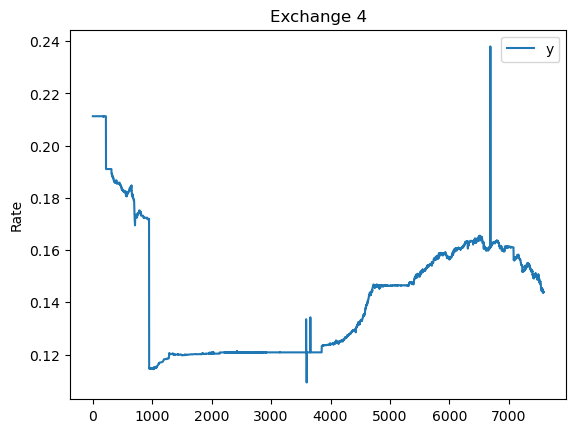

<Figure size 2000x600 with 0 Axes>

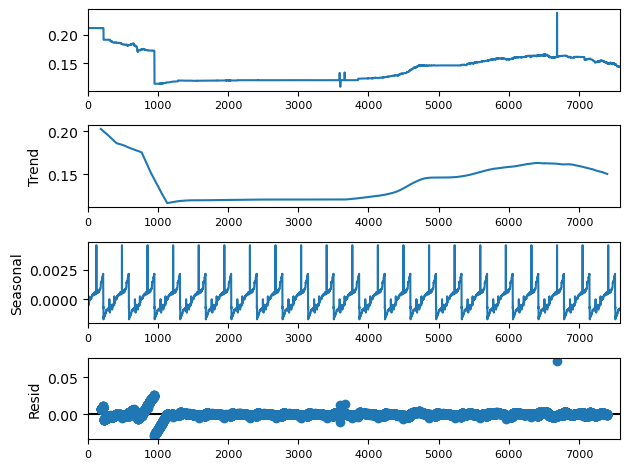

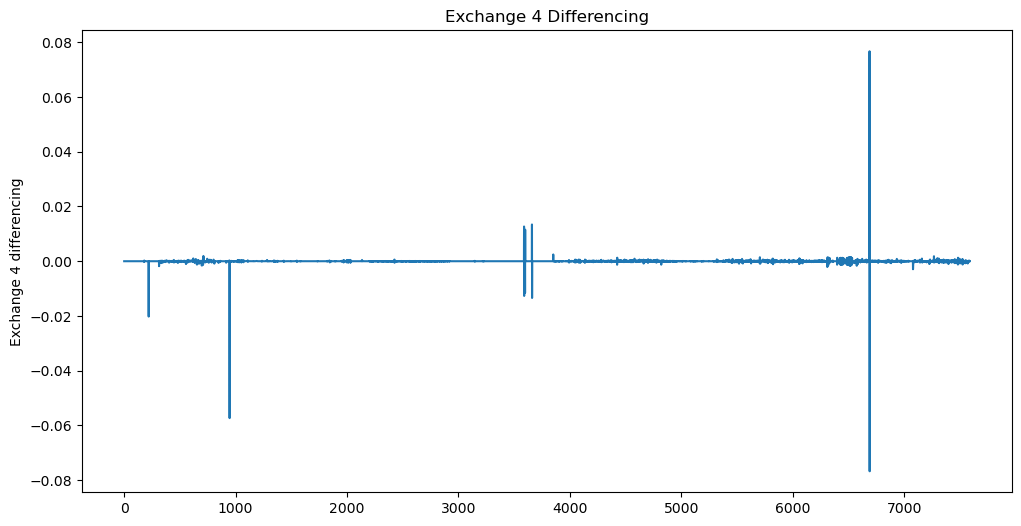

<Figure size 2000x600 with 0 Axes>

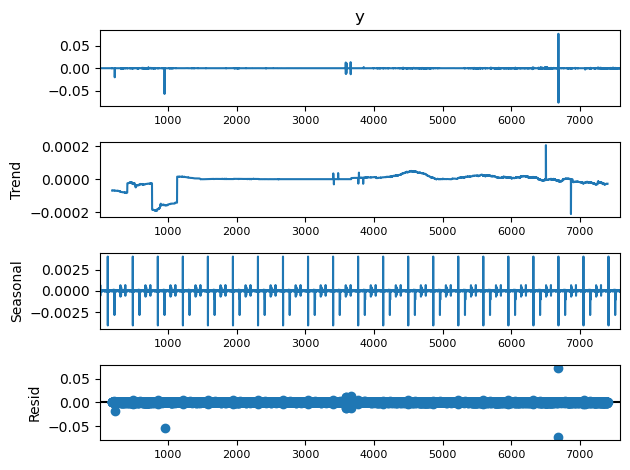

-----ADF-----
ADF Statistic: -2.869174
p-value: 0.0490518716
Lag: 5
observation: 7582
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -47.260145
p-value: 0.0000000000
Lag: 4
observation: 7582
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


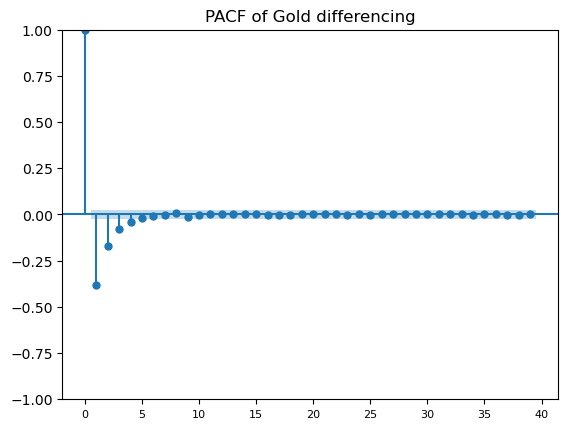

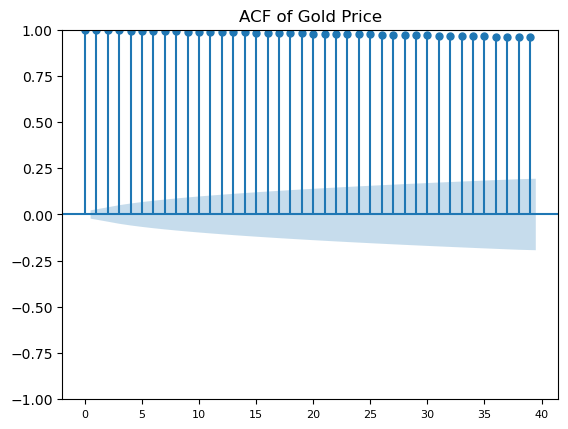

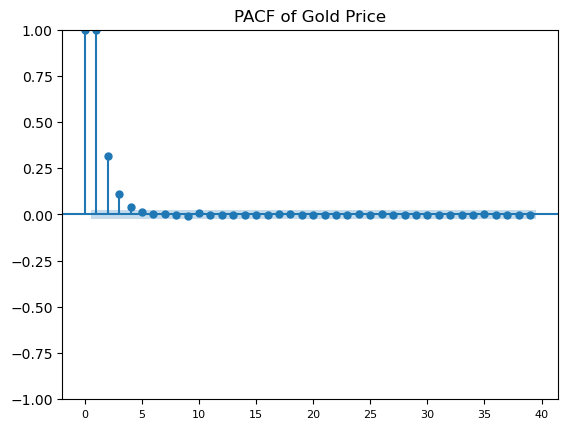

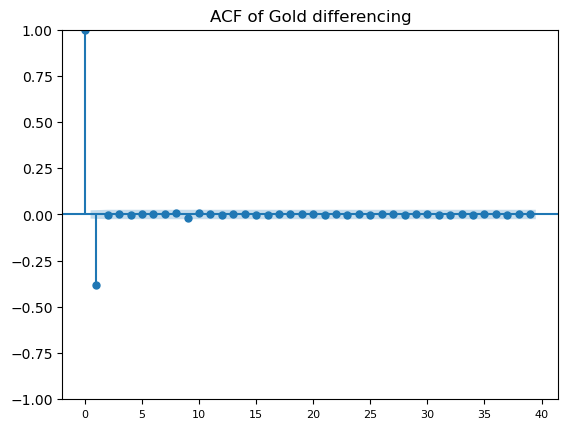

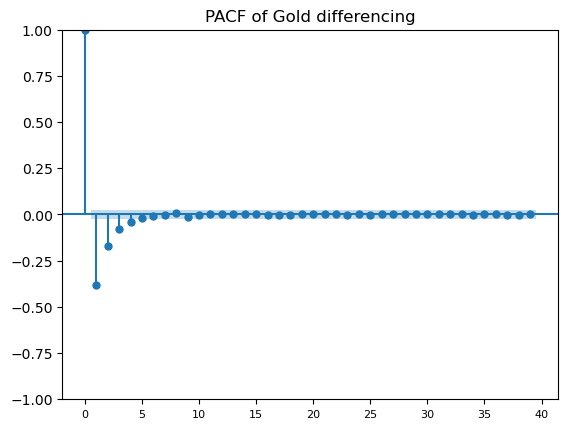

In [33]:
print('Exchange 4')
print(exchange4.describe())
print()
print('Exchange 4 Differencing')
print(exchange4_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange4.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 4')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange4_decomp = seasonal_decompose(exchange4, model = 'additive',  period = 365)
exchange4_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange4_diff.plot(kind='line')
plt.ylabel('Exchange 4 differencing')
plt.title('Exchange 4 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange4_diff_decomp = seasonal_decompose(exchange4_diff, model = 'additive', period = 365)
exchange4_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange4))
print(ADF(exchange4_diff))

#ACF,PACF
plot_acf(exchange4,title = 'ACF of Gold Price')
plot_pacf(exchange4, title = 'PACF of Gold Price')
plot_acf(exchange4_diff, title = 'ACF of Gold differencing')
plot_pacf(exchange4_diff, title = 'PACF of Gold differencing')

Exchange 5
                 y
count  7588.000000
mean      0.009343
std       0.001458
min       0.006254
25%       0.008331
50%       0.009151
75%       0.009995
max       0.013202

Exchange 5 Differencing
count    7.587000e+03
mean     2.263082e-07
std      6.452873e-05
min     -9.660000e-04
25%     -3.000000e-05
50%      0.000000e+00
75%      2.800000e-05
max      1.070000e-03
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

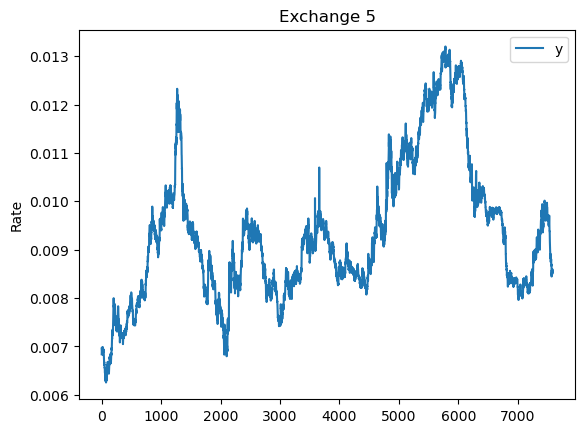

<Figure size 2000x600 with 0 Axes>

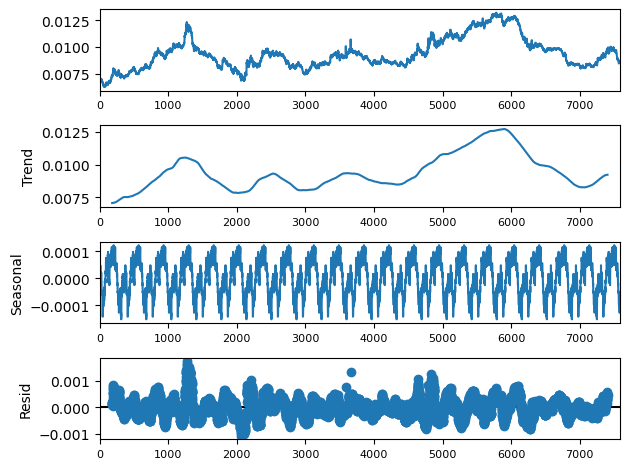

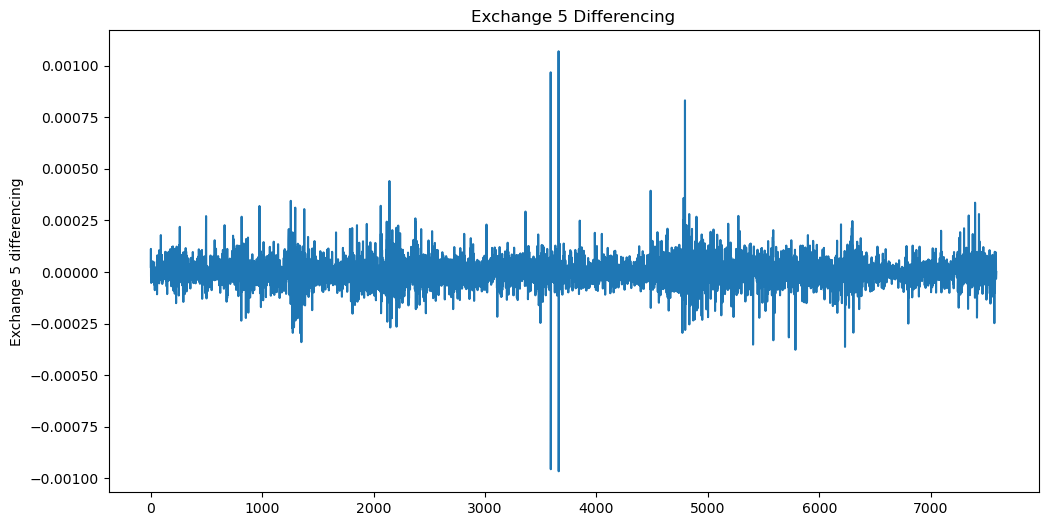

<Figure size 2000x600 with 0 Axes>

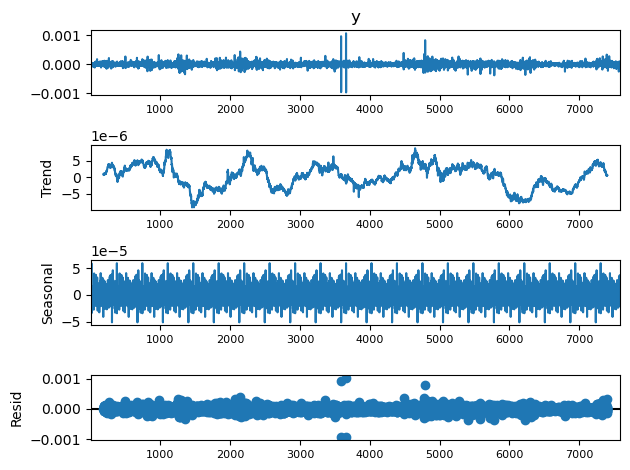

-----ADF-----
ADF Statistic: -2.120121
p-value: 0.2365012782
Lag: 3
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -52.537349
p-value: 0.0000000000
Lag: 2
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


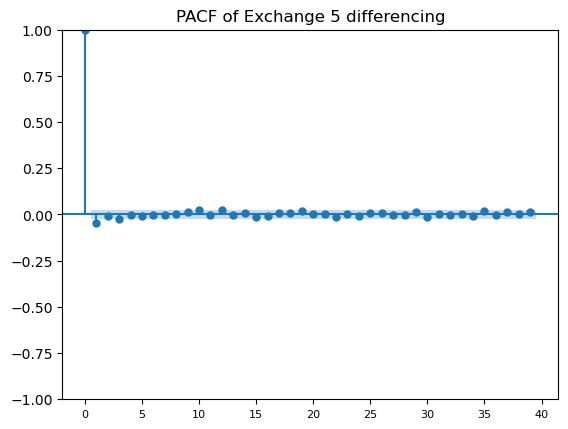

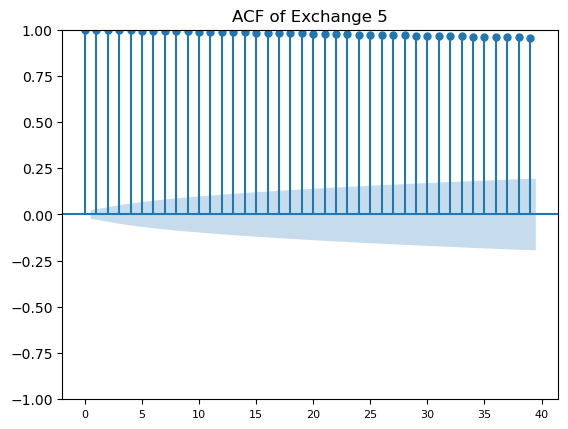

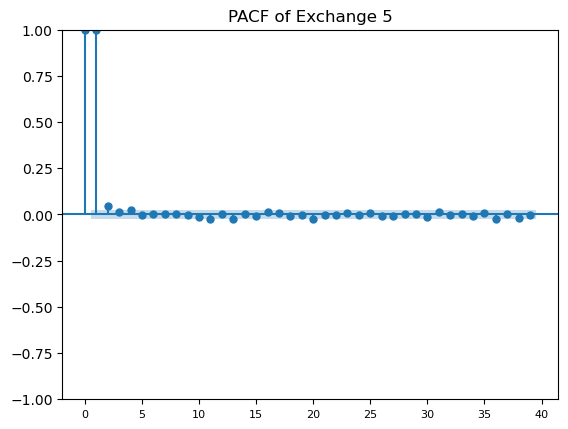

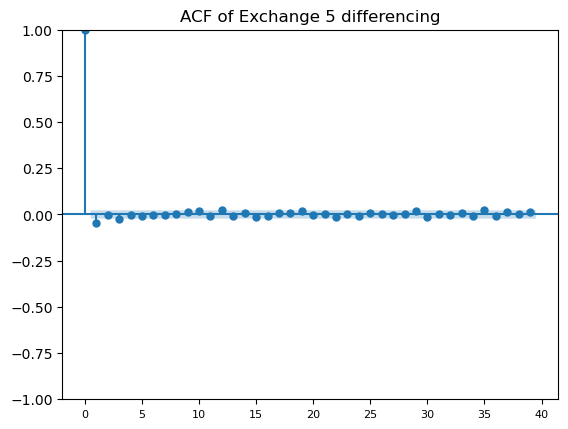

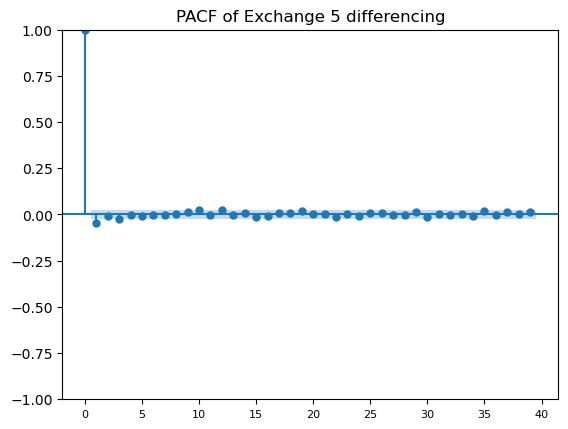

In [34]:
print('Exchange 5')
print(exchange5.describe())
print()
print('Exchange 5 Differencing')
print(exchange5_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange5.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 5')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange5_decomp = seasonal_decompose(exchange5, model = 'additive',  period = 365)
exchange5_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange5_diff.plot(kind='line')
plt.ylabel('Exchange 5 differencing')
plt.title('Exchange 5 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange5_diff_decomp = seasonal_decompose(exchange5_diff, model = 'additive', period = 365)
exchange5_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange5))
print(ADF(exchange5_diff))

#ACF,PACF
plot_acf(exchange5,title = 'ACF of Exchange 5')
plot_pacf(exchange5, title = 'PACF of Exchange 5')
plot_acf(exchange5_diff, title = 'ACF of Exchange 5 differencing')
plot_pacf(exchange5_diff, title = 'PACF of Exchange 5 differencing')

Exchange 6
                 y
count  7588.000000
mean      0.669673
std       0.082836
min       0.523834
25%       0.593287
50%       0.662767
75%       0.731835
max       0.832556

Exchange 6 Differencing
count    7587.000000
mean        0.000022
std         0.002661
min        -0.068040
25%        -0.000923
50%         0.000000
75%         0.000952
max         0.067816
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

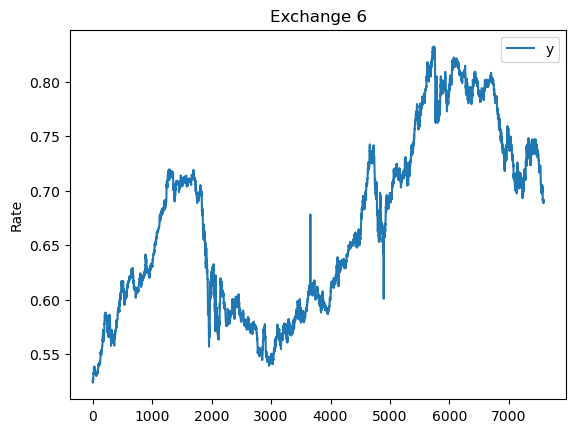

<Figure size 2000x600 with 0 Axes>

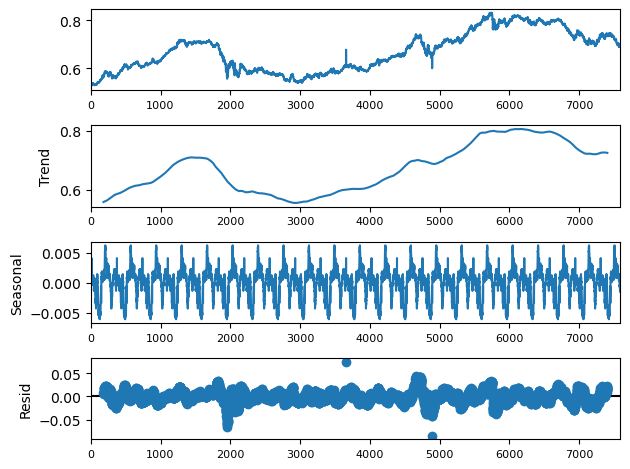

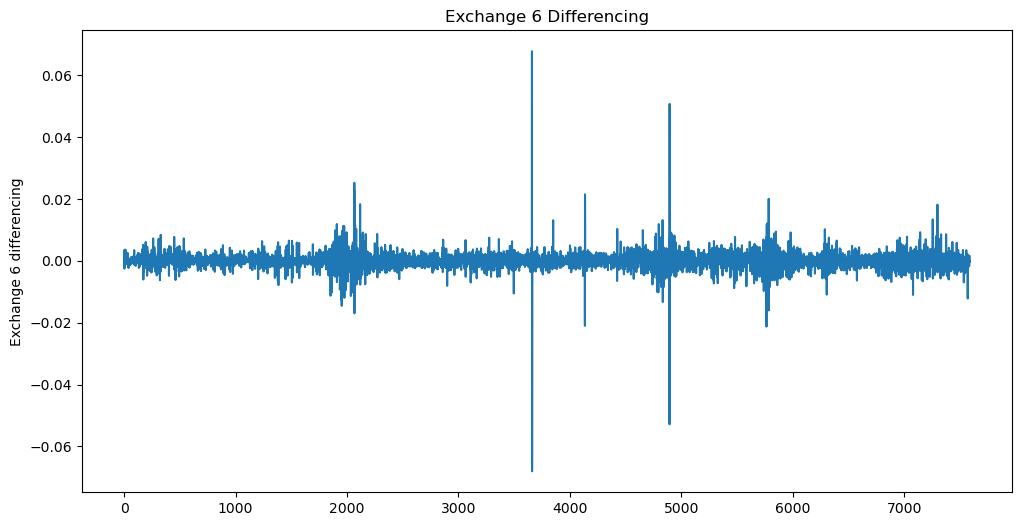

<Figure size 2000x600 with 0 Axes>

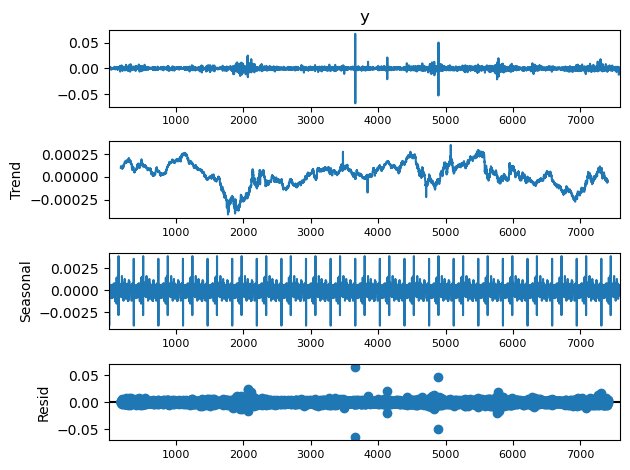

-----ADF-----
ADF Statistic: -1.747735
p-value: 0.4067009721
Lag: 17
observation: 7570
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -20.503845
p-value: 0.0000000000
Lag: 16
observation: 7570
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


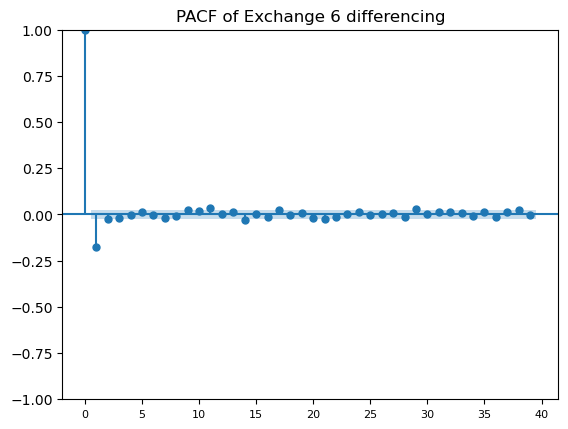

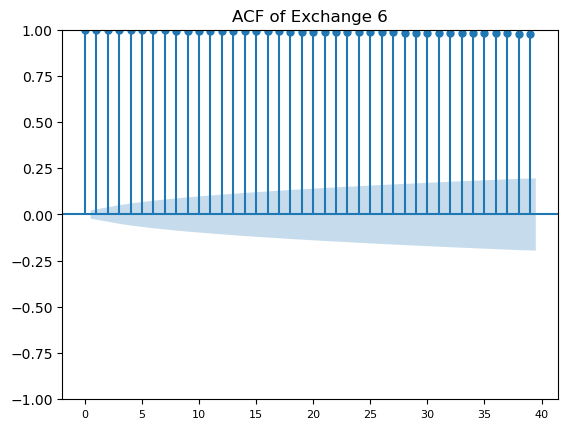

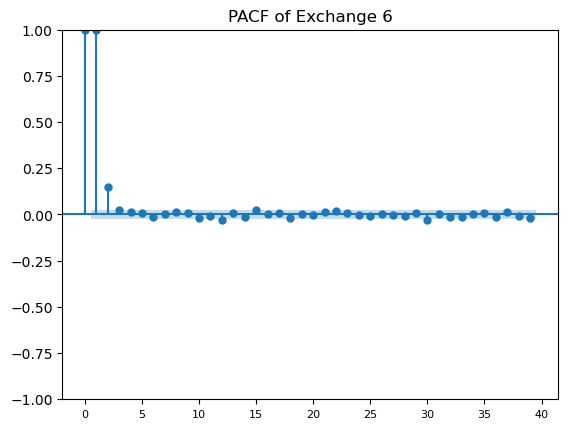

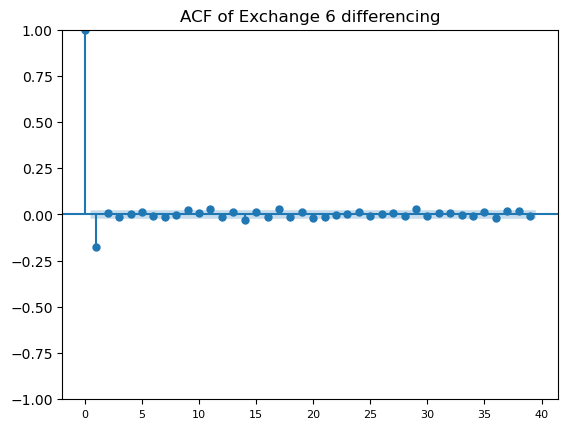

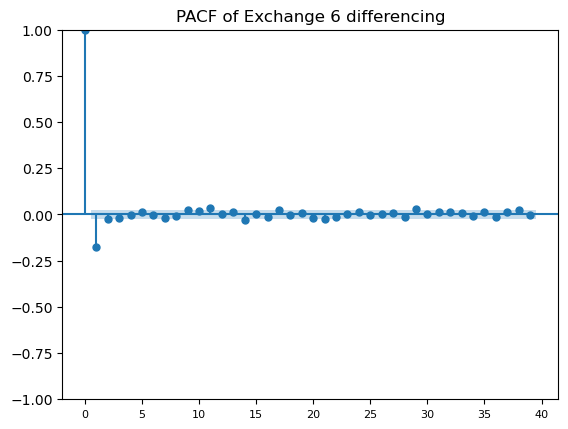

In [35]:
print('Exchange 6')
print(exchange6.describe())
print()
print('Exchange 6 Differencing')
print(exchange6_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange6.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange 6')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange6_decomp = seasonal_decompose(exchange6, model = 'additive',  period = 365)
exchange6_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchange6_diff.plot(kind='line')
plt.ylabel('Exchange 6 differencing')
plt.title('Exchange 6 Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchange6_diff_decomp = seasonal_decompose(exchange6_diff, model = 'additive', period = 365)
exchange6_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchange6))
print(ADF(exchange6_diff))

#ACF,PACF
plot_acf(exchange6,title = 'ACF of Exchange 6')
plot_pacf(exchange6, title = 'PACF of Exchange 6')
plot_acf(exchange6_diff, title = 'ACF of Exchange 6 differencing')
plot_pacf(exchange6_diff, title = 'PACF of Exchange 6 differencing')

Exchange OT
                 y
count  7588.000000
mean      0.654418
std       0.115292
min       0.393153
25%       0.566000
50%       0.669187
75%       0.734901
max       0.882379

Exchange OT Differencing
count    7587.000000
mean        0.000013
std         0.004864
min        -0.069715
25%        -0.002000
50%         0.000000
75%         0.002159
max         0.073715
Name: y, dtype: float64


<Figure size 1200x600 with 0 Axes>

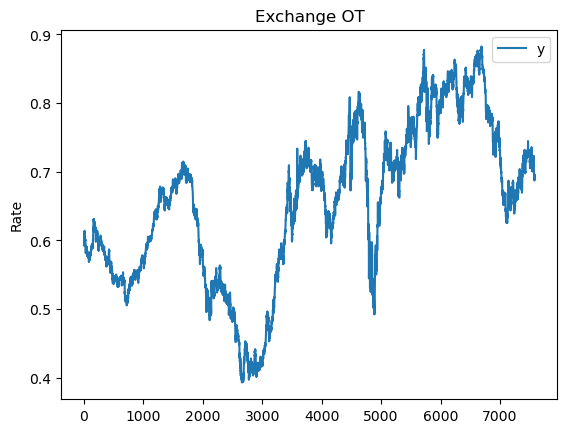

<Figure size 2000x600 with 0 Axes>

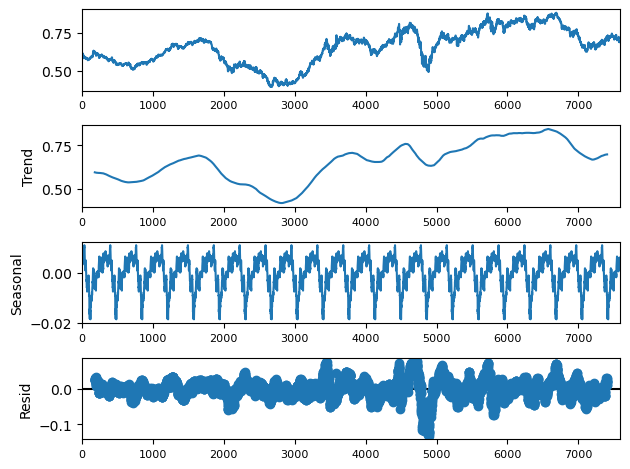

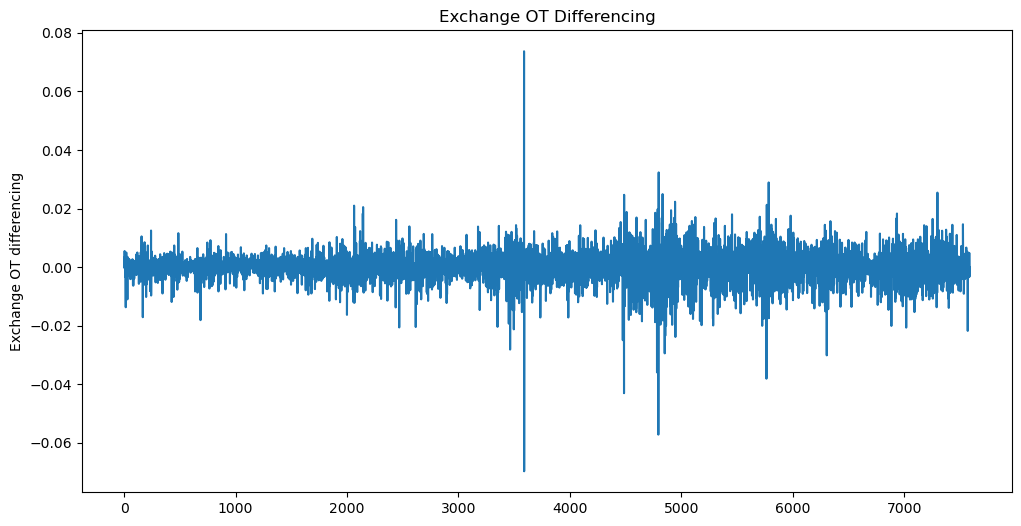

<Figure size 2000x600 with 0 Axes>

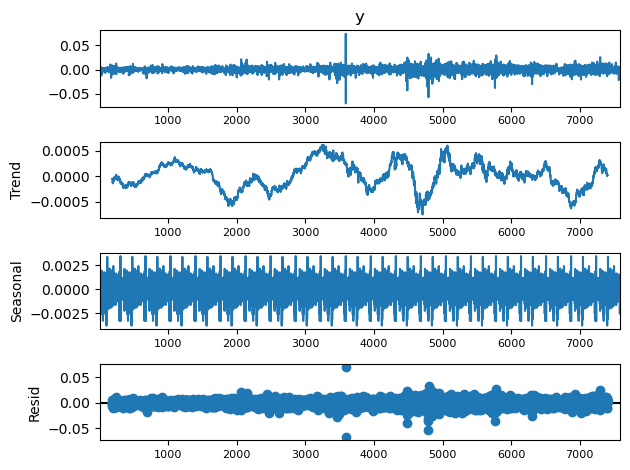

-----ADF-----
ADF Statistic: -1.728197
p-value: 0.4166461724
Lag: 3
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
-----ADF-----
ADF Statistic: -52.335680
p-value: 0.0000000000
Lag: 2
observation: 7584
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None


C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


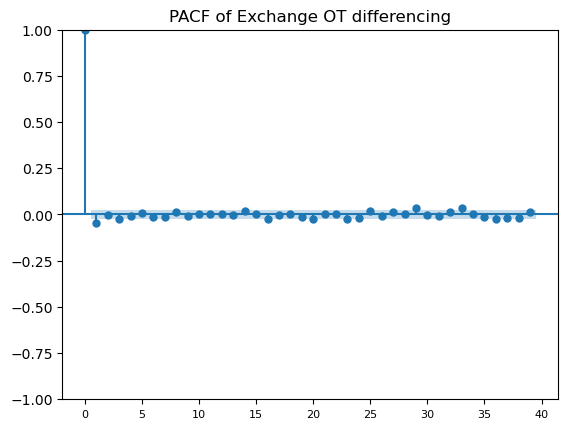

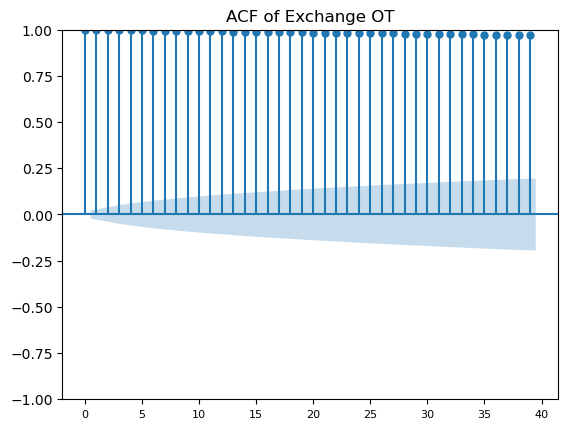

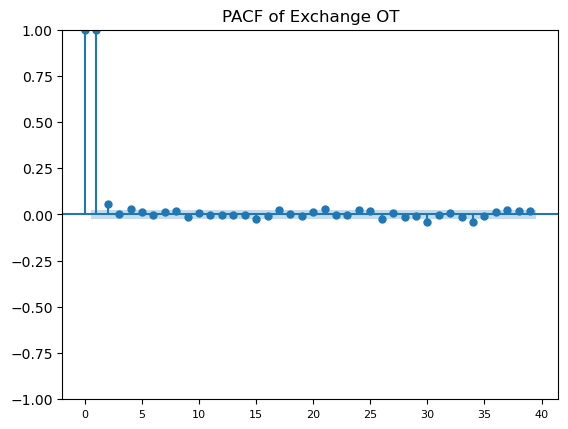

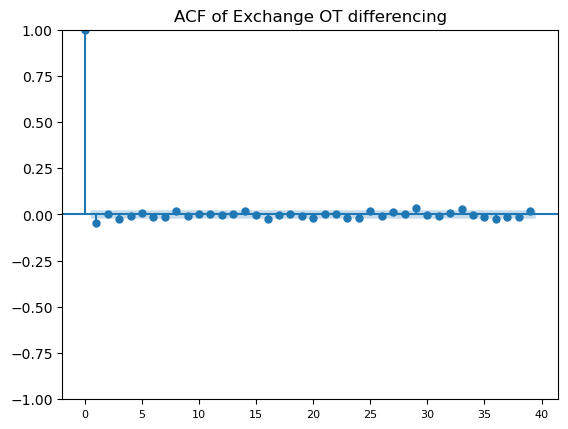

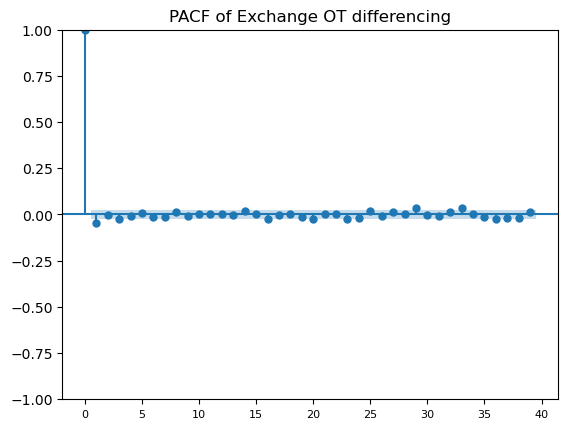

In [36]:
print('Exchange OT')
print(exchangeOT.describe())
print()
print('Exchange OT Differencing')
print(exchangeOT_diff.describe())

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchangeOT.plot(kind='line')
plt.ylabel('Rate')
plt.title('Exchange OT')
plt.show()

#Decompose  ##multiplicative check
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchangeOT_decomp = seasonal_decompose(exchangeOT, model = 'additive',  period = 365)
exchangeOT_decomp.plot()
plt.show()

#Plot
plt.figure(figsize=(12,6))
plt.rc('xtick', labelsize= 10)
exchangeOT_diff.plot(kind='line')
plt.ylabel('Exchange OT differencing')
plt.title('Exchange OT Differencing')
plt.show()

#Decompose
plt.figure(figsize=(20,6))
plt.rc('xtick', labelsize= 8)
exchangeOT_diff_decomp = seasonal_decompose(exchangeOT_diff, model = 'additive', period = 365)
exchangeOT_diff_decomp.plot()
plt.show()

#ADF
print(ADF(exchangeOT))
print(ADF(exchangeOT_diff))

#ACF,PACF
plot_acf(exchangeOT,title = 'ACF of Exchange OT')
plot_pacf(exchangeOT, title = 'PACF of Exchange OT')
plot_acf(exchangeOT_diff, title = 'ACF of Exchange OT differencing')
plot_pacf(exchangeOT_diff, title = 'PACF of Exchange OT differencing')

# Train&Test split

In [10]:
gold_forecasting_horizon = int(gold.shape[0]*0.1) 
gold_train = gold['Price'][:-gold_forecasting_horizon]
gold_test = gold['Price'][-gold_forecasting_horizon:]

silver_forecasting_horizon = int(silver.shape[0]*0.1) 
silver_train = silver['Price'][:-silver_forecasting_horizon]
silver_test = silver['Price'][-silver_forecasting_horizon:]

platinum_forecasting_horizon = int(platinum.shape[0]*0.1) 
platinum_train = platinum['Price'][:-platinum_forecasting_horizon]
platinum_test = platinum['Price'][-platinum_forecasting_horizon:]

In [43]:
forecasting_horizon = int(exchange.shape[0]*0.2)
exchange0_train = exchange0[:-forecasting_horizon]
exchange1_train = exchange1[:-forecasting_horizon]
exchange2_train = exchange2[:-forecasting_horizon]
exchange3_train = exchange3[:-forecasting_horizon]
exchange4_train = exchange4[:-forecasting_horizon]
exchange5_train = exchange5[:-forecasting_horizon]
exchange6_train = exchange6[:-forecasting_horizon]
exchangeOT_train = exchangeOT[:-forecasting_horizon]

# ARIMA fitting

In [38]:
p = range(0,6)
d = range(0,3)
q = range(0,6)

orders = list(itertools.product(p,d,q))

In [124]:
#Gold select order

gold_dict_model = {}

for order in orders:
    gold_model = ARIMA(gold_train, order = order)
    gold_model_fit = gold_model.fit()
    gold_dict_model[order] = [gold_model_fit.llf, gold_model_fit.aic, gold_model_fit.bic]
    
gold_information = pd.DataFrame.from_dict(gold_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(gold_information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                          ARIMA   Log Likelihood               -8044.712
Date:                Tue, 15 Aug 2023   AIC                          16093.425
Time:                        21:37:41   BIC                          16103.539
Sample:                             0   HQIC                         16097.241
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2662     10.156    144.667      0.000    1449.360    1489.172
sigma2      6.115e+04   5094.363     12.004      0.000    5.12e+04    7.11e+04
Ljung-Box (L1) (Q):                1156.78   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -6705.164
Date:                Tue, 15 Aug 2023   AIC                          13418.328
Time:                        21:37:42   BIC                          13438.556
Sample:                             0   HQIC                         13425.960
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2726     10.671    137.688      0.000    1448.358    1490.187
ma.L1          1.6084      0.014    114.536      0.000       1.581       1.636
ma.L2          0.8468      0.014     60.057      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -6638.672
Date:                Tue, 15 Aug 2023   AIC                          13287.344
Time:                        21:37:42   BIC                          13312.629
Sample:                             0   HQIC                         13296.884
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2674     13.059    112.506      0.000    1443.671    1494.863
ma.L1          1.4136      0.022     64.441      0.000       1.371       1.457
ma.L2          1.3519      0.019     72.607      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7100.978
Date:                Tue, 15 Aug 2023   AIC                          14213.956
Time:                        21:37:44   BIC                          14244.298
Sample:                             0   HQIC                         14225.404
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2666     11.513    127.619      0.000    1446.702    1491.831
ma.L1         -0.2329      0.011    -20.398      0.000      -0.255      -0.211
ma.L2          1.6888      0.030     57.028      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -4756.858
Date:                Tue, 15 Aug 2023   AIC                           9521.716
Time:                        21:37:46   BIC                           9541.940
Sample:                             0   HQIC                          9529.347
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0161      0.018     -0.876      0.381      -0.052       0.020
ma.L2          0.0466      0.017      2.791      0.005       0.014       0.079
ma.L3          0.0018      0.021      0.084      0.9

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -4757.045
Date:                Tue, 15 Aug 2023   AIC                           9520.090
Time:                        21:37:47   BIC                           9535.256
Sample:                             0   HQIC                          9525.813
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0161      0.023    -43.919      0.000      -1.061      -0.971
ma.L2          0.0163      0.019      0.865      0.387      -0.021       0.053
sigma2       213.8172      6.280     34.045      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 2, 4)   Log Likelihood               -4756.022
Date:                Tue, 15 Aug 2023   AIC                           9522.044
Time:                        21:37:48   BIC                           9547.320
Sample:                             0   HQIC                          9531.582
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0166      0.161     -6.304      0.000      -1.333      -0.701
ma.L2          0.0629      0.026      2.392      0.017       0.011       0.114
ma.L3         -0.0450      0.028     -1.614      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(0, 2, 5)   Log Likelihood               -4751.661
Date:                Tue, 15 Aug 2023   AIC                           9515.321
Time:                        21:37:49   BIC                           9545.653
Sample:                             0   HQIC                          9526.767
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0249      0.260     -3.938      0.000      -1.535      -0.515
ma.L2          0.0502      0.026      1.931      0.053      -0.001       0.101
ma.L3         -0.0281      0.027     -1.024      0.3

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -4759.341
Date:                Tue, 15 Aug 2023   AIC                           9532.681
Time:                        21:37:50   BIC                           9568.080
Sample:                             0   HQIC                          9546.037
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2663    191.493      7.673      0.000    1093.947    1844.586
ar.L1          0.9987      0.001    718.456      0.000       0.996       1.001
ma.L1         -0.0230      0.019     -1.228      0.2

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -4753.401
Date:                Tue, 15 Aug 2023   AIC                           9516.802
Time:                        21:37:52   BIC                           9542.083
Sample:                             0   HQIC                          9526.341
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7352      0.129      5.710      0.000       0.483       0.988
ma.L1         -0.7641      0.131     -5.844      0.000      -1.020      -0.508
ma.L2          0.0610      0.023      2.670      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -4756.731
Date:                Tue, 15 Aug 2023   AIC                           9521.462
Time:                        21:37:53   BIC                           9541.683
Sample:                             0   HQIC                          9529.092
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9339      0.103     -9.026      0.000      -1.137      -0.731
ma.L1         -0.0556      0.111     -0.500      0.617      -0.273       0.162
ma.L2         -0.9442      0.100     -9.438      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -4754.097
Date:                Tue, 15 Aug 2023   AIC                           9520.194
Time:                        21:37:55   BIC                           9550.526
Sample:                             0   HQIC                          9531.640
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8549      0.101     -8.423      0.000      -1.054      -0.656
ma.L1         -0.1561      0.252     -0.620      0.535      -0.650       0.337
ma.L2         -0.8092      0.208     -3.888      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(1, 2, 5)   Log Likelihood               -4748.920
Date:                Tue, 15 Aug 2023   AIC                           9511.841
Time:                        21:37:56   BIC                           9547.228
Sample:                             0   HQIC                          9525.193
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5510      0.124      4.452      0.000       0.308       0.794
ma.L1         -1.5768      0.125    -12.647      0.000      -1.821      -1.332
ma.L2          0.6228      0.131      4.760      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -4756.779
Date:                Tue, 15 Aug 2023   AIC                           9529.557
Time:                        21:37:58   BIC                           9570.013
Sample:                             0   HQIC                          9544.821
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2663    205.209      7.160      0.000    1067.063    1871.469
ar.L1          1.5415      0.128     12.032      0.000       1.290       1.793
ar.L2         -0.5420      0.128     -4.236      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4744.891
Date:                Tue, 15 Aug 2023   AIC                           9501.783
Time:                        21:37:59   BIC                           9532.120
Sample:                             0   HQIC                          9513.230
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6008      0.038     42.485      0.000       1.527       1.675
ar.L2         -0.8864      0.038    -23.052      0.000      -0.962      -0.811
ma.L1         -1.6332      0.044    -37.152      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -4756.229
Date:                Tue, 15 Aug 2023   AIC                           9522.457
Time:                        21:38:02   BIC                           9547.734
Sample:                             0   HQIC                          9531.995
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9494      0.090    -10.605      0.000      -1.125      -0.774
ar.L2         -0.0299      0.022     -1.380      0.168      -0.072       0.013
ma.L1         -0.0671      0.178     -0.376      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -4751.218
Date:                Tue, 15 Aug 2023   AIC                           9514.436
Time:                        21:38:04   BIC                           9544.768
Sample:                             0   HQIC                          9525.881
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6625      0.008   -197.585      0.000      -1.679      -1.646
ar.L2         -0.9957      0.008   -128.434      0.000      -1.011      -0.980
ma.L1          0.6591      1.040      0.634      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 2, 4)   Log Likelihood               -4753.831
Date:                Tue, 15 Aug 2023   AIC                           9521.661
Time:                        21:38:05   BIC                           9557.048
Sample:                             0   HQIC                          9535.014
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0599      0.309     -3.435      0.001      -1.665      -0.455
ar.L2         -0.2274      0.303     -0.751      0.453      -0.821       0.366
ma.L1          0.0471      0.305      0.155      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(2, 2, 5)   Log Likelihood               -4750.175
Date:                Tue, 15 Aug 2023   AIC                           9516.350
Time:                        21:38:07   BIC                           9556.793
Sample:                             0   HQIC                          9531.611
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6634      0.009   -179.860      0.000      -1.682      -1.645
ar.L2         -0.9917      0.009   -114.553      0.000      -1.009      -0.975
ma.L1          0.6607      1.599      0.413      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -4760.462
Date:                Tue, 15 Aug 2023   AIC                           9534.924
Time:                        21:38:09   BIC                           9570.323
Sample:                             0   HQIC                          9548.280
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2669    184.059      7.983      0.000    1108.519    1830.015
ar.L1         -0.6494      0.019    -33.466      0.000      -0.687      -0.611
ar.L2          0.6659      0.011     62.809      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -4755.112
Date:                Tue, 15 Aug 2023   AIC                           9520.223
Time:                        21:38:13   BIC                           9545.504
Sample:                             0   HQIC                          9529.762
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8937      0.095     -9.364      0.000      -1.081      -0.707
ar.L2          0.0242      0.023      1.031      0.302      -0.022       0.070
ar.L3          0.0611      0.019      3.279      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -4742.629
Date:                Tue, 15 Aug 2023   AIC                           9503.258
Time:                        21:38:16   BIC                           9548.764
Sample:                             0   HQIC                          9520.428
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7823      0.119      6.597      0.000       0.550       1.015
ar.L2          0.4675      0.185      2.522      0.012       0.104       0.831
ar.L3         -0.7485      0.109     -6.874      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -4754.277
Date:                Tue, 15 Aug 2023   AIC                           9520.554
Time:                        21:38:18   BIC                           9550.886
Sample:                             0   HQIC                          9531.999
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8945      0.096     -9.340      0.000      -1.082      -0.707
ar.L2          0.0235      0.024      0.991      0.322      -0.023       0.070
ar.L3          0.0607      0.019      3.222      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -4751.240
Date:                Tue, 15 Aug 2023   AIC                           9516.480
Time:                        21:38:20   BIC                           9551.867
Sample:                             0   HQIC                          9529.833
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6719      0.022    -75.512      0.000      -1.715      -1.629
ar.L2         -1.0087      0.034    -29.873      0.000      -1.075      -0.943
ar.L3         -0.0080      0.020     -0.394      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -4751.143
Date:                Tue, 15 Aug 2023   AIC                           9520.285
Time:                        21:38:23   BIC                           9565.783
Sample:                             0   HQIC                          9537.453
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5060      0.065    -23.241      0.000      -1.633      -1.379
ar.L2         -1.4510      0.057    -25.489      0.000      -1.563      -1.339
ar.L3         -0.8795      0.062    -14.251      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -4761.584
Date:                Tue, 15 Aug 2023   AIC                           9539.168
Time:                        21:38:26   BIC                           9579.624
Sample:                             0   HQIC                          9554.432
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2672    211.004      6.963      0.000    1055.708    1882.827
ar.L1         -0.0660      0.330     -0.200      0.841      -0.713       0.581
ar.L2          0.8788      0.118      7.465      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -4759.323
Date:                Tue, 15 Aug 2023   AIC                           9536.645
Time:                        21:38:27   BIC                           9582.159
Sample:                             0   HQIC                          9553.818
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2664    543.657      2.703      0.007     403.719    2534.814
ar.L1         -0.6479      0.082     -7.875      0.000      -0.809      -0.487
ar.L2          0.0178      0.027      0.664      0.5

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -4748.595
Date:                Tue, 15 Aug 2023   AIC                           9509.191
Time:                        21:38:31   BIC                           9539.528
Sample:                             0   HQIC                          9520.638
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5508      0.097      5.658      0.000       0.360       0.742
ar.L2          0.0511      0.021      2.477      0.013       0.011       0.092
ar.L3         -0.0218      0.024     -0.915      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -4744.761
Date:                Tue, 15 Aug 2023   AIC                           9503.522
Time:                        21:38:32   BIC                           9538.915
Sample:                             0   HQIC                          9516.877
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5229      0.070     21.760      0.000       1.386       1.660
ar.L2         -0.7395      0.061    -12.112      0.000      -0.859      -0.620
ar.L3         -0.0955      0.039     -2.467      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4742.835
Date:                Tue, 15 Aug 2023   AIC                           9503.670
Time:                        21:38:33   BIC                           9549.176
Sample:                             0   HQIC                          9520.840
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3577      0.233      1.536      0.125      -0.099       0.814
ar.L2          0.7556      0.203      3.718      0.000       0.357       1.154
ar.L3         -0.5188      0.183     -2.831      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -4742.707
Date:                Tue, 15 Aug 2023   AIC                           9505.414
Time:                        21:38:34   BIC                           9555.976
Sample:                             0   HQIC                          9524.492
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5937      0.522      1.137      0.256      -0.430       1.617
ar.L2          0.5980      0.355      1.684      0.092      -0.098       1.294
ar.L3         -0.6453      0.340     -1.896      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -4755.229
Date:                Tue, 15 Aug 2023   AIC                           9524.458
Time:                        21:38:37   BIC                           9559.845
Sample:                             0   HQIC                          9537.811
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0140      0.020    -50.727      0.000      -1.053      -0.975
ar.L2          0.0209      0.025      0.843      0.399      -0.028       0.070
ar.L3          0.0385      0.027      1.412      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -4742.897
Date:                Tue, 15 Aug 2023   AIC                           9503.795
Time:                        21:38:40   BIC                           9549.293
Sample:                             0   HQIC                          9520.963
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5019      0.052      9.708      0.000       0.401       0.603
ar.L2          0.7720      0.027     28.246      0.000       0.718       0.826
ar.L3         -0.8068      0.051    -15.793      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -4753.932
Date:                Tue, 15 Aug 2023   AIC                           9527.864
Time:                        21:38:42   BIC                           9578.417
Sample:                             0   HQIC                          9546.939
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8967      0.258     -7.343      0.000      -2.403      -1.390
ar.L2         -2.0184      0.279     -7.238      0.000      -2.565      -1.472
ar.L3         -1.8184      0.286     -6.351      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -4761.889
Date:                Tue, 15 Aug 2023   AIC                           9541.778
Time:                        21:38:45   BIC                           9587.291
Sample:                             0   HQIC                          9558.950
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2677    331.887      4.427      0.000     818.781    2119.754
ar.L1         -0.6351      0.082     -7.779      0.000      -0.795      -0.475
ar.L2          0.7412      0.045     16.322      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -4758.505
Date:                Tue, 15 Aug 2023   AIC                           9537.011
Time:                        21:38:47   BIC                           9587.581
Sample:                             0   HQIC                          9556.091
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2664    412.391      3.563      0.000     660.994    2277.538
ar.L1         -0.4811      0.100     -4.803      0.000      -0.677      -0.285
ar.L2          0.0105      0.057      0.184      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -4749.674
Date:                Tue, 15 Aug 2023   AIC                           9521.348
Time:                        21:38:49   BIC                           9576.975
Sample:                             0   HQIC                          9542.336
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2664    220.506      6.663      0.000    1037.083    1901.449
ar.L1          1.4024      0.236      5.955      0.000       0.941       1.864
ar.L2          0.3108      0.435      0.715      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -4749.466
Date:                Tue, 15 Aug 2023   AIC                           9522.933
Time:                        21:38:51   BIC                           9583.617
Sample:                             0   HQIC                          9545.830
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.2665    263.220      5.582      0.000     953.364    1985.169
ar.L1          1.6892      0.516      3.272      0.001       0.677       2.701
ar.L2         -0.1550      0.871     -0.178      0.8

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -4742.656
Date:                Tue, 15 Aug 2023   AIC                           9503.313
Time:                        21:38:52   BIC                           9548.818
Sample:                             0   HQIC                          9520.483
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6984      0.130      5.391      0.000       0.444       0.952
ar.L2          0.5603      0.176      3.178      0.001       0.215       0.906
ar.L3         -0.7084      0.112     -6.307      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -4742.759
Date:                Tue, 15 Aug 2023   AIC                           9505.518
Time:                        21:38:54   BIC                           9556.080
Sample:                             0   HQIC                          9524.596
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4702      0.776      0.606      0.544      -1.050       1.990
ar.L2          0.7082      0.442      1.601      0.109      -0.159       1.575
ar.L3         -0.6039      0.517     -1.169      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4742.823
Date:                Tue, 15 Aug 2023   AIC                           9507.646
Time:                        21:38:55   BIC                           9563.264
Sample:                             0   HQIC                          9528.632
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5266      0.942     -0.559      0.576      -2.372       1.319
ar.L2          1.0559      0.441      2.395      0.017       0.192       1.920
ar.L3          0.1532      0.689      0.222      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -4750.765
Date:                Tue, 15 Aug 2023   AIC                           9517.530
Time:                        21:38:58   BIC                           9557.973
Sample:                             0   HQIC                          9532.791
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9447      0.144     -6.541      0.000      -1.228      -0.662
ar.L2          0.0252      0.025      1.028      0.304      -0.023       0.073
ar.L3          0.0371      0.026      1.412      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -4750.215
Date:                Tue, 15 Aug 2023   AIC                           9518.430
Time:                        21:39:00   BIC                           9563.928
Sample:                             0   HQIC                          9535.598
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6759      0.022    -76.431      0.000      -1.719      -1.633
ar.L2         -0.9677      0.036    -26.674      0.000      -1.039      -0.897
ar.L3          0.0471      0.039      1.198      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1161
Model:                 ARIMA(5, 2, 4)   Log Likelihood               -4750.179
Date:                Tue, 15 Aug 2023   AIC                           9520.359
Time:                        21:39:01   BIC                           9570.912
Sample:                             0   HQIC                          9539.435
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6844      0.067    -25.027      0.000      -1.816      -1.553
ar.L2         -1.6534      0.061    -27.186      0.000      -1.773      -1.534
ar.L3         -0.8874      0.080    -11.088      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
gold_model_aic = pm.auto_arima(gold_train, information_criteria = 'aic')
gold_model_bic = pm.auto_arima(gold_train, information_criteria = 'bic')

print(gold_model_aic.summary())
print(gold_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4758.056
Date:                Tue, 15 Aug 2023   AIC                           9518.113
Time:                        21:39:06   BIC                           9523.169
Sample:                             0   HQIC                          9520.020
                               - 1161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       213.9357      3.771     56.728      0.000     206.544     221.327
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              4168.74
Prob(Q):                              0.53   Pr

In [126]:
#Silver select order

silver_dict_model = {}

for order in orders:
    silver_model = ARIMA(silver_train, order = order)
    silver_model_fit = silver_model.fit()
    silver_dict_model[order] = [silver_model_fit.llf, silver_model_fit.aic, silver_model_fit.bic]
    
silver_information = pd.DataFrame.from_dict(silver_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(silver_information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                          ARIMA   Log Likelihood               -3247.001
Date:                Tue, 15 Aug 2023   AIC                           6498.002
Time:                        21:39:06   BIC                           6508.101
Sample:                             0   HQIC                          6501.814
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3940      0.228     80.710      0.000      17.947      18.841
sigma2        16.4328      1.250     13.150      0.000      13.984      18.882
Ljung-Box (L1) (Q):                1140.49   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1679.974
Date:                Tue, 15 Aug 2023   AIC                           3369.949
Time:                        21:39:07   BIC                           3395.195
Sample:                             0   HQIC                          3379.478
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4009      0.224     82.262      0.000      17.962      18.839
ma.L1          1.6626      0.014    116.493      0.000       1.635       1.691
ma.L2          1.4903      0.022     68.835      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -536.002
Date:                Tue, 15 Aug 2023   AIC                           1076.003
Time:                        21:39:09   BIC                           1086.100
Sample:                             0   HQIC                          1079.815
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1207      0.013     -9.586      0.000      -0.145      -0.096
sigma2         0.1486      0.002     67.298      0.000       0.144       0.153
Ljung-Box (L1) (Q):                   0.12   Jarque-

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1018.355
Date:                Tue, 15 Aug 2023   AIC                           2038.710
Time:                        21:39:10   BIC                           2043.757
Sample:                             0   HQIC                          2040.615
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3441      0.005     74.853      0.000       0.335       0.353
Ljung-Box (L1) (Q):                 411.67   Jarque-Bera (JB):             14773.26
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -534.105
Date:                Tue, 15 Aug 2023   AIC                           1078.210
Time:                        21:39:12   BIC                           1103.448
Sample:                             0   HQIC                          1087.737
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1337      0.141     -8.069      0.000      -1.409      -0.858
ma.L2          0.2347      0.027      8.562      0.000       0.181       0.288
ma.L3         -0.1414      0.023     -6.190      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(0, 2, 5)   Log Likelihood                -530.064
Date:                Tue, 15 Aug 2023   AIC                           1072.128
Time:                        21:39:13   BIC                           1102.413
Sample:                             0   HQIC                          1083.560
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1299      0.018    -62.946      0.000      -1.165      -1.095
ma.L2          0.2177      0.026      8.404      0.000       0.167       0.268
ma.L3         -0.1170      0.022     -5.377      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -528.957
Date:                Tue, 15 Aug 2023   AIC                           1071.915
Time:                        21:39:16   BIC                           1107.260
Sample:                             0   HQIC                          1085.256
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5364      3.888      5.025      0.000      11.916      27.157
ar.L1          0.9973      0.002    432.745      0.000       0.993       1.002
ma.L1         -0.1287      0.015     -8.316      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -528.603
Date:                Tue, 15 Aug 2023   AIC                           1067.206
Time:                        21:39:17   BIC                           1092.448
Sample:                             0   HQIC                          1076.734
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5492      0.175      3.141      0.002       0.206       0.892
ma.L1         -0.6856      0.173     -3.958      0.000      -1.025      -0.346
ma.L2          0.1757      0.028      6.194      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -526.627
Date:                Tue, 15 Aug 2023   AIC                           1067.254
Time:                        21:39:18   BIC                           1102.593
Sample:                             0   HQIC                          1080.594
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5510      1.269     -0.434      0.664      -3.039       1.937
ma.L1          0.4202      1.269      0.331      0.741      -2.067       2.907
ma.L2          0.0158      0.165      0.095      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -536.225
Date:                Tue, 15 Aug 2023   AIC                           1080.450
Time:                        21:39:20   BIC                           1100.640
Sample:                             0   HQIC                          1088.071
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4034      0.078     -5.140      0.000      -0.557      -0.250
ma.L1         -0.7330      0.084     -8.763      0.000      -0.897      -0.569
ma.L2         -0.2669      0.082     -3.255      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -534.727
Date:                Tue, 15 Aug 2023   AIC                           1079.454
Time:                        21:39:21   BIC                           1104.691
Sample:                             0   HQIC                          1088.980
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1577      0.167     -0.944      0.345      -0.485       0.170
ma.L1         -0.9688      0.168     -5.761      0.000      -1.298      -0.639
ma.L2          0.0504      0.192      0.262      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(1, 2, 5)   Log Likelihood                -533.760
Date:                Tue, 15 Aug 2023   AIC                           1081.520
Time:                        21:39:22   BIC                           1116.853
Sample:                             0   HQIC                          1094.858
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9762      0.031    -31.706      0.000      -1.037      -0.916
ma.L1         -0.1574      0.035     -4.539      0.000      -0.225      -0.089
ma.L2         -0.8724      0.042    -20.661      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -530.899
Date:                Tue, 15 Aug 2023   AIC                           1075.798
Time:                        21:39:25   BIC                           1111.142
Sample:                             0   HQIC                          1089.139
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2951      3.929      4.912      0.000      11.595      26.995
ar.L1          1.4927      0.215      6.932      0.000       1.071       1.915
ar.L2         -0.4941      0.214     -2.304      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -531.979
Date:                Tue, 15 Aug 2023   AIC                           1071.958
Time:                        21:39:28   BIC                           1092.152
Sample:                             0   HQIC                          1079.581
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1071      0.241     -0.445      0.656      -0.579       0.364
ar.L2          0.0700      0.039      1.816      0.069      -0.006       0.146
ma.L1         -0.0217      0.244     -0.089      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -526.496
Date:                Tue, 15 Aug 2023   AIC                           1068.993
Time:                        21:39:30   BIC                           1109.380
Sample:                             0   HQIC                          1084.237
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0624      1.438     -0.043      0.965      -2.880       2.755
ar.L2          0.1658      0.245      0.677      0.498      -0.314       0.646
ma.L1         -0.0680      1.436     -0.047      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -532.484
Date:                Tue, 15 Aug 2023   AIC                           1076.967
Time:                        21:39:32   BIC                           1107.252
Sample:                             0   HQIC                          1088.399
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0825      0.137     -7.902      0.000      -1.351      -0.814
ar.L2         -0.6261      0.086     -7.321      0.000      -0.794      -0.458
ma.L1         -0.0434      0.139     -0.311      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -527.830
Date:                Tue, 15 Aug 2023   AIC                           1069.660
Time:                        21:39:33   BIC                           1104.992
Sample:                             0   HQIC                          1082.997
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8838      0.004   -458.612      0.000      -1.892      -1.876
ar.L2         -0.9969      0.004   -236.088      0.000      -1.005      -0.989
ma.L1          0.7796      1.225      0.637      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -525.774
Date:                Tue, 15 Aug 2023   AIC                           1067.548
Time:                        21:39:35   BIC                           1107.928
Sample:                             0   HQIC                          1082.790
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6397      0.015   -107.689      0.000      -1.669      -1.610
ar.L2         -0.9496      0.014    -68.060      0.000      -0.977      -0.922
ma.L1          0.5400      0.177      3.052      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -531.097
Date:                Tue, 15 Aug 2023   AIC                           1076.193
Time:                        21:39:38   BIC                           1111.538
Sample:                             0   HQIC                          1089.534
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9260      3.544      5.340      0.000      11.980      25.872
ar.L1          0.3077      0.220      1.398      0.162      -0.124       0.739
ar.L2          0.2629      0.139      1.896      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -529.704
Date:                Tue, 15 Aug 2023   AIC                           1075.409
Time:                        21:39:39   BIC                           1115.803
Sample:                             0   HQIC                          1090.655
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5444      3.625      5.392      0.000      12.440      26.648
ar.L1          1.7010      0.167     10.179      0.000       1.373       2.028
ar.L2         -0.9361      0.267     -3.512      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 0, 4)   Log Likelihood                -528.925
Date:                Tue, 15 Aug 2023   AIC                           1075.849
Time:                        21:39:41   BIC                           1121.293
Sample:                             0   HQIC                          1093.002
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2262      5.517      3.666      0.000       9.413      31.039
ar.L1          0.9486      0.247      3.836      0.000       0.464       1.433
ar.L2          0.2335      0.402      0.582      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -523.248
Date:                Tue, 15 Aug 2023   AIC                           1066.496
Time:                        21:39:42   BIC                           1116.989
Sample:                             0   HQIC                          1085.555
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4568     43.545      0.424      0.672     -66.891     103.804
ar.L1         -0.6111      0.016    -37.526      0.000      -0.643      -0.579
ar.L2          0.6752      0.008     79.569      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -526.493
Date:                Tue, 15 Aug 2023   AIC                           1068.985
Time:                        21:39:44   BIC                           1109.372
Sample:                             0   HQIC                          1084.230
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1383      0.245     -0.564      0.573      -0.619       0.343
ar.L2          0.1627      0.216      0.753      0.451      -0.261       0.586
ar.L3          0.0057      0.210      0.027      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -526.493
Date:                Tue, 15 Aug 2023   AIC                           1070.985
Time:                        21:39:45   BIC                           1116.421
Sample:                             0   HQIC                          1088.136
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0909     42.145     -0.002      0.998     -82.695      82.513
ar.L2          0.1748      5.800      0.030      0.976     -11.193      11.542
ar.L3         -0.0134      7.024     -0.002      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -533.988
Date:                Tue, 15 Aug 2023   AIC                           1079.975
Time:                        21:39:47   BIC                           1110.260
Sample:                             0   HQIC                          1091.407
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7875      0.226     -3.484      0.000      -1.231      -0.345
ar.L2         -0.0121      0.034     -0.358      0.721      -0.078       0.054
ar.L3          0.0804      0.017      4.685      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 2, 4)   Log Likelihood                -532.120
Date:                Tue, 15 Aug 2023   AIC                           1080.241
Time:                        21:39:50   BIC                           1120.621
Sample:                             0   HQIC                          1095.484
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5108      1.154     -1.309      0.191      -3.774       0.752
ar.L2         -0.9811      0.668     -1.469      0.142      -2.290       0.328
ar.L3         -0.4261      0.477     -0.893      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(3, 2, 5)   Log Likelihood                -532.106
Date:                Tue, 15 Aug 2023   AIC                           1082.212
Time:                        21:39:51   BIC                           1127.640
Sample:                             0   HQIC                          1099.360
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8283      0.340     -5.381      0.000      -2.494      -1.162
ar.L2         -1.3138      0.384     -3.421      0.001      -2.067      -0.561
ar.L3         -0.4396      0.205     -2.148      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -532.670
Date:                Tue, 15 Aug 2023   AIC                           1079.340
Time:                        21:39:53   BIC                           1114.684
Sample:                             0   HQIC                          1092.681
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3331      3.555      5.438      0.000      12.365      26.302
ar.L1          0.2122      0.223      0.949      0.342      -0.226       0.650
ar.L2          0.7723      0.194      3.974      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -530.668
Date:                Tue, 15 Aug 2023   AIC                           1077.336
Time:                        21:39:54   BIC                           1117.731
Sample:                             0   HQIC                          1092.583
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4849     18.130      1.020      0.308     -17.048      54.018
ar.L1         -0.3089      0.047     -6.515      0.000      -0.402      -0.216
ar.L2          0.3181      0.040      7.974      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -530.793
Date:                Tue, 15 Aug 2023   AIC                           1079.586
Time:                        21:39:56   BIC                           1125.029
Sample:                             0   HQIC                          1096.738
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4632      4.375      4.220      0.000       9.888      27.039
ar.L1         -0.1520      0.955     -0.159      0.873      -2.023       1.719
ar.L2          0.4483      0.333      1.346      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -528.970
Date:                Tue, 15 Aug 2023   AIC                           1077.940
Time:                        21:39:57   BIC                           1128.433
Sample:                             0   HQIC                          1096.998
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5332      5.854      3.337      0.001       8.060      31.007
ar.L1          1.0221      0.332      3.082      0.002       0.372       1.672
ar.L2          0.0875      0.534      0.164      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 0, 5)   Log Likelihood                -528.772
Date:                Tue, 15 Aug 2023   AIC                           1079.544
Time:                        21:39:59   BIC                           1135.086
Sample:                             0   HQIC                          1100.509
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6248      4.774      3.901      0.000       9.267      27.982
ar.L1          0.2331      3.955      0.059      0.953      -7.518       7.984
ar.L2          0.8189      3.326      0.246      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -518.239
Date:                Tue, 15 Aug 2023   AIC                           1052.478
Time:                        21:40:02   BIC                           1092.865
Sample:                             0   HQIC                          1067.723
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3556      0.274      1.296      0.195      -0.182       0.893
ar.L2          0.6619      0.375      1.767      0.077      -0.072       1.396
ar.L3         -0.8812      0.195     -4.524      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -516.002
Date:                Tue, 15 Aug 2023   AIC                           1050.004
Time:                        21:40:03   BIC                           1095.440
Sample:                             0   HQIC                          1067.155
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2523      0.147      1.714      0.087      -0.036       0.541
ar.L2          0.5599      0.195      2.866      0.004       0.177       0.943
ar.L3         -0.5684      0.128     -4.426      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -510.145
Date:                Tue, 15 Aug 2023   AIC                           1040.290
Time:                        21:40:05   BIC                           1090.774
Sample:                             0   HQIC                          1059.346
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2560      0.009     27.600      0.000       0.238       0.274
ar.L2          0.0408      0.011      3.624      0.000       0.019       0.063
ar.L3          0.2396      0.011     20.962      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -531.769
Date:                Tue, 15 Aug 2023   AIC                           1077.537
Time:                        21:40:07   BIC                           1112.870
Sample:                             0   HQIC                          1090.875
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3133      0.183     -1.716      0.086      -0.671       0.045
ar.L2          0.0373      0.027      1.392      0.164      -0.015       0.090
ar.L3          0.0262      0.020      1.313      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -527.079
Date:                Tue, 15 Aug 2023   AIC                           1070.158
Time:                        21:40:09   BIC                           1110.538
Sample:                             0   HQIC                          1085.401
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4088      0.025    -56.933      0.000      -1.457      -1.360
ar.L2         -1.0505      0.031    -34.328      0.000      -1.110      -0.991
ar.L3         -0.0151      0.024     -0.644      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 2, 4)   Log Likelihood                -531.727
Date:                Tue, 15 Aug 2023   AIC                           1081.454
Time:                        21:40:10   BIC                           1126.882
Sample:                             0   HQIC                          1098.602
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3178      0.060    -21.908      0.000      -1.436      -1.200
ar.L2         -1.2120      0.068    -17.847      0.000      -1.345      -1.079
ar.L3         -1.0043      0.057    -17.746      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(4, 2, 5)   Log Likelihood                -529.704
Date:                Tue, 15 Aug 2023   AIC                           1079.408
Time:                        21:40:12   BIC                           1129.883
Sample:                             0   HQIC                          1098.461
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5451      0.095    -16.327      0.000      -1.731      -1.360
ar.L2         -2.1109      0.131    -16.120      0.000      -2.368      -1.854
ar.L3         -1.3183      0.115    -11.506      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -528.311
Date:                Tue, 15 Aug 2023   AIC                           1072.622
Time:                        21:40:14   BIC                           1113.016
Sample:                             0   HQIC                          1087.868
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5639      3.931      4.977      0.000      11.859      27.269
ar.L1          1.1458      0.181      6.314      0.000       0.790       1.502
ar.L2         -0.0369      0.163     -0.226      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 0, 2)   Log Likelihood                -528.579
Date:                Tue, 15 Aug 2023   AIC                           1075.158
Time:                        21:40:16   BIC                           1120.602
Sample:                             0   HQIC                          1092.311
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7471    180.447      0.104      0.917    -334.922     372.416
ar.L1         -0.4000      0.029    -13.600      0.000      -0.458      -0.342
ar.L2          0.3551      0.022     15.973      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -522.788
Date:                Tue, 15 Aug 2023   AIC                           1065.576
Time:                        21:40:18   BIC                           1116.068
Sample:                             0   HQIC                          1084.634
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7292   4.15e-07   4.51e+07      0.000      18.729      18.729
ar.L1          1.3805      0.032     42.957      0.000       1.318       1.444
ar.L2          0.2721      0.071      3.812      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -529.658
Date:                Tue, 15 Aug 2023   AIC                           1081.315
Time:                        21:40:20   BIC                           1136.857
Sample:                             0   HQIC                          1102.280
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6394      5.079      3.670      0.000       8.686      28.593
ar.L1         -0.3419      0.234     -1.459      0.144      -0.801       0.117
ar.L2         -0.0655      0.198     -0.331      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -522.029
Date:                Tue, 15 Aug 2023   AIC                           1068.059
Time:                        21:40:23   BIC                           1128.650
Sample:                             0   HQIC                          1090.929
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7778     40.984      0.458      0.647     -61.548      99.104
ar.L1          1.0035      0.124      8.108      0.000       0.761       1.246
ar.L2          0.0455      0.092      0.495      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -521.779
Date:                Tue, 15 Aug 2023   AIC                           1061.558
Time:                        21:40:25   BIC                           1106.993
Sample:                             0   HQIC                          1078.708
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0763      0.210      5.115      0.000       0.664       1.489
ar.L2          0.1256      0.322      0.390      0.696      -0.505       0.757
ar.L3         -0.4638      0.149     -3.122      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -512.753
Date:                Tue, 15 Aug 2023   AIC                           1045.507
Time:                        21:40:27   BIC                           1095.991
Sample:                             0   HQIC                          1064.563
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0950      0.020     -4.696      0.000      -0.135      -0.055
ar.L2          0.3176      0.007     44.937      0.000       0.304       0.331
ar.L3          0.1155      0.011     10.704      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -514.077
Date:                Tue, 15 Aug 2023   AIC                           1050.154
Time:                        21:40:28   BIC                           1105.687
Sample:                             0   HQIC                          1071.116
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5927      0.075     -7.862      0.000      -0.741      -0.445
ar.L2          0.4872      0.028     17.380      0.000       0.432       0.542
ar.L3          0.2064      0.044      4.645      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 2, 3)   Log Likelihood                -531.306
Date:                Tue, 15 Aug 2023   AIC                           1080.612
Time:                        21:40:32   BIC                           1126.040
Sample:                             0   HQIC                          1097.761
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8793      0.021    -42.795      0.000      -0.920      -0.839
ar.L2         -0.9842      0.023    -42.069      0.000      -1.030      -0.938
ar.L3         -0.0648      0.027     -2.406      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1152
Model:                 ARIMA(5, 2, 4)   Log Likelihood                -531.124
Date:                Tue, 15 Aug 2023   AIC                           1082.249
Time:                        21:40:34   BIC                           1132.724
Sample:                             0   HQIC                          1101.302
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3216      0.049    -26.982      0.000      -1.418      -1.226
ar.L2         -1.2174      0.059    -20.672      0.000      -1.333      -1.102
ar.L3         -0.9981      0.048    -20.930      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [127]:
silver_model_aic = pm.auto_arima(silver_train, information_criteria = 'aic')
silver_model_bic = pm.auto_arima(silver_train, information_criteria = 'bic')

print(silver_model_aic.summary())
print(silver_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -526.721
Date:                Tue, 15 Aug 2023   AIC                           1063.442
Time:                        21:40:59   BIC                           1088.684
Sample:                             0   HQIC                          1072.970
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1302      0.014     -9.215      0.000      -0.158      -0.103
ma.L2          0.0875      0.016      5.436      0.000       0.056       0.119
ma.L3         -0.0293      0.016     -1.876      0.0

In [128]:
#Platinum select order

platinum_dict_model = {}

for order in orders:
    platinum_model = ARIMA(platinum_train, order = order)
    platinum_model_fit = platinum_model.fit()
    platinum_dict_model[order] = [platinum_model_fit.llf, platinum_model_fit.aic, platinum_model_fit.bic]
    
platinum_information = pd.DataFrame.from_dict(platinum_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(platinum_information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                          ARIMA   Log Likelihood               -8609.289
Date:                Tue, 15 Aug 2023   AIC                          17222.578
Time:                        21:41:00   BIC                          17233.069
Sample:                             0   HQIC                         17226.500
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8843      3.566    260.739      0.000     922.894     936.874
sigma2      1.263e+04    449.602     28.098      0.000    1.18e+04    1.35e+04
Ljung-Box (L1) (Q):                1381.59   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7757.147
Date:                Tue, 15 Aug 2023   AIC                          15520.295
Time:                        21:41:00   BIC                          15536.032
Sample:                             0   HQIC                         15526.177
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8965      3.668    253.506      0.000     922.707     937.086
ma.L1          0.9205      0.008    112.774      0.000       0.904       0.936
sigma2      3739.4857    125.105     29.891      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7153.006
Date:                Tue, 15 Aug 2023   AIC                          14314.011
Time:                        21:41:01   BIC                          14334.994
Sample:                             0   HQIC                         14321.854
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8884      3.778    246.106      0.000     922.483     937.294
ma.L1          1.4601      0.013    110.412      0.000       1.434       1.486
ma.L2          0.7783      0.014     57.059      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -6781.707
Date:                Tue, 15 Aug 2023   AIC                          13573.414
Time:                        21:41:02   BIC                          13599.642
Sample:                             0   HQIC                         13583.218
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9339      4.046    229.830      0.000     922.004     937.864
ma.L1          1.5777      0.017     91.783      0.000       1.544       1.611
ma.L2          1.3985      0.026     53.114      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -6516.938
Date:                Tue, 15 Aug 2023   AIC                          13045.877
Time:                        21:41:03   BIC                          13077.351
Sample:                             0   HQIC                         13057.641
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9629      4.329    214.836      0.000     921.479     938.447
ma.L1          1.5899      0.017     94.046      0.000       1.557       1.623
ma.L2          1.6814      0.027     61.542      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -6792.811
Date:                Tue, 15 Aug 2023   AIC                          13599.621
Time:                        21:41:04   BIC                          13636.341
Sample:                             0   HQIC                         13613.347
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8877      5.364    173.356      0.000     919.374     940.401
ma.L1          1.0339      0.019     54.612      0.000       0.997       1.071
ma.L2          1.3924      0.021     65.293      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 1, 5)   Log Likelihood               -5677.206
Date:                Tue, 15 Aug 2023   AIC                          11366.412
Time:                        21:41:05   BIC                          11397.881
Sample:                             0   HQIC                         11378.175
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0316      0.021      1.505      0.132      -0.010       0.073
ma.L2          0.0201      0.023      0.868      0.385      -0.025       0.066
ma.L3          0.0107      0.015      0.702      0.4

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 2, 4)   Log Likelihood               -5679.552
Date:                Tue, 15 Aug 2023   AIC                          11369.105
Time:                        21:41:07   BIC                          11395.326
Sample:                             0   HQIC                         11378.907
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9653      0.122     -7.922      0.000      -1.204      -0.727
ma.L2         -0.0087      0.033     -0.265      0.791      -0.073       0.056
ma.L3         -0.0120      0.027     -0.451      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(0, 2, 5)   Log Likelihood               -5679.382
Date:                Tue, 15 Aug 2023   AIC                          11370.764
Time:                        21:41:08   BIC                          11402.229
Sample:                             0   HQIC                         11382.526
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9672      0.304     -3.177      0.001      -1.564      -0.370
ma.L2         -0.0076      0.034     -0.223      0.824      -0.075       0.059
ma.L3         -0.0130      0.028     -0.468      0.6

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -5682.465
Date:                Tue, 15 Aug 2023   AIC                          11378.930
Time:                        21:41:10   BIC                          11415.649
Sample:                             0   HQIC                         11392.655
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8978     47.894     19.416      0.000     836.027    1023.769
ar.L1          0.9911      0.003    341.656      0.000       0.985       0.997
ma.L1          0.0371      0.022      1.698      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -5678.242
Date:                Tue, 15 Aug 2023   AIC                          11366.483
Time:                        21:41:12   BIC                          11392.708
Sample:                             0   HQIC                         11376.286
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8735      0.109      8.038      0.000       0.660       1.086
ma.L1         -0.8440      0.113     -7.491      0.000      -1.065      -0.623
ma.L2         -0.0069      0.031     -0.223      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5679.360
Date:                Tue, 15 Aug 2023   AIC                          11366.721
Time:                        21:41:14   BIC                          11387.698
Sample:                             0   HQIC                         11374.562
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9935      0.005   -201.371      0.000      -1.003      -0.984
ma.L1         -0.0005     18.094  -2.86e-05      1.000     -35.464      35.463
ma.L2         -0.9995     18.084     -0.055      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -5679.634
Date:                Tue, 15 Aug 2023   AIC                          11369.267
Time:                        21:41:15   BIC                          11395.488
Sample:                             0   HQIC                         11379.069
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8289      0.284     -2.917      0.004      -1.386      -0.272
ma.L1         -0.1367      0.318     -0.430      0.667      -0.759       0.486
ma.L2         -0.8211      0.298     -2.758      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -5678.153
Date:                Tue, 15 Aug 2023   AIC                          11368.306
Time:                        21:41:16   BIC                          11399.771
Sample:                             0   HQIC                         11380.069
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9937      0.005   -201.070      0.000      -1.003      -0.984
ma.L1          0.0309    107.433      0.000      1.000    -210.533     210.595
ma.L2         -0.9728    110.743     -0.009      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(1, 2, 5)   Log Likelihood               -5678.110
Date:                Tue, 15 Aug 2023   AIC                          11370.219
Time:                        21:41:18   BIC                          11406.929
Sample:                             0   HQIC                         11383.942
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9937      0.005   -193.069      0.000      -1.004      -0.984
ma.L1          0.0318     28.040      0.001      0.999     -54.926      54.989
ma.L2         -0.9700     28.927     -0.034      0.9

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -5680.905
Date:                Tue, 15 Aug 2023   AIC                          11377.809
Time:                        21:41:21   BIC                          11419.774
Sample:                             0   HQIC                         11393.495
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        930.3064     54.563     17.050      0.000     823.366    1037.247
ar.L1          1.7454      0.201      8.668      0.000       1.351       2.140
ar.L2         -0.7471      0.200     -3.741      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5677.911
Date:                Tue, 15 Aug 2023   AIC                          11367.821
Time:                        21:41:24   BIC                          11399.291
Sample:                             0   HQIC                         11379.585
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1812      0.515      2.292      0.022       0.171       2.191
ar.L2         -0.1915      0.512     -0.374      0.708      -1.195       0.812
ma.L1         -1.1531      0.518     -2.227      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -5666.173
Date:                Tue, 15 Aug 2023   AIC                          11346.346
Time:                        21:41:25   BIC                          11383.061
Sample:                             0   HQIC                         11360.070
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8092      0.004    501.679      0.000       1.802       1.816
ar.L2         -0.9946      0.004   -274.604      0.000      -1.002      -0.988
ma.L1         -1.7940      0.021    -84.033      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -5678.629
Date:                Tue, 15 Aug 2023   AIC                          11367.259
Time:                        21:41:27   BIC                          11393.480
Sample:                             0   HQIC                         11377.061
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9615      0.021    -45.462      0.000      -1.003      -0.920
ar.L2          0.0323      0.021      1.553      0.120      -0.008       0.073
ma.L1         -0.0005     15.843  -2.85e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -5676.574
Date:                Tue, 15 Aug 2023   AIC                          11365.148
Time:                        21:41:28   BIC                          11396.613
Sample:                             0   HQIC                         11376.910
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6562      0.006   -265.135      0.000      -1.668      -1.644
ar.L2         -0.9838      0.007   -144.077      0.000      -0.997      -0.970
ma.L1          0.6724      9.282      0.072      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(2, 2, 5)   Log Likelihood               -5675.693
Date:                Tue, 15 Aug 2023   AIC                          11367.386
Time:                        21:41:32   BIC                          11409.340
Sample:                             0   HQIC                         11383.069
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6545      0.009   -188.409      0.000      -1.672      -1.637
ar.L2         -0.9818      0.009   -108.795      0.000      -0.999      -0.964
ma.L1          0.6940      2.848      0.244      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -5682.680
Date:                Tue, 15 Aug 2023   AIC                          11379.361
Time:                        21:41:34   BIC                          11416.081
Sample:                             0   HQIC                         11393.087
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9103     48.815     19.050      0.000     834.234    1025.586
ar.L1         -0.5849      0.287     -2.038      0.042      -1.148      -0.022
ar.L2          0.8976      0.061     14.661      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -5679.802
Date:                Tue, 15 Aug 2023   AIC                          11379.604
Time:                        21:41:38   BIC                          11432.061
Sample:                             0   HQIC                         11399.212
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        930.6620     51.438     18.093      0.000     829.845    1031.479
ar.L1          1.0472      0.288      3.642      0.000       0.484       1.611
ar.L2          0.4687      0.456      1.028      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5666.155
Date:                Tue, 15 Aug 2023   AIC                          11344.309
Time:                        21:41:39   BIC                          11375.779
Sample:                             0   HQIC                         11356.073
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8139      0.022     82.417      0.000       1.771       1.857
ar.L2         -1.0049      0.040    -25.236      0.000      -1.083      -0.927
ar.L3          0.0062      0.022      0.287      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5665.004
Date:                Tue, 15 Aug 2023   AIC                          11344.008
Time:                        21:41:41   BIC                          11380.723
Sample:                             0   HQIC                         11357.732
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8159      0.007    121.246      0.000       0.803       0.829
ar.L2          0.8053      0.010     79.738      0.000       0.786       0.825
ar.L3         -0.9900      0.006   -163.055      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -5670.396
Date:                Tue, 15 Aug 2023   AIC                          11356.792
Time:                        21:41:42   BIC                          11398.751
Sample:                             0   HQIC                         11372.477
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8262      1.386      0.596      0.551      -1.891       3.544
ar.L2         -1.0813      0.675     -1.603      0.109      -2.404       0.241
ar.L3          0.3138      1.278      0.246      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -5675.631
Date:                Tue, 15 Aug 2023   AIC                          11369.262
Time:                        21:41:43   BIC                          11416.467
Sample:                             0   HQIC                         11386.908
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1480      0.329     -0.450      0.653      -0.793       0.497
ar.L2          0.5357      0.200      2.685      0.007       0.145       0.927
ar.L3          0.1154      0.286      0.404      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -5679.594
Date:                Tue, 15 Aug 2023   AIC                          11371.188
Time:                        21:41:45   BIC                          11402.653
Sample:                             0   HQIC                         11382.950
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9655      0.038    -25.671      0.000      -1.039      -0.892
ar.L2          0.0571      0.030      1.882      0.060      -0.002       0.117
ar.L3          0.0230      0.024      0.946      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -5676.147
Date:                Tue, 15 Aug 2023   AIC                          11366.293
Time:                        21:41:47   BIC                          11403.003
Sample:                             0   HQIC                         11380.016
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6309      0.021    -78.376      0.000      -1.672      -1.590
ar.L2         -0.9419      0.034    -27.321      0.000      -1.010      -0.874
ar.L3          0.0253      0.021      1.224      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 2, 4)   Log Likelihood               -5678.389
Date:                Tue, 15 Aug 2023   AIC                          11372.779
Time:                        21:41:49   BIC                          11414.733
Sample:                             0   HQIC                         11388.462
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9029      0.030    -63.289      0.000      -1.962      -1.844
ar.L2         -1.8647      0.048    -39.101      0.000      -1.958      -1.771
ar.L3         -0.9580      0.028    -33.971      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -5677.170
Date:                Tue, 15 Aug 2023   AIC                          11372.340
Time:                        21:41:51   BIC                          11419.538
Sample:                             0   HQIC                         11389.984
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4513      0.442     -3.284      0.001      -2.317      -0.585
ar.L2         -0.6876      0.727     -0.946      0.344      -2.112       0.737
ar.L3          0.1357      0.429      0.316      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -5682.457
Date:                Tue, 15 Aug 2023   AIC                          11380.913
Time:                        21:41:54   BIC                          11422.879
Sample:                             0   HQIC                         11396.600
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9522     48.912     19.013      0.000     834.086    1025.818
ar.L1         -0.2341      0.137     -1.714      0.087      -0.502       0.034
ar.L2          0.3810      0.103      3.694      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -5679.013
Date:                Tue, 15 Aug 2023   AIC                          11376.026
Time:                        21:41:56   BIC                          11423.237
Sample:                             0   HQIC                         11393.673
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9808     34.484     26.969      0.000     862.394     997.568
ar.L1          2.0925      0.751      2.787      0.005       0.621       3.564
ar.L2         -2.2601      1.111     -2.034      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -5682.278
Date:                Tue, 15 Aug 2023   AIC                          11384.555
Time:                        21:41:58   BIC                          11437.012
Sample:                             0   HQIC                         11404.163
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9421     68.096     13.656      0.000     796.476    1063.409
ar.L1          1.4336      1.269      1.130      0.259      -1.054       3.921
ar.L2          0.3190      2.123      0.150      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -5675.667
Date:                Tue, 15 Aug 2023   AIC                          11373.333
Time:                        21:42:00   BIC                          11431.035
Sample:                             0   HQIC                         11394.902
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9273   1633.800      0.569      0.569   -2272.261    4132.116
ar.L1          1.8025      0.013    138.784      0.000       1.777       1.828
ar.L2          0.0122      0.025      0.492      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -5666.420
Date:                Tue, 15 Aug 2023   AIC                          11346.841
Time:                        21:42:02   BIC                          11383.555
Sample:                             0   HQIC                         11360.565
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8132      0.022     84.027      0.000       1.771       1.856
ar.L2         -1.0144      0.046    -21.875      0.000      -1.105      -0.924
ar.L3          0.0259      0.048      0.539      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -5666.212
Date:                Tue, 15 Aug 2023   AIC                          11348.425
Time:                        21:42:03   BIC                          11390.384
Sample:                             0   HQIC                         11364.110
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8549      2.190      0.390      0.696      -3.437       5.147
ar.L2          0.7328      3.974      0.184      0.854      -7.056       8.522
ar.L3         -0.9519      2.201     -0.432      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -5665.570
Date:                Tue, 15 Aug 2023   AIC                          11349.140
Time:                        21:42:05   BIC                          11396.345
Sample:                             0   HQIC                         11366.786
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2512      0.069     32.496      0.000       2.115       2.387
ar.L2         -2.6538      0.110    -24.070      0.000      -2.870      -2.438
ar.L3          2.0498      0.103     19.826      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5668.918
Date:                Tue, 15 Aug 2023   AIC                          11357.836
Time:                        21:42:06   BIC                          11410.285
Sample:                             0   HQIC                         11377.442
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3447      0.233      1.477      0.140      -0.113       0.802
ar.L2         -0.0994      0.276     -0.360      0.719      -0.641       0.442
ar.L3         -0.4537      0.261     -1.735      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -5678.157
Date:                Tue, 15 Aug 2023   AIC                          11370.315
Time:                        21:42:09   BIC                          11407.024
Sample:                             0   HQIC                         11384.038
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9630      0.022    -44.763      0.000      -1.005      -0.921
ar.L2          0.0571      0.030      1.882      0.060      -0.002       0.117
ar.L3          0.0308      0.030      1.023      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 2, 3)   Log Likelihood               -5675.578
Date:                Tue, 15 Aug 2023   AIC                          11367.155
Time:                        21:42:11   BIC                          11409.109
Sample:                             0   HQIC                         11382.839
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6350      0.021    -77.461      0.000      -1.676      -1.594
ar.L2         -0.9161      0.040    -22.686      0.000      -0.995      -0.837
ar.L3          0.0749      0.044      1.712      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -5677.660
Date:                Tue, 15 Aug 2023   AIC                          11373.320
Time:                        21:42:13   BIC                          11420.518
Sample:                             0   HQIC                         11390.963
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8594      0.343     -5.425      0.000      -2.531      -1.188
ar.L2         -1.3914      0.543     -2.561      0.010      -2.456      -0.326
ar.L3         -0.2778      0.337     -0.825      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -5670.185
Date:                Tue, 15 Aug 2023   AIC                          11360.370
Time:                        21:42:15   BIC                          11412.812
Sample:                             0   HQIC                         11379.974
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1788      0.031    -38.096      0.000      -1.239      -1.118
ar.L2         -1.0560      0.051    -20.906      0.000      -1.155      -0.957
ar.L3         -1.0241      0.051    -20.214      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -5681.236
Date:                Tue, 15 Aug 2023   AIC                          11380.473
Time:                        21:42:18   BIC                          11427.684
Sample:                             0   HQIC                         11398.120
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8934     46.311     20.079      0.000     839.126    1020.661
ar.L1         -0.3337      0.255     -1.310      0.190      -0.833       0.165
ar.L2          0.7393      0.141      5.260      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -5674.384
Date:                Tue, 15 Aug 2023   AIC                          11368.767
Time:                        21:42:20   BIC                          11421.224
Sample:                             0   HQIC                         11388.375
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9144    362.655      2.564      0.010     219.124    1640.705
ar.L1          1.7913      0.027     65.376      0.000       1.738       1.845
ar.L2          0.0282      0.047      0.596      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -5672.758
Date:                Tue, 15 Aug 2023   AIC                          11367.516
Time:                        21:42:23   BIC                          11425.218
Sample:                             0   HQIC                         11389.085
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.8859     45.386     20.489      0.000     840.932    1018.840
ar.L1         -0.0478      0.128     -0.373      0.709      -0.299       0.203
ar.L2          0.0641      0.103      0.623      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -5676.162
Date:                Tue, 15 Aug 2023   AIC                          11376.323
Time:                        21:42:25   BIC                          11439.271
Sample:                             0   HQIC                         11399.853
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        929.9323    219.587      4.235      0.000     499.551    1360.314
ar.L1          1.0591      0.312      3.395      0.001       0.448       1.670
ar.L2          1.2698      0.574      2.213      0.0

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -5675.539
Date:                Tue, 15 Aug 2023   AIC                          11369.078
Time:                        21:42:27   BIC                          11416.283
Sample:                             0   HQIC                         11386.724
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3062      0.322     -0.951      0.342      -0.937       0.325
ar.L2          0.5817      0.187      3.111      0.002       0.215       0.948
ar.L3          0.2966      0.278      1.068      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -5669.178
Date:                Tue, 15 Aug 2023   AIC                          11358.357
Time:                        21:42:29   BIC                          11410.806
Sample:                             0   HQIC                         11377.963
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3555      0.288      1.234      0.217      -0.209       0.920
ar.L2         -0.2941      0.245     -1.199      0.230      -0.775       0.187
ar.L3         -0.4429      0.219     -2.021      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5671.742
Date:                Tue, 15 Aug 2023   AIC                          11365.484
Time:                        21:42:30   BIC                          11423.179
Sample:                             0   HQIC                         11387.051
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2495      0.062      4.044      0.000       0.129       0.370
ar.L2          0.2286      0.075      3.056      0.002       0.082       0.375
ar.L3         -0.2762      0.070     -3.972      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1402
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -5676.027
Date:                Tue, 15 Aug 2023   AIC                          11370.054
Time:                        21:42:35   BIC                          11417.253
Sample:                             0   HQIC                         11387.698
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6293      0.024    -69.263      0.000      -1.675      -1.583
ar.L2         -0.9058      0.042    -21.517      0.000      -0.988      -0.823
ar.L3          0.0841      0.046      1.811      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
platinum_model_aic = pm.auto_arima(platinum_train, information_criteria = 'aic')
platinum_model_bic = pm.auto_arima(platinum_train, information_criteria = 'bic')

print(platinum_model_aic.summary())
print(platinum_model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1402
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5680.868
Date:                Tue, 15 Aug 2023   AIC                          11363.736
Time:                        21:42:43   BIC                          11368.981
Sample:                             0   HQIC                         11365.696
                               - 1402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       194.7783      3.581     54.392      0.000     187.760     201.797
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):              2526.81
Prob(Q):                              0.20   Pr

In [44]:
#Exchange0 select order

exchange0_dict_model = {}

for order in orders:
    model = ARIMA(exchange0_train, order = order)
    model_fit = model.fit()
    exchange0_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange0_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                3470.882
Date:                Mon, 21 Aug 2023   AIC                          -6937.764
Time:                        20:27:14   BIC                          -6924.342
Sample:                             0   HQIC                         -6933.106
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.002    414.726      0.000       0.755       0.762
sigma2         0.0187      0.000     51.068      0.000       0.018       0.019
Ljung-Box (L1) (Q):                6059.43   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               14967.906
Date:                Mon, 21 Aug 2023   AIC                         -29923.811
Time:                        20:27:30   BIC                         -29883.544
Sample:                             0   HQIC                        -29909.836
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7610      0.002    347.235      0.000       0.757       0.765
ma.L1          2.1197      0.007    318.228      0.000       2.107       2.133
ma.L2          2.5845      0.012    206.784      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               16223.692
Date:                Mon, 21 Aug 2023   AIC                         -32433.384
Time:                        20:27:39   BIC                         -32386.405
Sample:                             0   HQIC                        -32417.079
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7553      0.002    331.031      0.000       0.751       0.760
ma.L1          2.1622      0.007    318.219      0.000       2.149       2.176
ma.L2          2.9030      0.014    205.201      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 4)   Log Likelihood               22724.449
Date:                Mon, 21 Aug 2023   AIC                         -45438.897
Time:                        20:27:42   BIC                         -45405.342
Sample:                             0   HQIC                        -45427.251
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0559      0.005    -10.935      0.000      -0.066      -0.046
ma.L2          0.0267      0.007      3.761      0.000       0.013       0.041
ma.L3         -0.0350      0.007     -5.126      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 3)   Log Likelihood               22647.737
Date:                Mon, 21 Aug 2023   AIC                         -45287.474
Time:                        20:27:48   BIC                         -45260.630
Sample:                             0   HQIC                        -45278.157
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0154      0.005   -202.916      0.000      -1.025      -1.006
ma.L2          0.0841      0.009      9.727      0.000       0.067       0.101
ma.L3         -0.0267      0.008     -3.426      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 4)   Log Likelihood               22649.419
Date:                Mon, 21 Aug 2023   AIC                         -45288.837
Time:                        20:27:51   BIC                         -45255.283
Sample:                             0   HQIC                        -45277.192
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9926      0.005   -197.421      0.000      -1.002      -0.983
ma.L2          0.0385      0.009      4.410      0.000       0.021       0.056
ma.L3         -0.0551      0.010     -5.770      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 3)   Log Likelihood               22725.174
Date:                Mon, 21 Aug 2023   AIC                         -45438.349
Time:                        20:28:01   BIC                         -45398.081
Sample:                             0   HQIC                        -45424.373
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.152      4.990      0.000       0.461       1.057
ar.L1          0.9995      0.000   2336.091      0.000       0.999       1.000
ma.L1         -0.0569      0.005    -11.162      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 2)   Log Likelihood               22723.141
Date:                Mon, 21 Aug 2023   AIC                         -45438.281
Time:                        20:28:08   BIC                         -45411.437
Sample:                             0   HQIC                        -45428.964
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6000      0.155     -3.878      0.000      -0.903      -0.297
ma.L1          0.5427      0.155      3.499      0.000       0.239       0.847
ma.L2         -0.0078      0.014     -0.571      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 4)   Log Likelihood               22724.043
Date:                Mon, 21 Aug 2023   AIC                         -45436.086
Time:                        20:28:09   BIC                         -45395.819
Sample:                             0   HQIC                        -45422.111
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5953      0.381     -1.562      0.118      -1.342       0.151
ma.L1          0.5394      0.381      1.415      0.157      -0.208       1.286
ma.L2         -0.0070      0.021     -0.333      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 0)   Log Likelihood               21477.472
Date:                Mon, 21 Aug 2023   AIC                         -42950.944
Time:                        20:28:11   BIC                         -42937.522
Sample:                             0   HQIC                        -42946.286
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5414      0.004   -129.076      0.000      -0.550      -0.533
sigma2      4.939e-05   3.14e-07    157.123      0.000    4.88e-05       5e-05
Ljung-Box (L1) (Q):                 175.76   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               22707.180
Date:                Mon, 21 Aug 2023   AIC                         -45408.361
Time:                        20:28:13   BIC                         -45388.228
Sample:                             0   HQIC                        -45401.373
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0607      0.005    -11.732      0.000      -0.071      -0.051
ma.L1         -0.9998      0.016    -63.052      0.000      -1.031      -0.969
sigma2      3.279e-05   4.98e-07     65.868      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 3)   Log Likelihood               22557.064
Date:                Mon, 21 Aug 2023   AIC                         -45104.129
Time:                        20:28:17   BIC                         -45070.574
Sample:                             0   HQIC                        -45092.483
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7050      0.057    -12.342      0.000      -0.817      -0.593
ma.L1         -0.2361      0.058     -4.100      0.000      -0.349      -0.123
ma.L2         -0.5822      0.057    -10.220      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 2)   Log Likelihood               22724.802
Date:                Mon, 21 Aug 2023   AIC                         -45437.603
Time:                        20:28:27   BIC                         -45397.336
Sample:                             0   HQIC                        -45423.628
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.144      5.265      0.000       0.476       1.041
ar.L1          0.3023      0.108      2.790      0.005       0.090       0.515
ar.L2          0.6969      0.108      6.433      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 0)   Log Likelihood               22721.019
Date:                Mon, 21 Aug 2023   AIC                         -45436.038
Time:                        20:28:34   BIC                         -45415.905
Sample:                             0   HQIC                        -45429.050
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0582      0.005    -11.472      0.000      -0.068      -0.048
ar.L2          0.0247      0.007      3.671      0.000       0.011       0.038
sigma2      3.283e-05   1.89e-07    173.291      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               22708.321
Date:                Mon, 21 Aug 2023   AIC                         -45408.642
Time:                        20:28:34   BIC                         -45381.798
Sample:                             0   HQIC                        -45399.325
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -1.64e-06      0.002     -0.001      0.999      -0.005       0.005
ar.L2       7.727e-07      0.007      0.000      1.000      -0.013       0.013
ma.L1       -1.64e-06      0.002     -0.001      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 5)   Log Likelihood               22723.488
Date:                Mon, 21 Aug 2023   AIC                         -45430.976
Time:                        20:28:39   BIC                         -45377.287
Sample:                             0   HQIC                        -45412.342
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9039      0.254     -3.553      0.000      -1.402      -0.405
ar.L2         -0.4777      0.226     -2.110      0.035      -0.921      -0.034
ma.L1          0.8467      0.254      3.329      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               22647.560
Date:                Mon, 21 Aug 2023   AIC                         -45287.119
Time:                        20:28:42   BIC                         -45260.275
Sample:                             0   HQIC                        -45277.802
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0924      0.006    -15.999      0.000      -0.104      -0.081
ar.L2          0.0527      0.008      6.694      0.000       0.037       0.068
ma.L1         -0.9596      0.003   -282.584      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               22706.492
Date:                Mon, 21 Aug 2023   AIC                         -45400.984
Time:                        20:28:48   BIC                         -45360.718
Sample:                             0   HQIC                        -45387.009
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5520      0.041    -37.508      0.000      -1.633      -1.471
ar.L2         -0.8776      0.037    -23.718      0.000      -0.950      -0.805
ma.L1          0.5278      0.043     12.365      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 5)   Log Likelihood               22707.579
Date:                Mon, 21 Aug 2023   AIC                         -45399.159
Time:                        20:28:59   BIC                         -45345.471
Sample:                             0   HQIC                        -45380.526
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4157      0.114    -12.396      0.000      -1.640      -1.192
ar.L2         -0.8277      0.099     -8.319      0.000      -1.023      -0.633
ma.L1          0.3769      0.114      3.313      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               22723.623
Date:                Mon, 21 Aug 2023   AIC                         -45435.247
Time:                        20:29:05   BIC                         -45394.979
Sample:                             0   HQIC                        -45421.271
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.143      5.306      0.000       0.478       1.039
ar.L1          0.6420      0.259      2.482      0.013       0.135       1.149
ar.L2          0.3646      0.241      1.514      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 4)   Log Likelihood               22725.439
Date:                Mon, 21 Aug 2023   AIC                         -45432.879
Time:                        20:29:15   BIC                         -45372.477
Sample:                             0   HQIC                        -45411.915
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.150      5.047      0.000       0.464       1.053
ar.L1          0.2566      0.711      0.361      0.718      -1.136       1.649
ar.L2          0.3904      0.557      0.700      0.4

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 2)   Log Likelihood               22725.687
Date:                Mon, 21 Aug 2023   AIC                         -45439.374
Time:                        20:29:23   BIC                         -45399.107
Sample:                             0   HQIC                        -45425.399
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8302      0.140     -5.929      0.000      -1.105      -0.556
ar.L2         -0.6830      0.101     -6.743      0.000      -0.882      -0.484
ar.L3         -0.0520      0.011     -4.950      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 5)   Log Likelihood               22730.952
Date:                Mon, 21 Aug 2023   AIC                         -45443.904
Time:                        20:29:30   BIC                         -45383.504
Sample:                             0   HQIC                        -45422.942
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4931      0.133    -11.235      0.000      -1.754      -1.233
ar.L2         -1.2793      0.166     -7.695      0.000      -1.605      -0.954
ar.L3         -0.7156      0.098     -7.329      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               22628.456
Date:                Mon, 21 Aug 2023   AIC                         -45246.913
Time:                        20:29:34   BIC                         -45213.358
Sample:                             0   HQIC                        -45235.267
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0314      0.005     -6.133      0.000      -0.041      -0.021
ar.L2         -0.1027      0.007    -14.188      0.000      -0.117      -0.089
ar.L3         -0.0867      0.006    -14.017      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 3)   Log Likelihood               22709.951
Date:                Mon, 21 Aug 2023   AIC                         -45405.902
Time:                        20:29:41   BIC                         -45358.925
Sample:                             0   HQIC                        -45389.597
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8159      0.036    -22.388      0.000      -0.887      -0.744
ar.L2         -0.9277      0.036    -25.850      0.000      -0.998      -0.857
ar.L3         -0.0565      0.008     -7.386      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 1)   Log Likelihood               22724.965
Date:                Mon, 21 Aug 2023   AIC                         -45435.930
Time:                        20:29:51   BIC                         -45388.951
Sample:                             0   HQIC                        -45419.625
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.152      5.008      0.000       0.462       1.056
ar.L1          0.6410      0.182      3.522      0.000       0.284       0.998
ar.L2          0.3636      0.170      2.138      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 3)   Log Likelihood               22728.734
Date:                Mon, 21 Aug 2023   AIC                         -45439.468
Time:                        20:29:59   BIC                         -45379.066
Sample:                             0   HQIC                        -45418.505
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.148      5.124      0.000       0.469       1.049
ar.L1          0.3757      0.135      2.786      0.005       0.111       0.640
ar.L2         -0.1999      0.104     -1.930      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 4)   Log Likelihood               22725.306
Date:                Mon, 21 Aug 2023   AIC                         -45430.613
Time:                        20:30:02   BIC                         -45363.500
Sample:                             0   HQIC                        -45407.320
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.150      5.047      0.000       0.464       1.053
ar.L1          0.2712      0.113      2.401      0.016       0.050       0.493
ar.L2          0.3906      0.366      1.067      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               22727.160
Date:                Mon, 21 Aug 2023   AIC                         -45440.319
Time:                        20:30:08   BIC                         -45393.342
Sample:                             0   HQIC                        -45424.015
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4363      0.288     -1.513      0.130      -1.002       0.129
ar.L2         -0.5664      0.162     -3.497      0.000      -0.884      -0.249
ar.L3         -0.0555      0.010     -5.406      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 0)   Log Likelihood               22167.859
Date:                Mon, 21 Aug 2023   AIC                         -44325.717
Time:                        20:30:13   BIC                         -44292.162
Sample:                             0   HQIC                        -44314.071
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8547      0.005   -168.323      0.000      -0.865      -0.845
ar.L2         -0.6157      0.008    -74.555      0.000      -0.632      -0.600
ar.L3         -0.4423      0.009    -48.240      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               22654.872
Date:                Mon, 21 Aug 2023   AIC                         -45297.744
Time:                        20:30:17   BIC                         -45257.478
Sample:                             0   HQIC                        -45283.769
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0483      0.006     -8.020      0.000      -0.060      -0.037
ar.L2         -0.0319      0.008     -3.987      0.000      -0.048      -0.016
ar.L3         -0.0718      0.007    -10.956      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 2)   Log Likelihood               22710.081
Date:                Mon, 21 Aug 2023   AIC                         -45406.163
Time:                        20:30:21   BIC                         -45359.186
Sample:                             0   HQIC                        -45389.858
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9570      0.053    -18.211      0.000      -1.060      -0.854
ar.L2         -0.0399      0.009     -4.543      0.000      -0.057      -0.023
ar.L3         -0.0150      0.010     -1.480      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               22676.289
Date:                Mon, 21 Aug 2023   AIC                         -45336.579
Time:                        20:30:25   BIC                         -45282.891
Sample:                             0   HQIC                        -45317.945
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7787      0.013    -57.756      0.000      -0.805      -0.752
ar.L2         -0.9570      0.014    -66.591      0.000      -0.985      -0.929
ar.L3         -0.0661      0.009     -7.149      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 4)   Log Likelihood               22716.594
Date:                Mon, 21 Aug 2023   AIC                         -45415.187
Time:                        20:30:30   BIC                         -45354.789
Sample:                             0   HQIC                        -45394.225
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4883      0.394     -3.775      0.000      -2.261      -0.715
ar.L2         -1.1505      0.328     -3.506      0.000      -1.794      -0.507
ar.L3         -0.5533      0.201     -2.759      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 2)   Log Likelihood               22727.594
Date:                Mon, 21 Aug 2023   AIC                         -45437.188
Time:                        20:30:38   BIC                         -45376.787
Sample:                             0   HQIC                        -45416.225
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.149      5.085      0.000       0.466       1.051
ar.L1          0.4953      0.388      1.276      0.202      -0.266       1.256
ar.L2          0.0170      0.389      0.044      0.9

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 0)   Log Likelihood               22724.912
Date:                Mon, 21 Aug 2023   AIC                         -45437.825
Time:                        20:30:48   BIC                         -45397.558
Sample:                             0   HQIC                        -45423.849
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0573      0.005    -11.046      0.000      -0.067      -0.047
ar.L2          0.0231      0.007      3.292      0.001       0.009       0.037
ar.L3         -0.0315      0.007     -4.662      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               22708.321
Date:                Mon, 21 Aug 2023   AIC                         -45398.642
Time:                        20:30:51   BIC                         -45338.242
Sample:                             0   HQIC                        -45377.679
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -1.28e-06      0.003     -0.001      1.000      -0.005       0.005
ar.L2       6.031e-07      0.004      0.000      1.000      -0.007       0.007
ar.L3      -7.401e-07      0.003     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               22708.320
Date:                Mon, 21 Aug 2023   AIC                         -45396.640
Time:                        20:30:53   BIC                         -45329.529
Sample:                             0   HQIC                        -45373.348
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.118e-06      0.003     -0.000      1.000      -0.005       0.005
ar.L2        5.27e-07      0.004      0.000      1.000      -0.007       0.007
ar.L3      -6.466e-07      0.003     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 5)   Log Likelihood               22728.115
Date:                Mon, 21 Aug 2023   AIC                         -45434.229
Time:                        20:30:55   BIC                         -45360.407
Sample:                             0   HQIC                        -45408.608
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0943      1.485     -0.737      0.461      -4.005       1.816
ar.L2         -0.6317      2.442     -0.259      0.796      -5.418       4.154
ar.L3         -0.1023      2.177     -0.047      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               22599.772
Date:                Mon, 21 Aug 2023   AIC                         -45185.544
Time:                        20:30:59   BIC                         -45138.568
Sample:                             0   HQIC                        -45169.240
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0950      0.007    -13.749      0.000      -0.109      -0.081
ar.L2          0.0574      0.009      6.479      0.000       0.040       0.075
ar.L3         -0.0052      0.007     -0.778      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 2)   Log Likelihood               22694.200
Date:                Mon, 21 Aug 2023   AIC                         -45372.399
Time:                        20:31:04   BIC                         -45318.712
Sample:                             0   HQIC                        -45353.766
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8646      0.040    -21.438      0.000      -0.944      -0.786
ar.L2         -0.0286      0.009     -3.283      0.001      -0.046      -0.012
ar.L3         -0.0228      0.010     -2.172      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               22455.138
Date:                Mon, 21 Aug 2023   AIC                         -44892.277
Time:                        20:31:09   BIC                         -44831.878
Sample:                             0   HQIC                        -44871.314
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1615      0.068    -17.010      0.000      -1.295      -1.028
ar.L2         -0.5810      0.063     -9.217      0.000      -0.705      -0.457
ar.L3         -0.3313      0.020    -16.800      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               22585.120
Date:                Mon, 21 Aug 2023   AIC                         -45150.240
Time:                        20:31:14   BIC                         -45083.130
Sample:                             0   HQIC                        -45126.948
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6844      0.144     -4.745      0.000      -0.967      -0.402
ar.L2         -0.3920      0.069     -5.681      0.000      -0.527      -0.257
ar.L3         -0.3471      0.091     -3.831      0.0

In [45]:
model_aic = pm.auto_arima(exchange0_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange0_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(1, 1, 1)   Log Likelihood               22723.248
Date:                Mon, 21 Aug 2023   AIC                         -45440.496
Time:                        20:32:00   BIC                         -45420.362
Sample:                             0   HQIC                        -45433.508
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5976      0.062     -9.666      0.000      -0.719      -0.476
ma.L1          0.5402      0.064      8.445      0.000       0.415       0.666
sigma2       3.28e-05   1.95e-07    168.224      0.0

In [46]:
#Exchange1 select order

exchange1_dict_model = {}

for order in orders:
    model = ARIMA(exchange1_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange1_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange1_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                2519.762
Date:                Mon, 21 Aug 2023   AIC                          -5035.524
Time:                        20:32:01   BIC                          -5022.101
Sample:                             0   HQIC                         -5030.865
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6608      0.002    686.172      0.000       1.656       1.666
sigma2         0.0255      0.001     40.949      0.000       0.024       0.027
Ljung-Box (L1) (Q):                6046.91   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               13070.552
Date:                Mon, 21 Aug 2023   AIC                         -26129.105
Time:                        20:32:17   BIC                         -26088.837
Sample:                             0   HQIC                        -26115.129
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6615      0.003    613.308      0.000       1.656       1.667
ma.L1          1.9180      0.006    309.833      0.000       1.906       1.930
ma.L2          2.1777      0.013    170.164      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               12110.244
Date:                Mon, 21 Aug 2023   AIC                         -24206.487
Time:                        20:32:27   BIC                         -24159.508
Sample:                             0   HQIC                        -24190.183
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6604      0.003    508.391      0.000       1.654       1.667
ma.L1          1.2639      0.002    632.283      0.000       1.260       1.268
ma.L2          1.4041      0.002    806.594      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 0)   Log Likelihood               18966.933
Date:                Mon, 21 Aug 2023   AIC                         -37931.865
Time:                        20:32:28   BIC                         -37925.154
Sample:                             0   HQIC                        -37929.536
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   4.38e-07    258.267      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   8.82   Jarque-Bera (JB):            444966.64
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 1)   Log Likelihood               18971.357
Date:                Mon, 21 Aug 2023   AIC                         -37938.714
Time:                        20:32:28   BIC                         -37925.292
Sample:                             0   HQIC                        -37934.056
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0384      0.004    -10.941      0.000      -0.045      -0.032
sigma2         0.0001    5.4e-07    209.192      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 2)   Log Likelihood               18971.367
Date:                Mon, 21 Aug 2023   AIC                         -37936.734
Time:                        20:32:29   BIC                         -37916.601
Sample:                             0   HQIC                        -37929.747
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0384      0.004    -10.740      0.000      -0.045      -0.031
ma.L2         -0.0012      0.010     -0.123      0.902      -0.020       0.018
sigma2         0.0001   5.51e-07    204.969      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               16746.452
Date:                Mon, 21 Aug 2023   AIC                         -33490.904
Time:                        20:32:32   BIC                         -33484.193
Sample:                             0   HQIC                        -33488.575
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   6.66e-07    352.302      0.000       0.000       0.000
Ljung-Box (L1) (Q):                1632.45   Jarque-Bera (JB):           1607889.49
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 4)   Log Likelihood               18963.772
Date:                Mon, 21 Aug 2023   AIC                         -37917.544
Time:                        20:32:40   BIC                         -37883.990
Sample:                             0   HQIC                        -37905.899
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0335      0.008   -131.462      0.000      -1.049      -1.018
ma.L2          0.0324      0.011      2.856      0.004       0.010       0.055
ma.L3         -0.0278      0.014     -1.977      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 3)   Log Likelihood               18977.754
Date:                Mon, 21 Aug 2023   AIC                         -37943.508
Time:                        20:32:46   BIC                         -37903.240
Sample:                             0   HQIC                        -37929.532
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.069     23.904      0.000       1.525       1.797
ar.L1          0.9981      0.001   1257.337      0.000       0.997       1.000
ma.L1         -0.0376      0.004    -10.030      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               18979.469
Date:                Mon, 21 Aug 2023   AIC                         -37944.938
Time:                        20:32:51   BIC                         -37897.959
Sample:                             0   HQIC                        -37928.633
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.347      0.000       1.527       1.795
ar.L1          0.9980      0.001   1226.900      0.000       0.996       1.000
ma.L1         -0.0372      0.004     -9.691      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 3)   Log Likelihood               18974.425
Date:                Mon, 21 Aug 2023   AIC                         -37938.850
Time:                        20:32:56   BIC                         -37905.294
Sample:                             0   HQIC                        -37927.204
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1348      0.378     -0.357      0.721      -0.875       0.605
ma.L1          0.0966      0.379      0.255      0.798      -0.645       0.839
ma.L2         -0.0068      0.018     -0.373      0.7

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               18961.125
Date:                Mon, 21 Aug 2023   AIC                         -37916.251
Time:                        20:33:01   BIC                         -37896.118
Sample:                             0   HQIC                        -37909.263
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0380      0.004     -9.834      0.000      -0.046      -0.030
ma.L1         -0.9998      0.010    -99.827      0.000      -1.019      -0.980
sigma2         0.0001   1.09e-06    103.828      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 4)   Log Likelihood               18965.131
Date:                Mon, 21 Aug 2023   AIC                         -37918.263
Time:                        20:33:13   BIC                         -37877.997
Sample:                             0   HQIC                        -37904.288
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9391      0.057    -16.423      0.000      -1.051      -0.827
ma.L1         -0.0924      0.057     -1.613      0.107      -0.205       0.020
ma.L2         -0.9429      0.061    -15.553      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 5)   Log Likelihood               18955.693
Date:                Mon, 21 Aug 2023   AIC                         -37897.385
Time:                        20:33:17   BIC                         -37850.408
Sample:                             0   HQIC                        -37881.081
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9465      0.170     -5.574      0.000      -1.279      -0.614
ma.L1         -0.0646      0.170     -0.380      0.704      -0.398       0.269
ma.L2         -0.9627      0.172     -5.585      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 4)   Log Likelihood               18979.990
Date:                Mon, 21 Aug 2023   AIC                         -37943.981
Time:                        20:33:26   BIC                         -37890.291
Sample:                             0   HQIC                        -37925.347
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.441      0.000       1.528       1.794
ar.L1          1.1894      0.411      2.897      0.004       0.385       1.994
ar.L2         -0.1910      0.410     -0.466      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               18971.348
Date:                Mon, 21 Aug 2023   AIC                         -37934.696
Time:                        20:33:32   BIC                         -37907.852
Sample:                             0   HQIC                        -37925.379
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0191      0.002    -10.431      0.000      -0.023      -0.016
ar.L2       6.241e-05      0.010      0.006      0.995      -0.019       0.019
ma.L1         -0.0191      0.002    -10.839      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 0)   Log Likelihood               18027.907
Date:                Mon, 21 Aug 2023   AIC                         -36049.814
Time:                        20:33:36   BIC                         -36029.682
Sample:                             0   HQIC                        -36042.827
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6852      0.004   -159.722      0.000      -0.694      -0.677
ar.L2         -0.3215      0.006    -55.433      0.000      -0.333      -0.310
sigma2         0.0002   8.71e-07    176.838      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               18961.109
Date:                Mon, 21 Aug 2023   AIC                         -37914.217
Time:                        20:33:38   BIC                         -37887.373
Sample:                             0   HQIC                        -37904.900
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0386      0.004     -9.884      0.000      -0.046      -0.031
ar.L2         -0.0015      0.010     -0.147      0.883      -0.021       0.018
ma.L1         -0.9997      0.006   -170.688      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               18959.221
Date:                Mon, 21 Aug 2023   AIC                         -37906.442
Time:                        20:33:44   BIC                         -37866.177
Sample:                             0   HQIC                        -37892.467
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5711      0.142    -11.052      0.000      -1.850      -1.293
ar.L2         -0.8770      0.109     -8.012      0.000      -1.091      -0.662
ma.L1          0.5624      0.142      3.948      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 4)   Log Likelihood               18962.442
Date:                Mon, 21 Aug 2023   AIC                         -37910.883
Time:                        20:33:49   BIC                         -37863.907
Sample:                             0   HQIC                        -37894.579
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5463      0.323     -4.785      0.000      -2.180      -0.913
ar.L2         -0.8511      0.281     -3.033      0.002      -1.401      -0.301
ma.L1          0.5073      0.323      1.571      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 0)   Log Likelihood               18975.323
Date:                Mon, 21 Aug 2023   AIC                         -37940.647
Time:                        20:33:52   BIC                         -37907.091
Sample:                             0   HQIC                        -37929.001
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.067     24.902      0.000       1.530       1.792
ar.L1          0.9608      0.004    266.670      0.000       0.954       0.968
ar.L2          0.0369      0.011      3.316      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 4)   Log Likelihood               18979.995
Date:                Mon, 21 Aug 2023   AIC                         -37941.990
Time:                        20:33:59   BIC                         -37881.588
Sample:                             0   HQIC                        -37921.027
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.410      0.000       1.527       1.794
ar.L1          1.1887      0.484      2.456      0.014       0.240       2.137
ar.L2         -0.1948      0.424     -0.459      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 0)   Log Likelihood               18974.355
Date:                Mon, 21 Aug 2023   AIC                         -37940.710
Time:                        20:34:02   BIC                         -37913.865
Sample:                             0   HQIC                        -37931.393
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0384      0.004    -10.709      0.000      -0.045      -0.031
ar.L2         -0.0023      0.010     -0.235      0.814      -0.022       0.017
ar.L3         -0.0315      0.008     -3.803      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 5)   Log Likelihood               18977.027
Date:                Mon, 21 Aug 2023   AIC                         -37936.055
Time:                        20:34:05   BIC                         -37875.655
Sample:                             0   HQIC                        -37915.092
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3428      0.529     -0.648      0.517      -1.380       0.694
ar.L2          0.1998      0.351      0.570      0.569      -0.488       0.887
ar.L3         -0.3053      0.252     -1.214      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               18963.262
Date:                Mon, 21 Aug 2023   AIC                         -37916.524
Time:                        20:34:09   BIC                         -37882.970
Sample:                             0   HQIC                        -37904.878
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0369      0.004     -9.532      0.000      -0.045      -0.029
ar.L2          0.0004      0.010      0.037      0.971      -0.019       0.020
ar.L3         -0.0300      0.008     -3.588      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 2)   Log Likelihood               18965.624
Date:                Mon, 21 Aug 2023   AIC                         -37919.249
Time:                        20:34:12   BIC                         -37878.983
Sample:                             0   HQIC                        -37905.274
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9743      0.045    -21.786      0.000      -1.062      -0.887
ar.L2         -0.0428      0.010     -4.160      0.000      -0.063      -0.023
ar.L3         -0.0189      0.010     -1.812      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 3)   Log Likelihood               18961.284
Date:                Mon, 21 Aug 2023   AIC                         -37908.568
Time:                        20:34:16   BIC                         -37861.591
Sample:                             0   HQIC                        -37892.264
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4165      0.266     -5.318      0.000      -1.939      -0.894
ar.L2         -0.9278      0.242     -3.828      0.000      -1.403      -0.453
ar.L3         -0.0316      0.012     -2.607      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 4)   Log Likelihood               18966.204
Date:                Mon, 21 Aug 2023   AIC                         -37916.408
Time:                        20:34:22   BIC                         -37862.720
Sample:                             0   HQIC                        -37897.775
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7425      0.113    -15.360      0.000      -1.965      -1.520
ar.L2         -1.6490      0.180     -9.139      0.000      -2.003      -1.295
ar.L3         -0.8292      0.109     -7.609      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               18959.523
Date:                Mon, 21 Aug 2023   AIC                         -37901.046
Time:                        20:34:27   BIC                         -37840.647
Sample:                             0   HQIC                        -37880.083
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2981      0.101    -12.906      0.000      -1.495      -1.101
ar.L2         -0.9547      0.134     -7.123      0.000      -1.217      -0.692
ar.L3         -0.6210      0.086     -7.198      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               18977.799
Date:                Mon, 21 Aug 2023   AIC                         -37939.598
Time:                        20:34:32   BIC                         -37885.908
Sample:                             0   HQIC                        -37920.964
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.503      0.000       1.528       1.794
ar.L1          0.2690      0.160      1.682      0.093      -0.045       0.583
ar.L2          0.0834      0.151      0.553      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 0)   Log Likelihood               18975.589
Date:                Mon, 21 Aug 2023   AIC                         -37941.177
Time:                        20:34:39   BIC                         -37907.621
Sample:                             0   HQIC                        -37929.531
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0380      0.004    -10.286      0.000      -0.045      -0.031
ar.L2         -0.0027      0.010     -0.277      0.782      -0.022       0.017
ar.L3         -0.0307      0.008     -3.658      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               18975.627
Date:                Mon, 21 Aug 2023   AIC                         -37937.254
Time:                        20:34:44   BIC                         -37890.276
Sample:                             0   HQIC                        -37920.949
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0183      0.836     -0.022      0.982      -1.657       1.620
ar.L2         -0.0011      0.525     -0.002      0.998      -1.030       1.028
ar.L3         -0.0305      0.023     -1.325      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 5)   Log Likelihood               18975.111
Date:                Mon, 21 Aug 2023   AIC                         -37930.221
Time:                        20:34:54   BIC                         -37863.110
Sample:                             0   HQIC                        -37906.929
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0779      0.286      3.775      0.000       0.518       1.637
ar.L2          0.2346      0.134      1.756      0.079      -0.027       0.497
ar.L3         -1.1652      0.188     -6.208      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               18881.264
Date:                Mon, 21 Aug 2023   AIC                         -37750.528
Time:                        20:34:58   BIC                         -37710.262
Sample:                             0   HQIC                        -37736.553
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0550      0.004    -12.552      0.000      -0.064      -0.046
ar.L2         -0.0263      0.010     -2.769      0.006      -0.045      -0.008
ar.L3         -0.0088      0.008     -1.169      0.2

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 2)   Log Likelihood               18962.531
Date:                Mon, 21 Aug 2023   AIC                         -37911.062
Time:                        20:35:03   BIC                         -37864.086
Sample:                             0   HQIC                        -37894.758
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9498      0.840     -1.130      0.258      -2.597       0.697
ar.L2         -0.0308      0.037     -0.830      0.406      -0.104       0.042
ar.L3         -0.0330      0.013     -2.452      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               18946.419
Date:                Mon, 21 Aug 2023   AIC                         -37876.838
Time:                        20:35:07   BIC                         -37823.150
Sample:                             0   HQIC                        -37858.204
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0909      0.060    -18.147      0.000      -1.209      -0.973
ar.L2         -0.8677      0.054    -16.122      0.000      -0.973      -0.762
ar.L3         -0.0564      0.012     -4.595      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 4)   Log Likelihood               18951.670
Date:                Mon, 21 Aug 2023   AIC                         -37885.341
Time:                        20:35:12   BIC                         -37824.942
Sample:                             0   HQIC                        -37864.378
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1593      0.354     -3.273      0.001      -1.853      -0.465
ar.L2         -0.8064      0.218     -3.698      0.000      -1.234      -0.379
ar.L3         -0.5003      0.155     -3.233      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 5)   Log Likelihood               18115.713
Date:                Mon, 21 Aug 2023   AIC                         -36211.425
Time:                        20:35:22   BIC                         -36144.316
Sample:                             0   HQIC                        -36188.133
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4277      0.006     77.333      0.000       0.417       0.439
ar.L2         -0.0364      0.005     -7.528      0.000      -0.046      -0.027
ar.L3         -0.3930      0.004    -95.804      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 0)   Log Likelihood               18979.500
Date:                Mon, 21 Aug 2023   AIC                         -37945.000
Time:                        20:35:25   BIC                         -37898.021
Sample:                             0   HQIC                        -37928.696
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6609      0.068     24.365      0.000       1.527       1.794
ar.L1          0.9611      0.004    259.436      0.000       0.954       0.968
ar.L2          0.0352      0.011      3.150      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 3)   Log Likelihood               18979.090
Date:                Mon, 21 Aug 2023   AIC                         -37938.180
Time:                        20:35:42   BIC                         -37871.067
Sample:                             0   HQIC                        -37914.888
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6621      0.055     30.081      0.000       1.554       1.770
ar.L1         -0.6320      0.356     -1.774      0.076      -1.330       0.066
ar.L2          0.1685      0.249      0.676      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               18953.637
Date:                Mon, 21 Aug 2023   AIC                         -37885.274
Time:                        20:35:55   BIC                         -37811.450
Sample:                             0   HQIC                        -37859.652
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6590      0.236      7.015      0.000       1.195       2.122
ar.L1         -2.2363      0.029    -77.780      0.000      -2.293      -2.180
ar.L2         -1.2205      0.044    -27.505      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 5)   Log Likelihood               18961.822
Date:                Mon, 21 Aug 2023   AIC                         -37899.644
Time:                        20:36:09   BIC                         -37819.109
Sample:                             0   HQIC                        -37871.693
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6575      5.086      0.326      0.745      -8.311      11.626
ar.L1         -1.5426      1.313     -1.175      0.240      -4.115       1.030
ar.L2         -0.5718      0.943     -0.606      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               18976.564
Date:                Mon, 21 Aug 2023   AIC                         -37935.127
Time:                        20:36:16   BIC                         -37874.727
Sample:                             0   HQIC                        -37914.164
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0192      1.775     -0.011      0.991      -3.499       3.460
ar.L2         -0.0007      0.743     -0.001      0.999      -1.456       1.455
ar.L3         -0.0155      0.527     -0.029      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               18976.506
Date:                Mon, 21 Aug 2023   AIC                         -37933.012
Time:                        20:36:18   BIC                         -37865.901
Sample:                             0   HQIC                        -37909.720
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0192      3.146     -0.006      0.995      -6.185       6.147
ar.L2         -0.0014      1.675     -0.001      0.999      -3.285       3.282
ar.L3         -0.0149      0.741     -0.020      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               18903.198
Date:                Mon, 21 Aug 2023   AIC                         -37792.396
Time:                        20:36:24   BIC                         -37745.419
Sample:                             0   HQIC                        -37776.092
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0695      0.005    -12.967      0.000      -0.080      -0.059
ar.L2          0.0077      0.009      0.820      0.412      -0.011       0.026
ar.L3         -0.1008      0.008    -12.498      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 2)   Log Likelihood               18949.677
Date:                Mon, 21 Aug 2023   AIC                         -37883.354
Time:                        20:36:29   BIC                         -37829.666
Sample:                             0   HQIC                        -37864.720
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9009      0.081    -11.167      0.000      -1.059      -0.743
ar.L2         -0.0265      0.011     -2.464      0.014      -0.048      -0.005
ar.L3         -0.0313      0.011     -2.766      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               18907.993
Date:                Mon, 21 Aug 2023   AIC                         -37797.985
Time:                        20:36:33   BIC                         -37737.587
Sample:                             0   HQIC                        -37777.023
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1172      0.011    -97.881      0.000      -1.140      -1.095
ar.L2         -1.0047      0.015    -67.032      0.000      -1.034      -0.975
ar.L3         -0.1134      0.016     -7.162      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               18946.602
Date:                Mon, 21 Aug 2023   AIC                         -37873.204
Time:                        20:36:39   BIC                         -37806.094
Sample:                             0   HQIC                        -37849.912
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0835      0.333     -3.251      0.001      -1.737      -0.430
ar.L2         -0.7310      0.402     -1.820      0.069      -1.518       0.056
ar.L3         -0.4842      0.156     -3.099      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
model_aic = pm.auto_arima(exchange1_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange1_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(0, 1, 1)   Log Likelihood               18971.357
Date:                Mon, 21 Aug 2023   AIC                         -37938.714
Time:                        20:37:04   BIC                         -37925.292
Sample:                             0   HQIC                        -37934.056
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0384      0.004    -10.941      0.000      -0.045      -0.032
sigma2         0.0001    5.4e-07    209.192      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [48]:
#Exchange2 select order

exchange2_dict_model = {}

for order in orders:
    model = ARIMA(exchange2_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange2_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange2_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                4248.311
Date:                Mon, 21 Aug 2023   AIC                          -8492.622
Time:                        20:37:05   BIC                          -8479.199
Sample:                             0   HQIC                         -8487.963
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.002    505.886      0.000       0.809       0.815
sigma2         0.0144      0.000     34.959      0.000       0.014       0.015
Ljung-Box (L1) (Q):                6061.45   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 3)   Log Likelihood               14017.153
Date:                Mon, 21 Aug 2023   AIC                         -28024.306
Time:                        20:37:17   BIC                         -27990.750
Sample:                             0   HQIC                        -28012.660
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.002    453.022      0.000       0.809       0.816
ma.L1          2.0106      0.005    378.814      0.000       2.000       2.021
ma.L2          1.8746      0.008    221.272      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               15859.926
Date:                Mon, 21 Aug 2023   AIC                         -31707.852
Time:                        20:37:24   BIC                         -31667.584
Sample:                             0   HQIC                        -31693.876
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8137      0.002    432.975      0.000       0.810       0.817
ma.L1          2.1470      0.006    372.561      0.000       2.136       2.158
ma.L2          2.5698      0.012    217.743      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               17074.022
Date:                Mon, 21 Aug 2023   AIC                         -34134.044
Time:                        20:37:33   BIC                         -34087.065
Sample:                             0   HQIC                        -34117.740
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8119      0.002    394.776      0.000       0.808       0.816
ma.L1          2.1089      0.006    358.357      0.000       2.097       2.120
ma.L2          2.7912      0.014    203.952      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 0)   Log Likelihood               23905.447
Date:                Mon, 21 Aug 2023   AIC                         -47808.893
Time:                        20:37:33   BIC                         -47802.182
Sample:                             0   HQIC                        -47806.564
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.222e-05    6.2e-08    358.263      0.000    2.21e-05    2.23e-05
Ljung-Box (L1) (Q):                  71.91   Jarque-Bera (JB):           1723703.07
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 2)   Log Likelihood               23941.247
Date:                Mon, 21 Aug 2023   AIC                         -47876.495
Time:                        20:37:35   BIC                         -47856.361
Sample:                             0   HQIC                        -47869.507
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1078      0.003    -42.299      0.000      -0.113      -0.103
ma.L2          0.0162      0.007      2.408      0.016       0.003       0.029
sigma2      2.196e-05   7.84e-08    280.089      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               21484.327
Date:                Mon, 21 Aug 2023   AIC                         -42966.655
Time:                        20:37:38   BIC                         -42959.944
Sample:                             0   HQIC                        -42964.325
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.923e-05   1.05e-07    470.906      0.000     4.9e-05    4.94e-05
Ljung-Box (L1) (Q):                1891.39   Jarque-Bera (JB):           5243444.24
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 5)   Log Likelihood               23926.004
Date:                Mon, 21 Aug 2023   AIC                         -47840.008
Time:                        20:37:49   BIC                         -47799.742
Sample:                             0   HQIC                        -47826.033
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1076      0.003   -409.835      0.000      -1.113      -1.102
ma.L2          0.1143      0.008     14.480      0.000       0.099       0.130
ma.L3         -0.0464      0.012     -3.846      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               23946.837
Date:                Mon, 21 Aug 2023   AIC                         -47879.673
Time:                        20:37:58   BIC                         -47832.694
Sample:                             0   HQIC                        -47863.369
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.165      4.927      0.000       0.489       1.135
ar.L1          0.9997      0.000   2468.093      0.000       0.999       1.000
ma.L1         -0.1079      0.003    -39.212      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 3)   Log Likelihood               23945.493
Date:                Mon, 21 Aug 2023   AIC                         -47880.986
Time:                        20:38:03   BIC                         -47847.431
Sample:                             0   HQIC                        -47869.340
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2134      0.211      1.009      0.313      -0.201       0.628
ma.L1         -0.3216      0.212     -1.517      0.129      -0.737       0.094
ma.L2          0.0394      0.024      1.642      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 2)   Log Likelihood               23692.683
Date:                Mon, 21 Aug 2023   AIC                         -47377.367
Time:                        20:38:07   BIC                         -47350.523
Sample:                             0   HQIC                        -47368.050
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6831      0.046    -14.969      0.000      -0.773      -0.594
ma.L1         -0.2630      0.046     -5.684      0.000      -0.354      -0.172
ma.L2         -0.5326      0.043    -12.458      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 1)   Log Likelihood               23943.205
Date:                Mon, 21 Aug 2023   AIC                         -47876.409
Time:                        20:38:13   BIC                         -47842.853
Sample:                             0   HQIC                        -47864.763
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.149      5.458      0.000       0.521       1.104
ar.L1          0.8124      0.065     12.497      0.000       0.685       0.940
ar.L2          0.1871      0.065      2.880      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 5)   Log Likelihood               23946.859
Date:                Mon, 21 Aug 2023   AIC                         -47875.718
Time:                        20:38:27   BIC                         -47815.316
Sample:                             0   HQIC                        -47854.755
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.168      4.841      0.000       0.483       1.141
ar.L1          1.1965      0.001   1171.957      0.000       1.195       1.199
ar.L2         -0.1968      0.001   -199.560      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               23905.446
Date:                Mon, 21 Aug 2023   AIC                         -47802.892
Time:                        20:38:28   BIC                         -47776.047
Sample:                             0   HQIC                        -47793.575
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.312e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2       2.425e-07      0.009   2.78e-05      1.000      -0.017       0.017
ma.L1      -1.312e-06      0.001     -0.001      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 2)   Log Likelihood               23945.912
Date:                Mon, 21 Aug 2023   AIC                         -47881.823
Time:                        20:38:30   BIC                         -47848.268
Sample:                             0   HQIC                        -47870.177
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0496      0.205      0.242      0.809      -0.353       0.452
ar.L2          0.3214      0.063      5.112      0.000       0.198       0.445
ma.L1         -0.1573      0.206     -0.765      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 3)   Log Likelihood               23945.757
Date:                Mon, 21 Aug 2023   AIC                         -47879.514
Time:                        20:38:32   BIC                         -47839.248
Sample:                             0   HQIC                        -47865.539
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2483      0.223      1.113      0.266      -0.189       0.686
ar.L2          0.0777      0.223      0.349      0.727      -0.358       0.514
ma.L1         -0.3566      0.224     -1.595      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 0)   Log Likelihood               22967.637
Date:                Mon, 21 Aug 2023   AIC                         -45929.274
Time:                        20:38:36   BIC                         -45909.141
Sample:                             0   HQIC                        -45922.287
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7426      0.003   -240.418      0.000      -0.749      -0.737
ar.L2         -0.3305      0.005    -61.430      0.000      -0.341      -0.320
sigma2      3.022e-05   1.32e-07    229.686      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               23878.017
Date:                Mon, 21 Aug 2023   AIC                         -47748.035
Time:                        20:38:38   BIC                         -47721.191
Sample:                             0   HQIC                        -47738.718
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0792      0.003    -24.176      0.000      -0.086      -0.073
ar.L2          0.0490      0.007      7.072      0.000       0.035       0.063
ma.L1         -0.9738      0.003   -353.210      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               23905.942
Date:                Mon, 21 Aug 2023   AIC                         -47799.884
Time:                        20:38:42   BIC                         -47759.619
Sample:                             0   HQIC                        -47785.910
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4242      0.062    -23.143      0.000      -1.545      -1.304
ar.L2         -0.7819      0.047    -16.508      0.000      -0.875      -0.689
ma.L1          0.3779      0.062      6.144      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               23943.525
Date:                Mon, 21 Aug 2023   AIC                         -47875.050
Time:                        20:38:47   BIC                         -47834.782
Sample:                             0   HQIC                        -47861.075
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.149      5.441      0.000       0.520       1.105
ar.L1          0.6107      0.836      0.730      0.465      -1.028       2.250
ar.L2          0.3669      0.745      0.493      0.6

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 5)   Log Likelihood               23946.879
Date:                Mon, 21 Aug 2023   AIC                         -47873.759
Time:                        20:39:00   BIC                         -47806.646
Sample:                             0   HQIC                        -47850.466
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.167      4.851      0.000       0.484       1.140
ar.L1          1.2077      0.001    973.983      0.000       1.205       1.210
ar.L2         -0.3221      0.002   -144.085      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 3)   Log Likelihood               23945.170
Date:                Mon, 21 Aug 2023   AIC                         -47876.341
Time:                        20:39:03   BIC                         -47829.363
Sample:                             0   HQIC                        -47860.036
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5267      0.607      0.868      0.385      -0.662       1.716
ar.L2          0.0313      0.226      0.138      0.890      -0.412       0.474
ar.L3         -0.1182      0.213     -0.554      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               23922.824
Date:                Mon, 21 Aug 2023   AIC                         -47835.648
Time:                        20:39:09   BIC                         -47802.093
Sample:                             0   HQIC                        -47824.002
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.003    -44.516      0.000      -0.131      -0.120
ar.L2          0.0009      0.007      0.135      0.893      -0.013       0.014
ar.L3         -0.0405      0.007     -5.453      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               23816.695
Date:                Mon, 21 Aug 2023   AIC                         -47615.390
Time:                        20:39:15   BIC                         -47554.992
Sample:                             0   HQIC                        -47594.428
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9818      0.612     -1.605      0.108      -2.181       0.217
ar.L2         -0.8503      0.658     -1.292      0.197      -2.141       0.440
ar.L3         -0.5288      0.385     -1.373      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               23946.672
Date:                Mon, 21 Aug 2023   AIC                         -47877.343
Time:                        20:39:23   BIC                         -47823.653
Sample:                             0   HQIC                        -47858.709
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.162      5.002      0.000       0.494       1.131
ar.L1          1.0434      0.276      3.776      0.000       0.502       1.585
ar.L2         -0.0449      0.386     -0.116      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 3)   Log Likelihood               23932.083
Date:                Mon, 21 Aug 2023   AIC                         -47846.166
Time:                        20:39:35   BIC                         -47785.765
Sample:                             0   HQIC                        -47825.203
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8215      0.064     12.737      0.000       0.695       0.948
ar.L1         -0.8365      0.079    -10.632      0.000      -0.991      -0.682
ar.L2          0.1557      0.061      2.570      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 1)   Log Likelihood               23945.478
Date:                Mon, 21 Aug 2023   AIC                         -47878.955
Time:                        20:39:42   BIC                         -47838.689
Sample:                             0   HQIC                        -47864.980
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      1.160     -0.047      0.962      -2.329       2.220
ar.L2          0.0104      0.125      0.083      0.934      -0.234       0.255
ar.L3         -0.0355      0.009     -3.940      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               23905.446
Date:                Mon, 21 Aug 2023   AIC                         -47796.891
Time:                        20:39:43   BIC                         -47749.914
Sample:                             0   HQIC                        -47780.587
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.309e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2        2.42e-07      0.004   5.49e-05      1.000      -0.009       0.009
ar.L3       -4.47e-07      0.008  -5.68e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 3)   Log Likelihood               23905.447
Date:                Mon, 21 Aug 2023   AIC                         -47794.894
Time:                        20:39:45   BIC                         -47741.205
Sample:                             0   HQIC                        -47776.260
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.322e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2       2.444e-07      0.004   5.54e-05      1.000      -0.009       0.009
ar.L3      -4.514e-07      0.004     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               23787.787
Date:                Mon, 21 Aug 2023   AIC                         -47563.575
Time:                        20:39:52   BIC                         -47523.309
Sample:                             0   HQIC                        -47549.600
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1755      0.006    -29.182      0.000      -0.187      -0.164
ar.L2         -0.0259      0.009     -3.035      0.002      -0.043      -0.009
ar.L3         -0.0398      0.009     -4.232      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 2)   Log Likelihood               23880.958
Date:                Mon, 21 Aug 2023   AIC                         -47747.916
Time:                        20:39:56   BIC                         -47700.939
Sample:                             0   HQIC                        -47731.612
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9859      0.045    -21.731      0.000      -1.075      -0.897
ar.L2         -0.1677      0.011    -15.676      0.000      -0.189      -0.147
ar.L3         -0.0966      0.011     -8.705      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 4)   Log Likelihood               23935.034
Date:                Mon, 21 Aug 2023   AIC                         -47852.069
Time:                        20:40:03   BIC                         -47791.670
Sample:                             0   HQIC                        -47831.106
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6021      0.061    -26.381      0.000      -1.721      -1.483
ar.L2         -1.3183      0.182     -7.248      0.000      -1.675      -0.962
ar.L3         -0.6904      0.099     -6.965      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 2)   Log Likelihood               23946.710
Date:                Mon, 21 Aug 2023   AIC                         -47875.420
Time:                        20:40:14   BIC                         -47815.018
Sample:                             0   HQIC                        -47854.457
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8123      0.161      5.031      0.000       0.496       1.129
ar.L1          0.6022      0.104      5.815      0.000       0.399       0.805
ar.L2          0.3488      0.153      2.273      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 3)   Log Likelihood               23937.708
Date:                Mon, 21 Aug 2023   AIC                         -47855.415
Time:                        20:40:27   BIC                         -47788.303
Sample:                             0   HQIC                        -47832.123
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8597      0.188      4.573      0.000       0.491       1.228
ar.L1         -1.0909      0.127     -8.602      0.000      -1.339      -0.842
ar.L2          0.0488      0.122      0.401      0.6

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 1)   Log Likelihood               23945.477
Date:                Mon, 21 Aug 2023   AIC                         -47876.954
Time:                        20:40:37   BIC                         -47829.976
Sample:                             0   HQIC                        -47860.650
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.001    -39.517      0.000      -0.057      -0.052
ar.L2          0.0104      0.007      1.483      0.138      -0.003       0.024
ar.L3         -0.0355      0.008     -4.654      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 2)   Log Likelihood               23905.446
Date:                Mon, 21 Aug 2023   AIC                         -47794.891
Time:                        20:40:38   BIC                         -47741.203
Sample:                             0   HQIC                        -47776.258
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.309e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2        2.42e-07      0.004   5.47e-05      1.000      -0.009       0.009
ar.L3       -4.47e-07      0.008  -5.64e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               23905.447
Date:                Mon, 21 Aug 2023   AIC                         -47792.893
Time:                        20:40:39   BIC                         -47732.493
Sample:                             0   HQIC                        -47771.931
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.314e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2       2.428e-07      0.004   5.49e-05      1.000      -0.009       0.009
ar.L3      -4.486e-07      0.004     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               23948.743
Date:                Mon, 21 Aug 2023   AIC                         -47877.485
Time:                        20:40:42   BIC                         -47810.374
Sample:                             0   HQIC                        -47854.193
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1194      0.081      1.471      0.141      -0.040       0.279
ar.L2         -0.0605      0.331     -0.183      0.855      -0.709       0.588
ar.L3          0.4475      0.200      2.238      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               23835.239
Date:                Mon, 21 Aug 2023   AIC                         -47656.477
Time:                        20:40:49   BIC                         -47609.501
Sample:                             0   HQIC                        -47640.173
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1258      0.004    -33.314      0.000      -0.133      -0.118
ar.L2         -0.0578      0.008     -7.645      0.000      -0.073      -0.043
ar.L3          0.0139      0.007      1.913      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               23718.080
Date:                Mon, 21 Aug 2023   AIC                         -47418.160
Time:                        20:40:54   BIC                         -47357.762
Sample:                             0   HQIC                        -47397.198
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1037      0.023    -47.983      0.000      -1.149      -1.059
ar.L2         -1.0716      0.029    -36.674      0.000      -1.129      -1.014
ar.L3         -0.1448      0.026     -5.572      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               23791.282
Date:                Mon, 21 Aug 2023   AIC                         -47562.564
Time:                        20:40:59   BIC                         -47495.454
Sample:                             0   HQIC                        -47539.272
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8059      0.175     -4.605      0.000      -1.149      -0.463
ar.L2         -0.5186      0.068     -7.599      0.000      -0.652      -0.385
ar.L3         -0.4337      0.102     -4.253      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 5)   Log Likelihood               23910.636
Date:                Mon, 21 Aug 2023   AIC                         -47799.273
Time:                        20:41:05   BIC                         -47725.452
Sample:                             0   HQIC                        -47773.652
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2228      0.356     -3.437      0.001      -1.920      -0.525
ar.L2         -1.2785      0.464     -2.758      0.006      -2.187      -0.370
ar.L3         -1.1179      0.479     -2.336      0.0

In [49]:
model_aic = pm.auto_arima(exchange2_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange2_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(2, 1, 2)   Log Likelihood               23945.912
Date:                Mon, 21 Aug 2023   AIC                         -47881.823
Time:                        20:42:14   BIC                         -47848.268
Sample:                             0   HQIC                        -47870.177
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0496      0.205      0.242      0.809      -0.353       0.452
ar.L2          0.3214      0.063      5.112      0.000       0.198       0.445
ma.L1         -0.1573      0.206     -0.765      0.4

In [50]:
#Exchange3 select order

exchange3_dict_model = {}

for order in orders:
    model = ARIMA(exchange3_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange3_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange3_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                3051.707
Date:                Mon, 21 Aug 2023   AIC                          -6099.414
Time:                        20:42:14   BIC                          -6085.991
Sample:                             0   HQIC                         -6094.755
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.002    360.861      0.000       0.791       0.800
sigma2         0.0214      0.000     49.685      0.000       0.021       0.022
Ljung-Box (L1) (Q):                6057.51   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               15779.310
Date:                Mon, 21 Aug 2023   AIC                         -31544.620
Time:                        20:42:36   BIC                         -31497.641
Sample:                             0   HQIC                        -31528.316
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.003    313.490      0.000       0.791       0.801
ma.L1          2.0771      0.006    326.280      0.000       2.065       2.090
ma.L2          2.7483      0.014    197.783      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 0)   Log Likelihood               22010.647
Date:                Mon, 21 Aug 2023   AIC                         -44019.294
Time:                        20:42:36   BIC                         -44012.583
Sample:                             0   HQIC                        -44016.965
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.148e-05   1.45e-07    286.089      0.000    4.12e-05    4.18e-05
Ljung-Box (L1) (Q):                  23.99   Jarque-Bera (JB):            683650.80
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 5)   Log Likelihood               22033.458
Date:                Mon, 21 Aug 2023   AIC                         -44054.917
Time:                        20:42:39   BIC                         -44014.650
Sample:                             0   HQIC                        -44040.942
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0652      0.004    -18.368      0.000      -0.072      -0.058
ma.L2         -0.0190      0.009     -2.204      0.028      -0.036      -0.002
ma.L3         -0.0515      0.009     -5.809      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 2)   Log Likelihood               22010.911
Date:                Mon, 21 Aug 2023   AIC                         -44015.822
Time:                        20:42:43   BIC                         -43995.689
Sample:                             0   HQIC                        -44008.835
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0661      0.033    -32.451      0.000      -1.131      -1.002
ma.L2          0.0663      0.004     18.315      0.000       0.059       0.073
sigma2      4.122e-05    1.4e-06     29.449      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 1)   Log Likelihood               22024.260
Date:                Mon, 21 Aug 2023   AIC                         -44040.520
Time:                        20:42:51   BIC                         -44013.675
Sample:                             0   HQIC                        -44031.203
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.109      7.287      0.000       0.582       1.010
ar.L1          0.9994      0.000   2314.893      0.000       0.999       1.000
ma.L1         -0.0634      0.004    -18.013      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22026.881
Date:                Mon, 21 Aug 2023   AIC                         -44047.762
Time:                        20:43:00   BIC                         -44027.629
Sample:                             0   HQIC                        -44040.774
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4385      0.075      5.825      0.000       0.291       0.586
ma.L1         -0.5035      0.075     -6.734      0.000      -0.650      -0.357
sigma2      4.126e-05   1.82e-07    227.185      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 0)   Log Likelihood               20687.395
Date:                Mon, 21 Aug 2023   AIC                         -41370.791
Time:                        20:43:04   BIC                         -41357.369
Sample:                             0   HQIC                        -41366.133
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5227      0.003   -155.666      0.000      -0.529      -0.516
sigma2      6.406e-05   2.72e-07    235.149      0.000    6.35e-05    6.46e-05
Ljung-Box (L1) (Q):                 170.46   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               22010.377
Date:                Mon, 21 Aug 2023   AIC                         -44014.753
Time:                        20:43:06   BIC                         -43994.620
Sample:                             0   HQIC                        -44007.766
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0639      0.004    -17.846      0.000      -0.071      -0.057
ma.L1         -0.9999      0.042    -23.753      0.000      -1.082      -0.917
sigma2       4.13e-05   1.74e-06     23.671      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 5)   Log Likelihood               21932.234
Date:                Mon, 21 Aug 2023   AIC                         -43850.468
Time:                        20:43:11   BIC                         -43803.492
Sample:                             0   HQIC                        -43834.164
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7236      0.003   -227.820      0.000      -0.730      -0.717
ma.L1         -0.2657      0.004    -67.012      0.000      -0.273      -0.258
ma.L2         -0.6738      0.006   -108.762      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 4)   Log Likelihood               22033.490
Date:                Mon, 21 Aug 2023   AIC                         -44050.980
Time:                        20:43:18   BIC                         -43997.290
Sample:                             0   HQIC                        -44032.346
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.125      6.382      0.000       0.551       1.040
ar.L1          0.9848      1.917      0.514      0.607      -2.773       4.742
ar.L2          0.0147      1.916      0.008      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 0)   Log Likelihood               22023.633
Date:                Mon, 21 Aug 2023   AIC                         -44041.266
Time:                        20:43:22   BIC                         -44021.132
Sample:                             0   HQIC                        -44034.278
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0638      0.003    -18.361      0.000      -0.071      -0.057
ar.L2         -0.0184      0.008     -2.234      0.025      -0.035      -0.002
sigma2      4.129e-05   1.73e-07    238.617      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 3)   Log Likelihood               22032.666
Date:                Mon, 21 Aug 2023   AIC                         -44053.332
Time:                        20:43:25   BIC                         -44013.066
Sample:                             0   HQIC                        -44039.357
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2281      0.200     -1.140      0.254      -0.620       0.164
ar.L2         -0.0703      0.201     -0.349      0.727      -0.465       0.324
ma.L1          0.1637      0.200      0.818      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 4)   Log Likelihood               22031.358
Date:                Mon, 21 Aug 2023   AIC                         -44048.716
Time:                        20:43:26   BIC                         -44001.738
Sample:                             0   HQIC                        -44032.412
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0633      1.763      0.036      0.971      -3.392       3.519
ar.L2          0.1325      0.285      0.464      0.642      -0.427       0.691
ma.L1         -0.1281      1.763     -0.073      0.9

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               22010.767
Date:                Mon, 21 Aug 2023   AIC                         -44009.534
Time:                        20:43:35   BIC                         -43969.268
Sample:                             0   HQIC                        -43995.559
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5042      0.078    -19.203      0.000      -1.658      -1.351
ar.L2         -0.8356      0.058    -14.494      0.000      -0.949      -0.723
ma.L1          0.4748      0.079      6.031      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 4)   Log Likelihood               22015.774
Date:                Mon, 21 Aug 2023   AIC                         -44017.549
Time:                        20:43:39   BIC                         -43970.572
Sample:                             0   HQIC                        -44001.244
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4703      0.142    -10.377      0.000      -1.748      -1.193
ar.L2         -0.8215      0.117     -6.993      0.000      -1.052      -0.591
ma.L1          0.4076      0.142      2.872      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 0)   Log Likelihood               22024.775
Date:                Mon, 21 Aug 2023   AIC                         -44039.550
Time:                        20:43:42   BIC                         -44005.994
Sample:                             0   HQIC                        -44027.904
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.111      7.154      0.000       0.578       1.014
ar.L1          0.9359      0.004    260.784      0.000       0.929       0.943
ar.L2          0.0454      0.009      5.163      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               22022.953
Date:                Mon, 21 Aug 2023   AIC                         -44033.906
Time:                        20:43:44   BIC                         -43993.638
Sample:                             0   HQIC                        -44019.930
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.110      7.231      0.000       0.580       1.011
ar.L1          0.6263      0.478      1.311      0.190      -0.310       1.562
ar.L2          0.3355      0.448      0.748      0.4

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 5)   Log Likelihood               22037.907
Date:                Mon, 21 Aug 2023   AIC                         -44055.814
Time:                        20:43:53   BIC                         -43988.701
Sample:                             0   HQIC                        -44032.522
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.109      7.283      0.000       0.582       1.010
ar.L1          1.1032      0.423      2.607      0.009       0.274       1.933
ar.L2          0.5277      0.793      0.666      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 2)   Log Likelihood               22032.154
Date:                Mon, 21 Aug 2023   AIC                         -44052.307
Time:                        20:43:56   BIC                         -44012.041
Sample:                             0   HQIC                        -44038.332
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0918      0.208      0.440      0.660      -0.317       0.500
ar.L2         -0.2639      0.194     -1.358      0.175      -0.645       0.117
ar.L3         -0.0670      0.013     -5.179      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 0)   Log Likelihood               21266.369
Date:                Mon, 21 Aug 2023   AIC                         -42524.737
Time:                        20:44:00   BIC                         -42497.893
Sample:                             0   HQIC                        -42515.421
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7804      0.004   -214.633      0.000      -0.787      -0.773
ar.L2         -0.5147      0.008    -68.011      0.000      -0.530      -0.500
ar.L3         -0.2812      0.006    -48.416      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               21919.688
Date:                Mon, 21 Aug 2023   AIC                         -43829.376
Time:                        20:44:02   BIC                         -43795.821
Sample:                             0   HQIC                        -43817.730
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0436      0.005     -8.135      0.000      -0.054      -0.033
ar.L2         -0.1555      0.009    -17.320      0.000      -0.173      -0.138
ar.L3         -0.0877      0.008    -11.378      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 2)   Log Likelihood               21962.451
Date:                Mon, 21 Aug 2023   AIC                         -43912.903
Time:                        20:44:05   BIC                         -43872.637
Sample:                             0   HQIC                        -43898.928
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9908      0.121     -8.183      0.000      -1.228      -0.753
ar.L2         -0.1067      0.015     -7.043      0.000      -0.136      -0.077
ar.L3         -0.0310      0.013     -2.332      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 4)   Log Likelihood               22004.566
Date:                Mon, 21 Aug 2023   AIC                         -43993.132
Time:                        20:44:13   BIC                         -43939.445
Sample:                             0   HQIC                        -43974.499
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5115      0.495     -3.056      0.002      -2.481      -0.542
ar.L2         -1.3211      0.698     -1.892      0.058      -2.690       0.047
ar.L3         -0.6016      0.366     -1.645      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               22005.681
Date:                Mon, 21 Aug 2023   AIC                         -43993.362
Time:                        20:44:18   BIC                         -43932.964
Sample:                             0   HQIC                        -43972.400
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2761      0.130     -9.829      0.000      -1.531      -1.022
ar.L2         -1.0832      0.167     -6.484      0.000      -1.411      -0.756
ar.L3         -0.5333      0.145     -3.682      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 0)   Log Likelihood               22033.525
Date:                Mon, 21 Aug 2023   AIC                         -44055.051
Time:                        20:44:20   BIC                         -44014.783
Sample:                             0   HQIC                        -44041.075
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.121      6.599      0.000       0.559       1.032
ar.L1          0.9348      0.004    258.024      0.000       0.928       0.942
ar.L2          0.0431      0.009      4.714      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 1)   Log Likelihood               22031.805
Date:                Mon, 21 Aug 2023   AIC                         -44049.610
Time:                        20:44:22   BIC                         -44002.631
Sample:                             0   HQIC                        -44033.306
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.117      6.828      0.000       0.567       1.024
ar.L1          0.6237      0.194      3.212      0.001       0.243       1.004
ar.L2          0.3346      0.181      1.845      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               22033.127
Date:                Mon, 21 Aug 2023   AIC                         -44050.253
Time:                        20:44:25   BIC                         -43996.563
Sample:                             0   HQIC                        -44031.619
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.120      6.616      0.000       0.560       1.031
ar.L1          1.0799      0.207      5.226      0.000       0.675       1.485
ar.L2         -0.3551      0.345     -1.028      0.3

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 0)   Log Likelihood               22032.539
Date:                Mon, 21 Aug 2023   AIC                         -44055.078
Time:                        20:44:34   BIC                         -44021.522
Sample:                             0   HQIC                        -44043.432
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0653      0.004    -18.528      0.000      -0.072      -0.058
ar.L2         -0.0223      0.009     -2.568      0.010      -0.039      -0.005
ar.L3         -0.0542      0.008     -6.644      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               22010.648
Date:                Mon, 21 Aug 2023   AIC                         -44007.296
Time:                        20:44:35   BIC                         -43960.318
Sample:                             0   HQIC                        -43990.991
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.491e-06      0.002     -0.001      0.999      -0.004       0.004
ar.L2      -3.422e-07      0.005  -7.33e-05      1.000      -0.009       0.009
ar.L3      -1.229e-06      0.009     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 3)   Log Likelihood               22010.648
Date:                Mon, 21 Aug 2023   AIC                         -44005.296
Time:                        20:44:37   BIC                         -43951.607
Sample:                             0   HQIC                        -43986.663
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.448e-06      0.002     -0.001      0.999      -0.004       0.004
ar.L2      -3.323e-07      0.005  -7.12e-05      1.000      -0.009       0.009
ar.L3      -1.194e-06      0.004     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 4)   Log Likelihood               22038.630
Date:                Mon, 21 Aug 2023   AIC                         -44059.259
Time:                        20:44:38   BIC                         -43998.859
Sample:                             0   HQIC                        -44038.296
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1140      0.131      0.868      0.385      -0.143       0.371
ar.L2          0.4100      0.112      3.675      0.000       0.191       0.629
ar.L3          0.3526      0.090      3.927      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               22017.010
Date:                Mon, 21 Aug 2023   AIC                         -44022.019
Time:                        20:44:43   BIC                         -43981.753
Sample:                             0   HQIC                        -44008.044
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0553      0.004    -14.422      0.000      -0.063      -0.048
ar.L2         -0.0371      0.009     -4.088      0.000      -0.055      -0.019
ar.L3         -0.0535      0.009     -6.266      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               22017.171
Date:                Mon, 21 Aug 2023   AIC                         -44018.343
Time:                        20:44:52   BIC                         -43964.655
Sample:                             0   HQIC                        -43999.710
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4093      0.069    -20.548      0.000      -1.544      -1.275
ar.L2         -0.8922      0.068    -13.062      0.000      -1.026      -0.758
ar.L3         -0.1093      0.014     -7.557      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 1)   Log Likelihood               22032.263
Date:                Mon, 21 Aug 2023   AIC                         -44048.525
Time:                        20:45:04   BIC                         -43994.835
Sample:                             0   HQIC                        -44029.891
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.118      6.742      0.000       0.564       1.027
ar.L1          0.6235      0.797      0.782      0.434      -0.938       2.185
ar.L2          0.3344      0.745      0.449      0.6

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 3)   Log Likelihood               22012.872
Date:                Mon, 21 Aug 2023   AIC                         -44005.744
Time:                        20:45:20   BIC                         -43938.631
Sample:                             0   HQIC                        -43982.451
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8247      0.558      1.477      0.140      -0.269       1.919
ar.L1         -1.6505      0.102    -16.162      0.000      -1.851      -1.450
ar.L2         -0.0141      0.067     -0.210      0.8

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               22039.746
Date:                Mon, 21 Aug 2023   AIC                         -44057.492
Time:                        20:45:23   BIC                         -43983.668
Sample:                             0   HQIC                        -44031.870
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7957      0.117      6.781      0.000       0.566       1.026
ar.L1          1.0718      0.191      5.606      0.000       0.697       1.447
ar.L2          0.3270      0.185      1.770      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 2)   Log Likelihood               22010.648
Date:                Mon, 21 Aug 2023   AIC                         -44005.296
Time:                        20:45:31   BIC                         -43951.607
Sample:                             0   HQIC                        -43986.662
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.493e-06      0.002     -0.001      0.999      -0.004       0.004
ar.L2      -3.427e-07      0.005  -7.34e-05      1.000      -0.009       0.009
ar.L3      -1.231e-06      0.009     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               22010.648
Date:                Mon, 21 Aug 2023   AIC                         -44003.296
Time:                        20:45:34   BIC                         -43942.896
Sample:                             0   HQIC                        -43982.333
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.419e-06      0.002     -0.001      0.999      -0.004       0.004
ar.L2      -3.257e-07      0.005  -6.98e-05      1.000      -0.009       0.009
ar.L3       -1.17e-06      0.004     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 5)   Log Likelihood               22037.449
Date:                Mon, 21 Aug 2023   AIC                         -44052.898
Time:                        20:45:37   BIC                         -43979.075
Sample:                             0   HQIC                        -44027.277
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6470      0.244     -2.649      0.008      -1.126      -0.168
ar.L2          0.5174      0.121      4.273      0.000       0.280       0.755
ar.L3          0.6458      0.105      6.156      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               21922.610
Date:                Mon, 21 Aug 2023   AIC                         -43831.221
Time:                        20:45:41   BIC                         -43784.244
Sample:                             0   HQIC                        -43814.917
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1044      0.007    -14.863      0.000      -0.118      -0.091
ar.L2         -0.0794      0.011     -7.134      0.000      -0.101      -0.058
ar.L3         -0.0410      0.009     -4.743      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 2)   Log Likelihood               21829.202
Date:                Mon, 21 Aug 2023   AIC                         -43642.403
Time:                        20:45:45   BIC                         -43588.716
Sample:                             0   HQIC                        -43623.770
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8947      0.225     -3.976      0.000      -1.336      -0.454
ar.L2         -0.3027      0.039     -7.832      0.000      -0.378      -0.227
ar.L3         -0.2926      0.038     -7.602      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               22011.886
Date:                Mon, 21 Aug 2023   AIC                         -44005.773
Time:                        20:45:50   BIC                         -43945.374
Sample:                             0   HQIC                        -43984.810
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3140      0.088    -14.989      0.000      -1.486      -1.142
ar.L2         -0.8720      0.091     -9.538      0.000      -1.051      -0.693
ar.L3         -0.1398      0.015     -9.133      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_aic = pm.auto_arima(exchange3_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange3_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(3, 1, 0)   Log Likelihood               22032.504
Date:                Mon, 21 Aug 2023   AIC                         -44057.008
Time:                        20:46:54   BIC                         -44030.163
Sample:                             0   HQIC                        -44047.691
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0650      0.004    -18.466      0.000      -0.072      -0.058
ar.L2         -0.0219      0.009     -2.520      0.012      -0.039      -0.005
ar.L3         -0.0540      0.008     -6.636      0.0

In [52]:
#Exchange4 select order

exchange4_dict_model = {}

for order in orders:
    model = ARIMA(exchange4_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange4_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange4_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood               13742.549
Date:                Mon, 21 Aug 2023   AIC                         -27481.097
Time:                        20:46:55   BIC                         -27467.675
Sample:                             0   HQIC                        -27476.439
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.001    271.132      0.000       0.138       0.140
sigma2         0.0006   1.55e-05     40.838      0.000       0.001       0.001
Ljung-Box (L1) (Q):                6057.54   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 3)   Log Likelihood               23652.173
Date:                Mon, 21 Aug 2023   AIC                         -47294.346
Time:                        20:47:05   BIC                         -47260.790
Sample:                             0   HQIC                        -47282.700
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.000    356.013      0.000       0.138       0.140
ma.L1          2.0358      0.003    713.307      0.000       2.030       2.041
ma.L2          1.9102      0.005    423.875      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               25558.536
Date:                Mon, 21 Aug 2023   AIC                         -51105.072
Time:                        20:47:14   BIC                         -51064.804
Sample:                             0   HQIC                        -51091.097
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.000    340.137      0.000       0.138       0.140
ma.L1          2.2361      0.003    877.782      0.000       2.231       2.241
ma.L2          2.6766      0.005    495.191      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               26813.509
Date:                Mon, 21 Aug 2023   AIC                         -53613.017
Time:                        20:47:22   BIC                         -53566.038
Sample:                             0   HQIC                        -53596.713
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.000    291.932      0.000       0.138       0.140
ma.L1          2.2269      0.003    802.788      0.000       2.221       2.232
ma.L2          2.9837      0.007    415.437      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 0)   Log Likelihood               34053.276
Date:                Mon, 21 Aug 2023   AIC                         -68104.553
Time:                        20:47:23   BIC                         -68097.842
Sample:                             0   HQIC                        -68102.223
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.845e-07   3.69e-10   2124.193      0.000    7.84e-07    7.85e-07
Ljung-Box (L1) (Q):                  62.25   Jarque-Bera (JB):        2235398255.93
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 2)   Log Likelihood               34084.715
Date:                Mon, 21 Aug 2023   AIC                         -68163.431
Time:                        20:47:25   BIC                         -68143.298
Sample:                             0   HQIC                        -68156.443
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1020      0.002    -55.107      0.000      -0.106      -0.098
ma.L2          0.0015      9e-06    167.903      0.000       0.001       0.002
sigma2       7.76e-07   3.62e-10   2143.287      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               31651.516
Date:                Mon, 21 Aug 2023   AIC                         -63301.032
Time:                        20:47:28   BIC                         -63294.321
Sample:                             0   HQIC                        -63298.703
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.728e-06   1.24e-09   1396.670      0.000    1.73e-06    1.73e-06
Ljung-Box (L1) (Q):                1814.92   Jarque-Bera (JB):         416024752.94
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 2)   Log Likelihood               33845.920
Date:                Mon, 21 Aug 2023   AIC                         -67685.840
Time:                        20:47:30   BIC                         -67665.707
Sample:                             0   HQIC                        -67678.853
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9272      0.002   -428.043      0.000      -0.931      -0.923
ma.L2          0.0516      0.002     22.831      0.000       0.047       0.056
sigma2      8.298e-07   4.24e-10   1955.962      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 5)   Log Likelihood               31651.392
Date:                Mon, 21 Aug 2023   AIC                         -63290.784
Time:                        20:47:34   BIC                         -63250.519
Sample:                             0   HQIC                        -63276.809
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1       1.626e-06      0.001      0.002      0.998      -0.001       0.001
ma.L2       3.171e-07      0.006   5.01e-05      1.000      -0.012       0.012
ma.L3      -2.061e-08   2.64e-05     -0.001      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 0)   Log Likelihood               34051.868
Date:                Mon, 21 Aug 2023   AIC                         -68097.736
Time:                        20:47:35   BIC                         -68077.602
Sample:                             0   HQIC                        -68090.748
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   5.26e-06   2.64e+04      0.000       0.139       0.139
ar.L1          0.9988      0.000   6515.843      0.000       0.998       0.999
sigma2      7.836e-07   3.98e-10   1970.757      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 1)   Log Likelihood               34082.334
Date:                Mon, 21 Aug 2023   AIC                         -68156.667
Time:                        20:47:36   BIC                         -68129.822
Sample:                             0   HQIC                        -68147.350
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.29e-05   1.08e+04      0.000       0.139       0.139
ar.L1          0.9989      0.000   8154.457      0.000       0.999       0.999
ma.L1         -0.1022      0.002    -55.285      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 2)   Log Likelihood               34082.318
Date:                Mon, 21 Aug 2023   AIC                         -68154.636
Time:                        20:47:38   BIC                         -68121.079
Sample:                             0   HQIC                        -68142.989
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389    1.3e-05   1.07e+04      0.000       0.139       0.139
ar.L1          0.9989      0.000   8126.604      0.000       0.999       0.999
ma.L1         -0.1022      0.002    -55.280      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 3)   Log Likelihood               34082.274
Date:                Mon, 21 Aug 2023   AIC                         -68152.549
Time:                        20:47:40   BIC                         -68112.281
Sample:                             0   HQIC                        -68138.573
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.29e-05   1.08e+04      0.000       0.139       0.139
ar.L1          0.9989      0.000   8175.834      0.000       0.999       0.999
ma.L1         -0.1022      0.002    -55.245      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               34082.237
Date:                Mon, 21 Aug 2023   AIC                         -68150.473
Time:                        20:47:42   BIC                         -68103.494
Sample:                             0   HQIC                        -68134.168
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389    1.3e-05   1.07e+04      0.000       0.139       0.139
ar.L1          0.9989      0.000   8172.700      0.000       0.999       0.999
ma.L1         -0.1022      0.002    -55.239      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 0)   Log Likelihood               34084.480
Date:                Mon, 21 Aug 2023   AIC                         -68164.960
Time:                        20:47:47   BIC                         -68151.538
Sample:                             0   HQIC                        -68160.302
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1011      0.002    -54.366      0.000      -0.105      -0.097
sigma2      7.767e-07   3.62e-10   2142.915      0.000    7.76e-07    7.77e-07
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 2)   Log Likelihood               34084.726
Date:                Mon, 21 Aug 2023   AIC                         -68161.452
Time:                        20:47:50   BIC                         -68134.608
Sample:                             0   HQIC                        -68152.135
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4395      0.001   -475.429      0.000      -0.441      -0.438
ma.L1          0.3375      0.001    365.280      0.000       0.336       0.339
ma.L2         -0.0433   5.72e-06  -7579.431      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 4)   Log Likelihood               34053.097
Date:                Mon, 21 Aug 2023   AIC                         -68094.194
Time:                        20:47:51   BIC                         -68053.928
Sample:                             0   HQIC                        -68080.219
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.774e-09      0.001  -2.67e-06      1.000      -0.003       0.003
ma.L1      -3.774e-09      0.001  -2.67e-06      1.000      -0.003       0.003
ma.L2       6.571e-11   3.82e-08      0.002      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 2)   Log Likelihood               33874.206
Date:                Mon, 21 Aug 2023   AIC                         -67740.411
Time:                        20:47:56   BIC                         -67713.568
Sample:                             0   HQIC                        -67731.095
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7223      0.001   -646.885      0.000      -0.724      -0.720
ma.L1         -0.2287      0.002   -149.101      0.000      -0.232      -0.226
ma.L2         -0.5938      0.001   -463.935      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 4)   Log Likelihood               31651.583
Date:                Mon, 21 Aug 2023   AIC                         -63291.166
Time:                        20:48:00   BIC                         -63250.901
Sample:                             0   HQIC                        -63277.191
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.681e-05      0.000      0.074      0.941      -0.001       0.001
ma.L1       -6.84e-06      0.000     -0.019      0.985      -0.001       0.001
ma.L2       5.051e-07      0.006      8e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 0)   Log Likelihood               34082.215
Date:                Mon, 21 Aug 2023   AIC                         -68156.430
Time:                        20:48:04   BIC                         -68129.585
Sample:                             0   HQIC                        -68147.113
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   2.93e-05   4731.219      0.000       0.139       0.139
ar.L1          0.8976      0.002    484.213      0.000       0.894       0.901
ar.L2          0.1012      0.002     54.569      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 1)   Log Likelihood               34082.355
Date:                Mon, 21 Aug 2023   AIC                         -68154.710
Time:                        20:48:06   BIC                         -68121.154
Sample:                             0   HQIC                        -68143.064
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.12e-05   1.24e+04      0.000       0.139       0.139
ar.L1          0.9826      0.001   1589.287      0.000       0.981       0.984
ar.L2          0.0163      0.001     26.261      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 2)   Log Likelihood               34082.325
Date:                Mon, 21 Aug 2023   AIC                         -68152.651
Time:                        20:48:08   BIC                         -68112.383
Sample:                             0   HQIC                        -68138.676
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   7.13e-06   1.95e+04      0.000       0.139       0.139
ar.L1          0.7518      0.001   1213.423      0.000       0.751       0.753
ar.L2          0.2468      0.001    397.580      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 3)   Log Likelihood               34082.267
Date:                Mon, 21 Aug 2023   AIC                         -68150.533
Time:                        20:48:10   BIC                         -68103.554
Sample:                             0   HQIC                        -68134.229
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.35e-05   1.03e+04      0.000       0.139       0.139
ar.L1          1.0862      0.001   1756.583      0.000       1.085       1.087
ar.L2         -0.0872      0.001   -140.899      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 4)   Log Likelihood               34066.041
Date:                Mon, 21 Aug 2023   AIC                         -68116.082
Time:                        20:48:20   BIC                         -68062.392
Sample:                             0   HQIC                        -68097.448
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4200   1.82e-05   2.31e+04      0.000       0.420       0.420
ar.L1          0.0111      0.000     26.787      0.000       0.010       0.012
ar.L2          0.9888      0.000   2393.297      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 5)   Log Likelihood               34081.950
Date:                Mon, 21 Aug 2023   AIC                         -68145.900
Time:                        20:48:24   BIC                         -68085.499
Sample:                             0   HQIC                        -68124.937
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.000    369.711      0.000       0.138       0.140
ar.L1          0.2659      0.001    419.889      0.000       0.265       0.267
ar.L2          0.7322      0.001   1157.374      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 0)   Log Likelihood               34084.702
Date:                Mon, 21 Aug 2023   AIC                         -68163.404
Time:                        20:48:25   BIC                         -68143.271
Sample:                             0   HQIC                        -68156.416
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1020      0.002    -55.104      0.000      -0.106      -0.098
ar.L2         -0.0086   7.06e-06  -1212.062      0.000      -0.009      -0.009
sigma2      7.765e-07   3.62e-10   2143.170      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 3)   Log Likelihood               34053.169
Date:                Mon, 21 Aug 2023   AIC                         -68094.337
Time:                        20:48:29   BIC                         -68054.070
Sample:                             0   HQIC                        -68080.362
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.234e-09      0.001  -8.72e-07      1.000      -0.003       0.003
ar.L2       2.161e-11   3.83e-08      0.001      1.000   -7.51e-08    7.51e-08
ma.L1      -1.234e-09      0.001  -8.72e-07      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 4)   Log Likelihood               34053.088
Date:                Mon, 21 Aug 2023   AIC                         -68092.175
Time:                        20:48:29   BIC                         -68045.197
Sample:                             0   HQIC                        -68075.871
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.778e-09      0.001  -2.68e-06      1.000      -0.003       0.003
ar.L2       6.615e-11   3.82e-08      0.002      0.999   -7.49e-08     7.5e-08
ma.L1      -3.778e-09      0.001  -2.68e-06      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               33648.838
Date:                Mon, 21 Aug 2023   AIC                         -67289.676
Time:                        20:48:34   BIC                         -67262.832
Sample:                             0   HQIC                        -67280.359
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0939      0.003    -34.720      0.000      -0.099      -0.089
ar.L2         -0.0026      0.002     -1.138      0.255      -0.007       0.002
ma.L1         -0.7424      0.003   -274.419      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               33946.239
Date:                Mon, 21 Aug 2023   AIC                         -67880.478
Time:                        20:48:38   BIC                         -67840.212
Sample:                             0   HQIC                        -67866.503
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4251      0.001   -296.207      0.000      -0.428      -0.422
ar.L2         -0.6728      0.002   -421.666      0.000      -0.676      -0.670
ma.L1         -0.5671      0.002   -336.214      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 0)   Log Likelihood               34082.348
Date:                Mon, 21 Aug 2023   AIC                         -68154.696
Time:                        20:48:43   BIC                         -68121.140
Sample:                             0   HQIC                        -68143.050
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   3.81e-05   3647.400      0.000       0.139       0.139
ar.L1          0.8967      0.002    485.992      0.000       0.893       0.900
ar.L2          0.0933      0.001    101.306      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               34082.300
Date:                Mon, 21 Aug 2023   AIC                         -68152.601
Time:                        20:48:45   BIC                         -68112.333
Sample:                             0   HQIC                        -68138.625
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.12e-05   1.24e+04      0.000       0.139       0.139
ar.L1          0.6083      0.001    822.387      0.000       0.607       0.610
ar.L2          0.3522      0.000    938.757      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 2)   Log Likelihood               34082.290
Date:                Mon, 21 Aug 2023   AIC                         -68150.580
Time:                        20:48:48   BIC                         -68103.601
Sample:                             0   HQIC                        -68134.275
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.92e-05   7225.443      0.000       0.139       0.139
ar.L1          1.1926      0.001   1612.374      0.000       1.191       1.194
ar.L2         -0.1632      0.000   -440.951      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 3)   Log Likelihood               34081.851
Date:                Mon, 21 Aug 2023   AIC                         -68147.703
Time:                        20:48:50   BIC                         -68094.012
Sample:                             0   HQIC                        -68129.069
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.007     20.513      0.000       0.126       0.152
ar.L1          0.8056      0.001    766.379      0.000       0.804       0.808
ar.L2         -0.5344      0.002   -235.869      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 4)   Log Likelihood               31557.208
Date:                Mon, 21 Aug 2023   AIC                         -63096.417
Time:                        20:49:02   BIC                         -63036.015
Sample:                             0   HQIC                        -63075.454
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.001    148.036      0.000       0.137       0.141
ar.L1         -0.0157      0.007     -2.337      0.019      -0.029      -0.003
ar.L2          0.3869      0.006     66.346      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 5)   Log Likelihood               34082.276
Date:                Mon, 21 Aug 2023   AIC                         -68144.552
Time:                        20:49:05   BIC                         -68077.439
Sample:                             0   HQIC                        -68121.259
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   6.82e-06   2.04e+04      0.000       0.139       0.139
ar.L1          0.1143      0.001    152.366      0.000       0.113       0.116
ar.L2          0.5645      0.000   1455.000      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 2)   Log Likelihood               34053.153
Date:                Mon, 21 Aug 2023   AIC                         -68094.307
Time:                        20:49:10   BIC                         -68054.040
Sample:                             0   HQIC                        -68080.332
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.83e-08         -0      1.000   -7.51e-08    7.51e-08
ar.L3              -0   7.05e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 4)   Log Likelihood               34053.088
Date:                Mon, 21 Aug 2023   AIC                         -68090.175
Time:                        20:49:13   BIC                         -68036.486
Sample:                             0   HQIC                        -68071.542
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.83e-08         -0      1.000   -7.51e-08    7.51e-08
ar.L3               0   7.03e-06          0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 5)   Log Likelihood               34084.846
Date:                Mon, 21 Aug 2023   AIC                         -68151.692
Time:                        20:49:17   BIC                         -68091.292
Sample:                             0   HQIC                        -68130.730
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1364      0.001  -1207.350      0.000      -1.138      -1.135
ar.L2         -0.8509      0.004   -239.846      0.000      -0.858      -0.844
ar.L3         -0.3226      0.003    -94.370      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 0)   Log Likelihood               33362.646
Date:                Mon, 21 Aug 2023   AIC                         -66717.292
Time:                        20:49:19   BIC                         -66690.448
Sample:                             0   HQIC                        -66707.975
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8363      0.001   -701.293      0.000      -0.839      -0.834
ar.L2         -0.5533      0.001   -469.087      0.000      -0.556      -0.551
ar.L3         -0.2649      0.001   -269.269      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               33545.943
Date:                Mon, 21 Aug 2023   AIC                         -67081.886
Time:                        20:49:21   BIC                         -67048.332
Sample:                             0   HQIC                        -67070.241
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3354      0.004    -77.537      0.000      -0.344      -0.327
ar.L2         -0.1817      0.003    -52.170      0.000      -0.189      -0.175
ar.L3         -0.0862      0.002    -37.580      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               33962.353
Date:                Mon, 21 Aug 2023   AIC                         -67906.706
Time:                        20:49:29   BIC                         -67846.308
Sample:                             0   HQIC                        -67885.744
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3083      0.001  -1066.580      0.000      -1.311      -1.306
ar.L2         -0.9905      0.002   -654.305      0.000      -0.993      -0.987
ar.L3         -0.6035      0.001   -431.142      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 0)   Log Likelihood               34082.340
Date:                Mon, 21 Aug 2023   AIC                         -68152.681
Time:                        20:49:31   BIC                         -68112.413
Sample:                             0   HQIC                        -68138.705
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   4.19e-05   3316.691      0.000       0.139       0.139
ar.L1          0.8967      0.002    486.239      0.000       0.893       0.900
ar.L2          0.0930      0.001    152.378      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 1)   Log Likelihood               34082.353
Date:                Mon, 21 Aug 2023   AIC                         -68150.705
Time:                        20:49:33   BIC                         -68103.726
Sample:                             0   HQIC                        -68134.400
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.46e-05   9510.041      0.000       0.139       0.139
ar.L1          0.6081      0.001    768.225      0.000       0.607       0.610
ar.L2          0.3520      0.000   1310.795      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               34082.183
Date:                Mon, 21 Aug 2023   AIC                         -68148.366
Time:                        20:49:36   BIC                         -68094.676
Sample:                             0   HQIC                        -68129.732
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.001    166.353      0.000       0.137       0.140
ar.L1          2.2151      0.002   1301.652      0.000       2.212       2.218
ar.L2         -1.5201      0.004   -366.728      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 3)   Log Likelihood               34081.912
Date:                Mon, 21 Aug 2023   AIC                         -68145.823
Time:                        20:49:39   BIC                         -68085.422
Sample:                             0   HQIC                        -68124.860
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.004     31.053      0.000       0.130       0.148
ar.L1          0.6935      0.001    485.623      0.000       0.691       0.696
ar.L2         -0.4091      0.003   -142.869      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 4)   Log Likelihood               33317.797
Date:                Mon, 21 Aug 2023   AIC                         -66615.594
Time:                        20:49:51   BIC                         -66548.481
Sample:                             0   HQIC                        -66592.302
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1385      0.002     88.920      0.000       0.135       0.142
ar.L1         -0.1936      0.002    -95.433      0.000      -0.198      -0.190
ar.L2          0.1562      0.004     35.506      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 5)   Log Likelihood               34082.217
Date:                Mon, 21 Aug 2023   AIC                         -68142.434
Time:                        20:49:55   BIC                         -68068.610
Sample:                             0   HQIC                        -68116.812
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   9.44e-06   1.47e+04      0.000       0.139       0.139
ar.L1          0.0881      0.001    110.044      0.000       0.087       0.090
ar.L2          0.5282      0.000   1878.732      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 1)   Log Likelihood               34084.738
Date:                Mon, 21 Aug 2023   AIC                         -68157.476
Time:                        20:49:59   BIC                         -68117.209
Sample:                             0   HQIC                        -68143.501
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0508      0.001    -54.893      0.000      -0.053      -0.049
ar.L2         -0.0037   6.34e-06   -581.437      0.000      -0.004      -0.004
ar.L3         -0.0031   9.92e-06   -309.619      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               34053.153
Date:                Mon, 21 Aug 2023   AIC                         -68092.307
Time:                        20:50:00   BIC                         -68045.329
Sample:                             0   HQIC                        -68076.002
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.83e-08         -0      1.000   -7.51e-08    7.51e-08
ar.L3              -0   7.05e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 4)   Log Likelihood               34053.088
Date:                Mon, 21 Aug 2023   AIC                         -68088.175
Time:                        20:50:03   BIC                         -68027.775
Sample:                             0   HQIC                        -68067.212
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.84e-08         -0      1.000   -7.52e-08    7.52e-08
ar.L3              -0   7.03e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 5)   Log Likelihood               34084.494
Date:                Mon, 21 Aug 2023   AIC                         -68148.987
Time:                        20:50:08   BIC                         -68081.876
Sample:                             0   HQIC                        -68125.695
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2457      0.001  -1321.478      0.000      -1.248      -1.244
ar.L2         -1.1118      0.002   -546.775      0.000      -1.116      -1.108
ar.L3         -0.6985      0.002   -343.402      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               33920.634
Date:                Mon, 21 Aug 2023   AIC                         -67825.267
Time:                        20:50:15   BIC                         -67771.579
Sample:                             0   HQIC                        -67806.634
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5134      0.002   -341.380      0.000      -0.516      -0.510
ar.L2         -0.9903      0.002   -491.744      0.000      -0.994      -0.986
ar.L3         -0.0808      0.005    -16.715      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 5)   Log Likelihood               33968.854
Date:                Mon, 21 Aug 2023   AIC                         -67917.707
Time:                        20:50:22   BIC                         -67850.598
Sample:                             0   HQIC                        -67894.416
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2437      0.001   -961.153      0.000      -1.246      -1.241
ar.L2         -1.0663      0.001   -727.314      0.000      -1.069      -1.063
ar.L3         -0.7733      0.002   -492.679      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 0)   Log Likelihood               34082.322
Date:                Mon, 21 Aug 2023   AIC                         -68150.645
Time:                        20:50:25   BIC                         -68103.666
Sample:                             0   HQIC                        -68134.340
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389    4.4e-05   3153.875      0.000       0.139       0.139
ar.L1          0.8967      0.002    486.056      0.000       0.893       0.900
ar.L2          0.0930      0.000    203.791      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 1)   Log Likelihood               34082.342
Date:                Mon, 21 Aug 2023   AIC                         -68148.683
Time:                        20:50:28   BIC                         -68094.993
Sample:                             0   HQIC                        -68130.049
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.66e-05   8383.419      0.000       0.139       0.139
ar.L1          0.6081      0.001    741.067      0.000       0.606       0.610
ar.L2          0.3520      0.000   1676.514      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 2)   Log Likelihood               34082.355
Date:                Mon, 21 Aug 2023   AIC                         -68146.709
Time:                        20:50:31   BIC                         -68086.308
Sample:                             0   HQIC                        -68125.746
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389   1.21e-05   1.15e+04      0.000       0.139       0.139
ar.L1          0.4832      0.001    586.817      0.000       0.482       0.485
ar.L2          0.0328      0.000    154.556      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 3)   Log Likelihood               33492.099
Date:                Mon, 21 Aug 2023   AIC                         -66964.199
Time:                        20:50:46   BIC                         -66897.086
Sample:                             0   HQIC                        -66940.907
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.003     52.823      0.000       0.134       0.144
ar.L1         -0.5236      0.006    -88.122      0.000      -0.535      -0.512
ar.L2         -0.0516      0.006     -8.735      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               34059.122
Date:                Mon, 21 Aug 2023   AIC                         -68096.244
Time:                        20:50:59   BIC                         -68022.420
Sample:                             0   HQIC                        -68070.623
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1398      0.000    614.021      0.000       0.139       0.140
ar.L1         -2.2370      0.004   -613.678      0.000      -2.244      -2.230
ar.L2         -1.2153      0.006   -196.667      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 5)   Log Likelihood               34082.194
Date:                Mon, 21 Aug 2023   AIC                         -68140.389
Time:                        20:51:02   BIC                         -68059.853
Sample:                             0   HQIC                        -68112.438
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      0.001    124.748      0.000       0.137       0.141
ar.L1          0.0692      0.001     46.329      0.000       0.066       0.072
ar.L2          0.5011      0.003    151.756      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 0)   Log Likelihood               34084.747
Date:                Mon, 21 Aug 2023   AIC                         -68157.495
Time:                        20:51:05   BIC                         -68117.228
Sample:                             0   HQIC                        -68143.519
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1020      0.002    -55.181      0.000      -0.106      -0.098
ar.L2         -0.0089   1.34e-05   -664.806      0.000      -0.009      -0.009
ar.L3         -0.0035    1.9e-05   -184.111      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 2)   Log Likelihood               34053.153
Date:                Mon, 21 Aug 2023   AIC                         -68090.307
Time:                        20:51:08   BIC                         -68036.618
Sample:                             0   HQIC                        -68071.673
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.83e-08         -0      1.000   -7.51e-08    7.51e-08
ar.L3              -0   7.05e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               34053.153
Date:                Mon, 21 Aug 2023   AIC                         -68088.307
Time:                        20:51:10   BIC                         -68027.907
Sample:                             0   HQIC                        -68067.344
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.84e-08         -0      1.000   -7.53e-08    7.53e-08
ar.L3              -0   7.05e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               34053.088
Date:                Mon, 21 Aug 2023   AIC                         -68086.175
Time:                        20:51:12   BIC                         -68019.064
Sample:                             0   HQIC                        -68062.883
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0      0.001         -0      1.000      -0.003       0.003
ar.L2              -0   3.84e-08         -0      1.000   -7.52e-08    7.52e-08
ar.L3              -0   7.03e-06         -0      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 0)   Log Likelihood               33594.474
Date:                Mon, 21 Aug 2023   AIC                         -67176.949
Time:                        20:51:18   BIC                         -67136.683
Sample:                             0   HQIC                        -67162.974
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9291      0.002   -475.638      0.000      -0.933      -0.925
ar.L2         -0.7471      0.002   -363.981      0.000      -0.751      -0.743
ar.L3         -0.5583      0.002   -279.105      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 2)   Log Likelihood               32237.171
Date:                Mon, 21 Aug 2023   AIC                         -64458.343
Time:                        20:51:22   BIC                         -64404.655
Sample:                             0   HQIC                        -64439.709
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6513      0.001   -532.339      0.000      -0.654      -0.649
ar.L2          0.1708      0.001    156.125      0.000       0.169       0.173
ar.L3          0.1882      0.004     43.144      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               31651.470
Date:                Mon, 21 Aug 2023   AIC                         -63282.939
Time:                        20:51:26   BIC                         -63215.830
Sample:                             0   HQIC                        -63259.647
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.032e-06      0.000     -0.008      0.993      -0.001       0.001
ar.L2       2.704e-07      0.003   8.59e-05      1.000      -0.006       0.006
ar.L3       -1.75e-08   1.31e-05     -0.001      0.9

In [53]:
model_aic = pm.auto_arima(exchange4_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange4_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(1, 2, 5)   Log Likelihood               33986.416
Date:                Mon, 21 Aug 2023   AIC                         -67958.832
Time:                        20:52:23   BIC                         -67911.855
Sample:                             0   HQIC                        -67942.528
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7768      0.002   -496.185      0.000      -0.780      -0.774
ma.L1         -0.2437      0.002   -111.844      0.000      -0.248      -0.239
ma.L2         -0.6989      0.002   -309.995      0.0

In [54]:
#Exchange5 select order

exchange5_dict_model = {}

for order in orders:
    model = ARIMA(exchange5_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange5_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange5_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood               30663.146
Date:                Mon, 21 Aug 2023   AIC                         -61322.293
Time:                        20:52:24   BIC                         -61308.870
Sample:                             0   HQIC                        -61317.634
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.36e-05    394.127      0.000       0.009       0.009
sigma2      2.416e-06    5.4e-08     44.709      0.000    2.31e-06    2.52e-06
Ljung-Box (L1) (Q):                6055.24   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               40477.298
Date:                Mon, 21 Aug 2023   AIC                         -80940.596
Time:                        20:52:39   BIC                         -80893.617
Sample:                             0   HQIC                        -80924.291
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.57e-05    362.171      0.000       0.009       0.009
ma.L1          0.9419      0.005    183.031      0.000       0.932       0.952
ma.L2          0.9376      0.004    222.676      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 0)   Log Likelihood               49696.466
Date:                Mon, 21 Aug 2023   AIC                         -99390.931
Time:                        20:52:40   BIC                         -99384.220
Sample:                             0   HQIC                        -99388.602
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.366e-09   1.97e-11    221.403      0.000    4.33e-09     4.4e-09
Ljung-Box (L1) (Q):                  20.98   Jarque-Bera (JB):            350025.24
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 1)   Log Likelihood               49707.279
Date:                Mon, 21 Aug 2023   AIC                         -99410.557
Time:                        20:52:41   BIC                         -99397.135
Sample:                             0   HQIC                        -99405.899
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0594   7.36e-20  -8.08e+17      0.000      -0.059      -0.059
sigma2      4.417e-09   2.05e-11    215.819      0.000    4.38e-09    4.46e-09
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 2)   Log Likelihood               49707.550
Date:                Mon, 21 Aug 2023   AIC                         -99409.100
Time:                        20:52:42   BIC                         -99388.967
Sample:                             0   HQIC                        -99402.112
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0596   7.41e-20  -8.04e+17      0.000      -0.060      -0.060
ma.L2         -0.0081   6.69e-21  -1.21e+18      0.000      -0.008      -0.008
sigma2      4.477e-09   2.05e-11    218.675      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 3)   Log Likelihood               49710.863
Date:                Mon, 21 Aug 2023   AIC                         -99413.727
Time:                        20:52:43   BIC                         -99386.882
Sample:                             0   HQIC                        -99404.410
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0596    7.4e-20  -8.05e+17      0.000      -0.060      -0.060
ma.L2         -0.0081   8.68e-21  -9.34e+17      0.000      -0.008      -0.008
ma.L3         -0.0325   1.01e-20  -3.23e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 4)   Log Likelihood               49710.858
Date:                Mon, 21 Aug 2023   AIC                         -99411.716
Time:                        20:52:45   BIC                         -99378.160
Sample:                             0   HQIC                        -99400.070
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0596   7.39e-20  -8.05e+17      0.000      -0.060      -0.060
ma.L2         -0.0081   8.69e-21  -9.29e+17      0.000      -0.008      -0.008
ma.L3         -0.0326   1.02e-20   -3.2e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               47460.457
Date:                Mon, 21 Aug 2023   AIC                         -94918.914
Time:                        20:52:47   BIC                         -94912.203
Sample:                             0   HQIC                        -94916.585
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.589e-09   2.93e-11    327.609      0.000    9.53e-09    9.65e-09
Ljung-Box (L1) (Q):                1626.64   Jarque-Bera (JB):           1043568.66
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 1)   Log Likelihood               49136.482
Date:                Mon, 21 Aug 2023   AIC                         -98268.964
Time:                        20:52:50   BIC                         -98255.542
Sample:                             0   HQIC                        -98264.306
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7866   1.03e-19  -7.62e+18      0.000      -0.787      -0.787
sigma2      4.675e-09   1.85e-11    252.129      0.000    4.64e-09    4.71e-09
Ljung-Box (L1) (Q):                 213.14   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 2)   Log Likelihood               49276.914
Date:                Mon, 21 Aug 2023   AIC                         -98547.829
Time:                        20:52:51   BIC                         -98527.696
Sample:                             0   HQIC                        -98540.841
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8767   1.14e-19  -7.71e+18      0.000      -0.877      -0.877
ma.L2          0.0089   8.02e-21   1.11e+18      0.000       0.009       0.009
sigma2      4.763e-09   2.09e-11    228.007      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 4)   Log Likelihood               49254.890
Date:                Mon, 21 Aug 2023   AIC                         -98499.780
Time:                        20:52:59   BIC                         -98466.225
Sample:                             0   HQIC                        -98488.134
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9615    1.2e-19  -8.04e+18      0.000      -0.962      -0.962
ma.L2          0.0294    4.5e-21   6.53e+18      0.000       0.029       0.029
ma.L3         -0.0536   4.22e-21  -1.27e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 5)   Log Likelihood               47420.427
Date:                Mon, 21 Aug 2023   AIC                         -94828.855
Time:                        20:53:04   BIC                         -94788.589
Sample:                             0   HQIC                        -94814.880
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -1.243e-08   3.05e-19  -4.07e+10      0.000   -1.24e-08   -1.24e-08
ma.L2       7.766e-10   3.48e-20   2.23e+10      0.000    7.77e-10    7.77e-10
ma.L3      -6.885e-10   9.54e-21  -7.22e+10      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 0)   Log Likelihood               49702.405
Date:                Mon, 21 Aug 2023   AIC                         -99398.811
Time:                        20:53:04   BIC                         -99378.677
Sample:                             0   HQIC                        -99391.823
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   6.02e-05    154.960      0.000       0.009       0.009
ar.L1          0.9992      0.001   1855.499      0.000       0.998       1.000
sigma2      4.529e-09   2.08e-11    217.924      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 1)   Log Likelihood               49712.899
Date:                Mon, 21 Aug 2023   AIC                         -99417.798
Time:                        20:53:06   BIC                         -99390.953
Sample:                             0   HQIC                        -99408.481
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   4.62e-05    201.864      0.000       0.009       0.009
ar.L1          0.9994      0.001   1971.881      0.000       0.998       1.000
ma.L1         -0.0588   7.39e-06  -7960.187      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 2)   Log Likelihood               49713.139
Date:                Mon, 21 Aug 2023   AIC                         -99416.278
Time:                        20:53:11   BIC                         -99382.721
Sample:                             0   HQIC                        -99404.632
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   4.95e-05    188.188      0.000       0.009       0.009
ar.L1          0.9994      0.000   1999.460      0.000       0.998       1.000
ma.L1         -0.0591   7.02e-06  -8419.844      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               49716.341
Date:                Mon, 21 Aug 2023   AIC                         -99418.682
Time:                        20:53:20   BIC                         -99371.703
Sample:                             0   HQIC                        -99402.377
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   4.87e-05    191.555      0.000       0.009       0.009
ar.L1          0.9994      0.000   2074.254      0.000       0.998       1.000
ma.L1         -0.0593   6.33e-06  -9366.577      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 0)   Log Likelihood               49707.078
Date:                Mon, 21 Aug 2023   AIC                         -99410.156
Time:                        20:53:26   BIC                         -99396.734
Sample:                             0   HQIC                        -99405.497
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0586   7.48e-20  -7.83e+17      0.000      -0.059      -0.059
sigma2      4.417e-09   2.05e-11    215.860      0.000    4.38e-09    4.46e-09
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 1)   Log Likelihood               49707.931
Date:                Mon, 21 Aug 2023   AIC                         -99409.863
Time:                        20:53:27   BIC                         -99389.729
Sample:                             0   HQIC                        -99402.875
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1782   7.38e-20   2.41e+18      0.000       0.178       0.178
ma.L1         -0.2376   7.35e-20  -3.23e+18      0.000      -0.238      -0.238
sigma2      4.514e-09   2.05e-11    220.449      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 2)   Log Likelihood               49707.775
Date:                Mon, 21 Aug 2023   AIC                         -99407.550
Time:                        20:53:28   BIC                         -99380.705
Sample:                             0   HQIC                        -99398.233
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1376   7.42e-20   1.86e+18      0.000       0.138       0.138
ma.L1         -0.1972   7.38e-20  -2.67e+18      0.000      -0.197      -0.197
ma.L2       6.709e-05   6.27e-21   1.07e+16      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 3)   Log Likelihood               49710.867
Date:                Mon, 21 Aug 2023   AIC                         -99411.734
Time:                        20:53:29   BIC                         -99378.178
Sample:                             0   HQIC                        -99400.088
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0484   7.56e-20  -6.41e+17      0.000      -0.048      -0.048
ma.L1         -0.0112   7.49e-20  -1.49e+17      0.000      -0.011      -0.011
ma.L2         -0.0110   9.25e-21  -1.19e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 4)   Log Likelihood               49710.893
Date:                Mon, 21 Aug 2023   AIC                         -99409.787
Time:                        20:53:31   BIC                         -99369.520
Sample:                             0   HQIC                        -99395.812
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1685   7.66e-20   -2.2e+18      0.000      -0.168      -0.168
ma.L1          0.1089   7.59e-20   1.44e+18      0.000       0.109       0.109
ma.L2         -0.0181   1.06e-20  -1.71e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 5)   Log Likelihood               49711.711
Date:                Mon, 21 Aug 2023   AIC                         -99409.421
Time:                        20:53:34   BIC                         -99362.444
Sample:                             0   HQIC                        -99393.117
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1431   7.27e-20   1.97e+18      0.000       0.143       0.143
ma.L1         -0.2029   7.22e-20  -2.81e+18      0.000      -0.203      -0.203
ma.L2          0.0001   7.31e-21   1.53e+16      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 0)   Log Likelihood               48390.716
Date:                Mon, 21 Aug 2023   AIC                         -96777.433
Time:                        20:53:35   BIC                         -96764.011
Sample:                             0   HQIC                        -96772.774
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5250   1.79e-19  -2.94e+18      0.000      -0.525      -0.525
sigma2      6.948e-09   2.82e-11    245.983      0.000    6.89e-09       7e-09
Ljung-Box (L1) (Q):                 180.80   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               49121.171
Date:                Mon, 21 Aug 2023   AIC                         -98236.341
Time:                        20:53:36   BIC                         -98216.208
Sample:                             0   HQIC                        -98229.354
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0473   9.29e-20   -5.1e+17      0.000      -0.047      -0.047
ma.L1         -0.7392   9.89e-20  -7.47e+18      0.000      -0.739      -0.739
sigma2      4.596e-09    1.8e-11    256.023      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 2)   Log Likelihood               49327.431
Date:                Mon, 21 Aug 2023   AIC                         -98646.862
Time:                        20:53:39   BIC                         -98620.018
Sample:                             0   HQIC                        -98637.546
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9120   1.65e-19  -5.51e+18      0.000      -0.912      -0.912
ma.L1          0.0078   1.43e-19   5.43e+16      0.000       0.008       0.008
ma.L2         -0.7592   1.42e-20  -5.35e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 3)   Log Likelihood               49361.768
Date:                Mon, 21 Aug 2023   AIC                         -98713.536
Time:                        20:53:44   BIC                         -98679.981
Sample:                             0   HQIC                        -98701.890
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9121    1.3e-19  -7.02e+18      0.000      -0.912      -0.912
ma.L1         -0.0303   1.12e-19  -2.71e+17      0.000      -0.030      -0.030
ma.L2         -0.8040   1.17e-20  -6.87e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 4)   Log Likelihood               49312.528
Date:                Mon, 21 Aug 2023   AIC                         -98613.055
Time:                        20:53:47   BIC                         -98572.790
Sample:                             0   HQIC                        -98599.080
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6419   7.39e-20  -8.68e+18      0.000      -0.642      -0.642
ma.L1         -0.3292   7.74e-20  -4.26e+18      0.000      -0.329      -0.329
ma.L2         -0.5758   3.33e-21  -1.73e+20      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 5)   Log Likelihood               49318.138
Date:                Mon, 21 Aug 2023   AIC                         -98622.275
Time:                        20:53:51   BIC                         -98575.298
Sample:                             0   HQIC                        -98605.971
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6681   8.27e-20  -8.08e+18      0.000      -0.668      -0.668
ma.L1         -0.3172   8.47e-20  -3.75e+18      0.000      -0.317      -0.317
ma.L2         -0.6105   2.16e-21  -2.83e+20      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 0)   Log Likelihood               49712.698
Date:                Mon, 21 Aug 2023   AIC                         -99417.397
Time:                        20:53:52   BIC                         -99390.552
Sample:                             0   HQIC                        -99408.080
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.81e-05    331.502      0.000       0.009       0.009
ar.L1          0.9412      0.000   3474.589      0.000       0.941       0.942
ar.L2          0.0582      0.000    215.856      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 1)   Log Likelihood               49713.208
Date:                Mon, 21 Aug 2023   AIC                         -99416.417
Time:                        20:53:54   BIC                         -99382.860
Sample:                             0   HQIC                        -99404.770
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.81e-05    515.755      0.000       0.009       0.009
ar.L1          1.0904      0.000   4704.438      0.000       1.090       1.091
ar.L2         -0.0909      0.000   -394.012      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 2)   Log Likelihood               49713.286
Date:                Mon, 21 Aug 2023   AIC                         -99414.572
Time:                        20:53:59   BIC                         -99374.304
Sample:                             0   HQIC                        -99400.596
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.93e-05    483.727      0.000       0.009       0.009
ar.L1          1.0967      0.000   4806.596      0.000       1.096       1.097
ar.L2         -0.0973      0.000   -428.154      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 3)   Log Likelihood               49716.360
Date:                Mon, 21 Aug 2023   AIC                         -99418.720
Time:                        20:54:05   BIC                         -99371.741
Sample:                             0   HQIC                        -99402.415
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.59e-05    359.221      0.000       0.009       0.009
ar.L1          0.9402      0.000   3639.831      0.000       0.940       0.941
ar.L2          0.0592      0.000    230.260      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 4)   Log Likelihood               49716.355
Date:                Mon, 21 Aug 2023   AIC                         -99416.711
Time:                        20:54:12   BIC                         -99363.021
Sample:                             0   HQIC                        -99398.077
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.68e-05    347.894      0.000       0.009       0.009
ar.L1          0.9389      0.000   3634.555      0.000       0.938       0.939
ar.L2          0.0605      0.000    235.253      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 5)   Log Likelihood               49714.539
Date:                Mon, 21 Aug 2023   AIC                         -99411.077
Time:                        20:54:15   BIC                         -99350.676
Sample:                             0   HQIC                        -99390.114
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.98e-06   4711.083      0.000       0.009       0.009
ar.L1          1.7016   6.77e-05   2.51e+04      0.000       1.701       1.702
ar.L2         -0.7017   6.77e-05  -1.04e+04      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 0)   Log Likelihood               49707.330
Date:                Mon, 21 Aug 2023   AIC                         -99408.660
Time:                        20:54:16   BIC                         -99388.527
Sample:                             0   HQIC                        -99401.673
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0592   7.48e-20  -7.92e+17      0.000      -0.059      -0.059
ar.L2         -0.0091   7.44e-21  -1.22e+18      0.000      -0.009      -0.009
sigma2      4.462e-09   2.05e-11    218.009      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               49696.466
Date:                Mon, 21 Aug 2023   AIC                         -99384.932
Time:                        20:54:19   BIC                         -99358.087
Sample:                             0   HQIC                        -99375.615
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.721e-11   6.92e-20  -5.37e+08      0.000   -3.72e-11   -3.72e-11
ar.L2      -3.573e-12   4.76e-21  -7.51e+08      0.000   -3.57e-12   -3.57e-12
ma.L1      -3.721e-11   6.92e-20  -5.38e+08      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 2)   Log Likelihood               49711.076
Date:                Mon, 21 Aug 2023   AIC                         -99412.152
Time:                        20:54:21   BIC                         -99378.597
Sample:                             0   HQIC                        -99400.506
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1663   8.43e-20  -1.97e+18      0.000      -0.166      -0.166
ar.L2          0.5561    1.7e-20   3.27e+19      0.000       0.556       0.556
ma.L1          0.1067   8.31e-20   1.28e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 3)   Log Likelihood               49711.387
Date:                Mon, 21 Aug 2023   AIC                         -99410.774
Time:                        20:54:23   BIC                         -99370.507
Sample:                             0   HQIC                        -99396.798
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1050   8.01e-20  -1.31e+18      0.000      -0.105      -0.105
ar.L2          0.3815   1.33e-20   2.87e+19      0.000       0.381       0.381
ma.L1          0.0454   7.93e-20   5.73e+17      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 4)   Log Likelihood               49711.400
Date:                Mon, 21 Aug 2023   AIC                         -99408.800
Time:                        20:54:26   BIC                         -99361.822
Sample:                             0   HQIC                        -99392.496
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0874      8e-20  -1.09e+18      0.000      -0.087      -0.087
ar.L2          0.3573   1.31e-20   2.73e+19      0.000       0.357       0.357
ma.L1          0.0278   7.91e-20   3.52e+17      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 5)   Log Likelihood               49711.432
Date:                Mon, 21 Aug 2023   AIC                         -99406.865
Time:                        20:54:30   BIC                         -99353.176
Sample:                             0   HQIC                        -99388.231
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0771   7.48e-20   1.03e+18      0.000       0.077       0.077
ar.L2          0.2269   9.94e-21   2.28e+19      0.000       0.227       0.227
ma.L1         -0.1369   7.41e-20  -1.85e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 0)   Log Likelihood               48737.316
Date:                Mon, 21 Aug 2023   AIC                         -97468.632
Time:                        20:54:31   BIC                         -97448.499
Sample:                             0   HQIC                        -97461.644
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6974   1.67e-19  -4.18e+18      0.000      -0.697      -0.697
ar.L2         -0.3284   2.01e-20  -1.63e+19      0.000      -0.328      -0.328
sigma2      6.198e-09   2.72e-11    227.959      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               49111.690
Date:                Mon, 21 Aug 2023   AIC                         -98215.380
Time:                        20:54:32   BIC                         -98188.536
Sample:                             0   HQIC                        -98206.063
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0394   9.47e-20   4.16e+17      0.000       0.039       0.039
ar.L2          0.0584   3.83e-21   1.52e+19      0.000       0.058       0.058
ma.L1         -0.8260   9.77e-20  -8.45e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 2)   Log Likelihood               49334.603
Date:                Mon, 21 Aug 2023   AIC                         -98659.207
Time:                        20:54:35   BIC                         -98625.652
Sample:                             0   HQIC                        -98647.561
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9457   1.54e-19  -6.15e+18      0.000      -0.946      -0.946
ar.L2         -0.0152   5.47e-20  -2.77e+17      0.000      -0.015      -0.015
ma.L1          0.0410    1.3e-19   3.14e+17      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               49408.433
Date:                Mon, 21 Aug 2023   AIC                         -98804.866
Time:                        20:54:39   BIC                         -98764.600
Sample:                             0   HQIC                        -98790.891
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0586   8.95e-20  -1.18e+19      0.000      -1.059      -1.059
ar.L2         -0.7838   1.03e-20  -7.64e+19      0.000      -0.784      -0.784
ma.L1          0.0989    9.1e-20   1.09e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 4)   Log Likelihood               49428.901
Date:                Mon, 21 Aug 2023   AIC                         -98843.802
Time:                        20:54:43   BIC                         -98796.826
Sample:                             0   HQIC                        -98827.498
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8541   9.04e-20  -9.45e+18      0.000      -0.854      -0.854
ar.L2         -0.7461   5.22e-21  -1.43e+20      0.000      -0.746      -0.746
ma.L1         -0.1248   9.75e-20  -1.28e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 0)   Log Likelihood               49712.944
Date:                Mon, 21 Aug 2023   AIC                         -99415.887
Time:                        20:54:47   BIC                         -99382.331
Sample:                             0   HQIC                        -99404.241
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.74e-05    536.236      0.000       0.009       0.009
ar.L1          0.9406      0.000   5172.255      0.000       0.940       0.941
ar.L2          0.0501      0.000    276.093      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               49712.358
Date:                Mon, 21 Aug 2023   AIC                         -99412.716
Time:                        20:54:49   BIC                         -99372.448
Sample:                             0   HQIC                        -99398.740
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   3.22e-05    289.788      0.000       0.009       0.009
ar.L1          0.6315      0.000   2660.067      0.000       0.631       0.632
ar.L2          0.3409      0.000   1443.078      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 3)   Log Likelihood               49716.820
Date:                Mon, 21 Aug 2023   AIC                         -99417.639
Time:                        20:54:58   BIC                         -99363.949
Sample:                             0   HQIC                        -99399.005
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   7.75e-06   1202.183      0.000       0.009       0.009
ar.L1          0.9103      0.000   7851.746      0.000       0.910       0.911
ar.L2          0.4529      0.000   3908.846      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 4)   Log Likelihood               49716.520
Date:                Mon, 21 Aug 2023   AIC                         -99415.040
Time:                        20:55:06   BIC                         -99354.638
Sample:                             0   HQIC                        -99394.076
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   4.22e-06   2208.366      0.000       0.009       0.009
ar.L1          1.0575   8.31e-05   1.27e+04      0.000       1.057       1.058
ar.L2          0.3595   8.31e-05   4325.720      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 5)   Log Likelihood               49716.637
Date:                Mon, 21 Aug 2023   AIC                         -99413.275
Time:                        20:55:15   BIC                         -99346.162
Sample:                             0   HQIC                        -99389.983
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   4.53e-06   2058.751      0.000       0.009       0.009
ar.L1          1.6721   8.63e-05   1.94e+04      0.000       1.672       1.672
ar.L2         -0.8963   8.63e-05  -1.04e+04      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 0)   Log Likelihood               49710.773
Date:                Mon, 21 Aug 2023   AIC                         -99413.545
Time:                        20:55:16   BIC                         -99386.701
Sample:                             0   HQIC                        -99404.228
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0594   7.52e-20   -7.9e+17      0.000      -0.059      -0.059
ar.L2         -0.0111   1.01e-20   -1.1e+18      0.000      -0.011      -0.011
ar.L3         -0.0335   1.09e-20  -3.07e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 1)   Log Likelihood               49710.779
Date:                Mon, 21 Aug 2023   AIC                         -99411.558
Time:                        20:55:17   BIC                         -99378.003
Sample:                             0   HQIC                        -99399.912
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293   7.55e-20  -3.88e+17      0.000      -0.029      -0.029
ar.L2         -0.0093   9.82e-21  -9.45e+17      0.000      -0.009      -0.009
ar.L3         -0.0332   1.07e-20   -3.1e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 3)   Log Likelihood               49711.342
Date:                Mon, 21 Aug 2023   AIC                         -99408.683
Time:                        20:55:22   BIC                         -99361.705
Sample:                             0   HQIC                        -99392.379
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2189   8.14e-20  -2.69e+18      0.000      -0.219      -0.219
ar.L2          0.3670   1.47e-20    2.5e+19      0.000       0.367       0.367
ar.L3          0.0638   1.34e-20   4.75e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 4)   Log Likelihood               49711.242
Date:                Mon, 21 Aug 2023   AIC                         -99406.484
Time:                        20:55:26   BIC                         -99352.795
Sample:                             0   HQIC                        -99387.851
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7238   9.39e-20   -7.7e+18      0.000      -0.724      -0.724
ar.L2          0.2724   2.42e-20   1.12e+19      0.000       0.272       0.272
ar.L3          0.3698    1.7e-20   2.18e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 0)   Log Likelihood               48969.169
Date:                Mon, 21 Aug 2023   AIC                         -97930.338
Time:                        20:55:29   BIC                         -97903.494
Sample:                             0   HQIC                        -97921.021
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7866   1.47e-19  -5.34e+18      0.000      -0.787      -0.787
ar.L2         -0.5176   1.27e-20  -4.08e+19      0.000      -0.518      -0.518
ar.L3         -0.2712   5.63e-21  -4.82e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               49132.727
Date:                Mon, 21 Aug 2023   AIC                         -98255.453
Time:                        20:55:31   BIC                         -98221.898
Sample:                             0   HQIC                        -98243.807
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3099   1.25e-19  -2.48e+18      0.000      -0.310      -0.310
ar.L2         -0.1851   3.75e-21  -4.93e+19      0.000      -0.185      -0.185
ar.L3         -0.1147    1.6e-20  -7.17e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 2)   Log Likelihood               49333.458
Date:                Mon, 21 Aug 2023   AIC                         -98654.915
Time:                        20:55:34   BIC                         -98614.650
Sample:                             0   HQIC                        -98640.940
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9494   1.63e-19  -5.82e+18      0.000      -0.949      -0.949
ar.L2         -0.0205   6.21e-20   -3.3e+17      0.000      -0.020      -0.020
ar.L3         -0.0040   6.84e-20  -5.88e+16      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 3)   Log Likelihood               49420.418
Date:                Mon, 21 Aug 2023   AIC                         -98826.836
Time:                        20:55:37   BIC                         -98779.859
Sample:                             0   HQIC                        -98810.532
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0700   8.57e-20  -1.25e+19      0.000      -1.070      -1.070
ar.L2         -0.8955   1.14e-20  -7.87e+19      0.000      -0.896      -0.896
ar.L3         -0.0420   1.88e-20  -2.23e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 4)   Log Likelihood               49435.977
Date:                Mon, 21 Aug 2023   AIC                         -98855.954
Time:                        20:55:41   BIC                         -98802.266
Sample:                             0   HQIC                        -98837.320
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7811   8.32e-20  -9.39e+18      0.000      -0.781      -0.781
ar.L2         -0.8983   2.59e-22  -3.46e+21      0.000      -0.898      -0.898
ar.L3         -0.5313   6.14e-21  -8.66e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               49429.786
Date:                Mon, 21 Aug 2023   AIC                         -98841.572
Time:                        20:55:44   BIC                         -98781.174
Sample:                             0   HQIC                        -98820.610
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5602   8.81e-20  -6.36e+18      0.000      -0.560      -0.560
ar.L2         -0.8740   7.39e-21  -1.18e+20      0.000      -0.874      -0.874
ar.L3         -0.5277   5.18e-21  -1.02e+20      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 0)   Log Likelihood               49716.283
Date:                Mon, 21 Aug 2023   AIC                         -99420.566
Time:                        20:55:46   BIC                         -99380.298
Sample:                             0   HQIC                        -99406.590
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.35e-05    692.502      0.000       0.009       0.009
ar.L1          0.9403      0.000   6905.229      0.000       0.940       0.941
ar.L2          0.0484      0.000    355.583      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 1)   Log Likelihood               49716.172
Date:                Mon, 21 Aug 2023   AIC                         -99418.345
Time:                        20:55:48   BIC                         -99371.366
Sample:                             0   HQIC                        -99402.040
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.44e-05    381.281      0.000       0.009       0.009
ar.L1          0.6302      0.000   3537.922      0.000       0.630       0.631
ar.L2          0.3403      0.000   1915.154      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 4)   Log Likelihood               49716.457
Date:                Mon, 21 Aug 2023   AIC                         -99412.915
Time:                        20:56:04   BIC                         -99345.802
Sample:                             0   HQIC                        -99389.622
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   5.15e-06   1809.633      0.000       0.009       0.009
ar.L1          0.7898   7.96e-05   9918.467      0.000       0.790       0.790
ar.L2          0.5909   7.97e-05   7417.709      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 5)   Log Likelihood               49716.115
Date:                Mon, 21 Aug 2023   AIC                         -99410.229
Time:                        20:56:13   BIC                         -99336.405
Sample:                             0   HQIC                        -99384.608
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   3.12e-06   2987.529      0.000       0.009       0.009
ar.L1          1.6151   6.16e-05   2.62e+04      0.000       1.615       1.615
ar.L2         -0.8303   6.16e-05  -1.35e+04      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 0)   Log Likelihood               49710.779
Date:                Mon, 21 Aug 2023   AIC                         -99411.558
Time:                        20:56:15   BIC                         -99378.003
Sample:                             0   HQIC                        -99399.912
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0595   7.52e-20  -7.91e+17      0.000      -0.060      -0.060
ar.L2         -0.0110   1.01e-20  -1.09e+18      0.000      -0.011      -0.011
ar.L3         -0.0336   1.08e-20  -3.11e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 1)   Log Likelihood               49710.781
Date:                Mon, 21 Aug 2023   AIC                         -99409.563
Time:                        20:56:16   BIC                         -99369.296
Sample:                             0   HQIC                        -99395.588
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293   7.55e-20  -3.89e+17      0.000      -0.029      -0.029
ar.L2         -0.0092   9.82e-21  -9.42e+17      0.000      -0.009      -0.009
ar.L3         -0.0333   1.06e-20  -3.14e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               49696.466
Date:                Mon, 21 Aug 2023   AIC                         -99378.931
Time:                        20:56:20   BIC                         -99331.954
Sample:                             0   HQIC                        -99362.627
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.771e-11   6.92e-20  -5.45e+08      0.000   -3.77e-11   -3.77e-11
ar.L2      -3.621e-12   4.76e-21  -7.61e+08      0.000   -3.62e-12   -3.62e-12
ar.L3      -2.093e-11    4.5e-21  -4.65e+09      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 3)   Log Likelihood               49711.210
Date:                Mon, 21 Aug 2023   AIC                         -99406.420
Time:                        20:56:23   BIC                         -99352.732
Sample:                             0   HQIC                        -99387.787
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0914   7.84e-20  -1.16e+18      0.000      -0.091      -0.091
ar.L2          0.3708   1.27e-20   2.91e+19      0.000       0.371       0.371
ar.L3          0.0599   1.25e-20   4.78e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 4)   Log Likelihood               49696.466
Date:                Mon, 21 Aug 2023   AIC                         -99374.931
Time:                        20:56:28   BIC                         -99314.531
Sample:                             0   HQIC                        -99353.969
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.965e-11   6.92e-20  -5.73e+08      0.000   -3.96e-11   -3.96e-11
ar.L2      -3.808e-12   4.76e-21     -8e+08      0.000   -3.81e-12   -3.81e-12
ar.L3      -2.201e-11    4.5e-21  -4.89e+09      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 5)   Log Likelihood               49712.431
Date:                Mon, 21 Aug 2023   AIC                         -99404.862
Time:                        20:56:29   BIC                         -99337.751
Sample:                             0   HQIC                        -99381.570
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0565   7.65e-20   7.38e+17      0.000       0.056       0.056
ar.L2          0.2795   1.11e-20   2.52e+19      0.000       0.279       0.279
ar.L3          0.0818   1.33e-20   6.16e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 0)   Log Likelihood               49092.974
Date:                Mon, 21 Aug 2023   AIC                         -98175.948
Time:                        20:56:32   BIC                         -98142.394
Sample:                             0   HQIC                        -98164.303
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8411   1.19e-19  -7.05e+18      0.000      -0.841      -0.841
ar.L2         -0.6216   1.13e-20  -5.52e+19      0.000      -0.622      -0.622
ar.L3         -0.4290   9.06e-21  -4.73e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               49224.352
Date:                Mon, 21 Aug 2023   AIC                         -98436.704
Time:                        20:56:35   BIC                         -98396.438
Sample:                             0   HQIC                        -98422.729
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2955   1.05e-19  -2.82e+18      0.000      -0.295      -0.295
ar.L2         -0.2411   4.84e-21  -4.98e+19      0.000      -0.241      -0.241
ar.L3         -0.2498   9.91e-21  -2.52e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 2)   Log Likelihood               49334.251
Date:                Mon, 21 Aug 2023   AIC                         -98654.502
Time:                        20:56:38   BIC                         -98607.525
Sample:                             0   HQIC                        -98638.198
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9963   1.92e-19   -5.2e+18      0.000      -0.996      -0.996
ar.L2         -0.0514   8.85e-20  -5.81e+17      0.000      -0.051      -0.051
ar.L3         -0.0264    9.4e-20  -2.81e+17      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               49421.421
Date:                Mon, 21 Aug 2023   AIC                         -98826.843
Time:                        20:56:43   BIC                         -98773.155
Sample:                             0   HQIC                        -98808.210
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0209   7.64e-20  -1.34e+19      0.000      -1.021      -1.021
ar.L2         -0.8853   3.77e-21  -2.35e+20      0.000      -0.885      -0.885
ar.L3         -0.0194   1.73e-20  -1.12e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 4)   Log Likelihood               49432.568
Date:                Mon, 21 Aug 2023   AIC                         -98847.135
Time:                        20:56:47   BIC                         -98786.736
Sample:                             0   HQIC                        -98826.173
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7679   8.04e-20  -9.55e+18      0.000      -0.768      -0.768
ar.L2         -0.8945    1.2e-21  -7.43e+20      0.000      -0.895      -0.895
ar.L3         -0.5149   5.61e-21  -9.18e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 5)   Log Likelihood               49438.156
Date:                Mon, 21 Aug 2023   AIC                         -98856.313
Time:                        20:56:51   BIC                         -98789.203
Sample:                             0   HQIC                        -98833.021
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6860   8.33e-20  -8.23e+18      0.000      -0.686      -0.686
ar.L2         -0.7718   8.14e-21  -9.48e+19      0.000      -0.772      -0.772
ar.L3         -0.5604    7.2e-21  -7.78e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 0)   Log Likelihood               49716.286
Date:                Mon, 21 Aug 2023   AIC                         -99418.572
Time:                        20:56:54   BIC                         -99371.593
Sample:                             0   HQIC                        -99402.268
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.09e-05    854.820      0.000       0.009       0.009
ar.L1          0.9403      0.000   8634.107      0.000       0.940       0.940
ar.L2          0.0485      0.000    445.005      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 1)   Log Likelihood               49716.215
Date:                Mon, 21 Aug 2023   AIC                         -99416.431
Time:                        20:56:57   BIC                         -99362.741
Sample:                             0   HQIC                        -99397.797
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   1.96e-05    476.445      0.000       0.009       0.009
ar.L1          0.6302      0.000   4423.627      0.000       0.630       0.630
ar.L2          0.3403      0.000   2391.328      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               49572.216
Date:                Mon, 21 Aug 2023   AIC                         -99122.432
Time:                        20:57:17   BIC                         -99048.608
Sample:                             0   HQIC                        -99096.811
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.001     17.367      0.000       0.008       0.010
ar.L1         -0.8868   9.67e-06  -9.17e+04      0.000      -0.887      -0.887
ar.L2         -0.2446   1.66e-05  -1.48e+04      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 5)   Log Likelihood               49716.548
Date:                Mon, 21 Aug 2023   AIC                         -99409.097
Time:                        20:57:27   BIC                         -99328.561
Sample:                             0   HQIC                        -99381.146
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093   2.14e-06   4358.250      0.000       0.009       0.009
ar.L1          1.7295   4.63e-05   3.74e+04      0.000       1.729       1.730
ar.L2         -0.5032   4.63e-05  -1.09e+04      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 0)   Log Likelihood               49711.759
Date:                Mon, 21 Aug 2023   AIC                         -99411.518
Time:                        20:57:29   BIC                         -99371.251
Sample:                             0   HQIC                        -99397.543
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0596   7.54e-20   -7.9e+17      0.000      -0.060      -0.060
ar.L2         -0.0117   1.02e-20  -1.14e+18      0.000      -0.012      -0.012
ar.L3         -0.0336    1.1e-20  -3.06e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 1)   Log Likelihood               49711.774
Date:                Mon, 21 Aug 2023   AIC                         -99409.548
Time:                        20:57:31   BIC                         -99362.570
Sample:                             0   HQIC                        -99393.243
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293   7.51e-20  -3.91e+17      0.000      -0.029      -0.029
ar.L2         -0.0099   9.91e-21  -9.96e+17      0.000      -0.010      -0.010
ar.L3         -0.0333   1.07e-20  -3.12e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 2)   Log Likelihood               49696.466
Date:                Mon, 21 Aug 2023   AIC                         -99376.931
Time:                        20:57:36   BIC                         -99323.243
Sample:                             0   HQIC                        -99358.298
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.771e-11   6.92e-20  -5.45e+08      0.000   -3.77e-11   -3.77e-11
ar.L2      -3.621e-12   4.76e-21  -7.61e+08      0.000   -3.62e-12   -3.62e-12
ar.L3      -2.093e-11    4.5e-21  -4.65e+09      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               49711.826
Date:                Mon, 21 Aug 2023   AIC                         -99405.652
Time:                        20:57:37   BIC                         -99345.252
Sample:                             0   HQIC                        -99384.689
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2280   7.32e-20   3.11e+18      0.000       0.228       0.228
ar.L2         -0.0924   7.46e-21  -1.24e+19      0.000      -0.092      -0.092
ar.L3         -0.0777   8.58e-21  -9.05e+18      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 5)   Log Likelihood               49712.658
Date:                Mon, 21 Aug 2023   AIC                         -99403.316
Time:                        20:57:42   BIC                         -99329.494
Sample:                             0   HQIC                        -99377.695
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0709   7.49e-20   9.47e+17      0.000       0.071       0.071
ar.L2          0.2435   8.85e-21   2.75e+19      0.000       0.243       0.243
ar.L3          0.1861   1.22e-20   1.53e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 0)   Log Likelihood               49192.069
Date:                Mon, 21 Aug 2023   AIC                         -98372.138
Time:                        20:57:45   BIC                         -98331.872
Sample:                             0   HQIC                        -98358.163
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8770   1.11e-19  -7.88e+18      0.000      -0.877      -0.877
ar.L2         -0.6984   1.08e-20  -6.49e+19      0.000      -0.698      -0.698
ar.L3         -0.5402   1.04e-20  -5.18e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               49207.621
Date:                Mon, 21 Aug 2023   AIC                         -98401.242
Time:                        20:57:48   BIC                         -98354.265
Sample:                             0   HQIC                        -98384.938
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2828   9.48e-20  -2.98e+18      0.000      -0.283      -0.283
ar.L2         -0.2840   5.44e-21  -5.22e+19      0.000      -0.284      -0.284
ar.L3         -0.3451   6.79e-21  -5.08e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               49433.589
Date:                Mon, 21 Aug 2023   AIC                         -98847.178
Time:                        20:57:58   BIC                         -98780.069
Sample:                             0   HQIC                        -98823.886
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7692   8.06e-20  -9.55e+18      0.000      -0.769      -0.769
ar.L2         -0.8995   1.19e-21  -7.58e+20      0.000      -0.900      -0.900
ar.L3         -0.5155   5.44e-21  -9.47e+19      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 5)   Log Likelihood               49448.959
Date:                Mon, 21 Aug 2023   AIC                         -98875.918
Time:                        20:58:03   BIC                         -98802.097
Sample:                             0   HQIC                        -98850.297
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6416   7.46e-20   -8.6e+18      0.000      -0.642      -0.642
ar.L2         -0.9321   2.43e-21  -3.83e+20      0.000      -0.932      -0.932
ar.L3         -0.4837   6.44e-21  -7.51e+19      0.0

In [55]:
model_aic = pm.auto_arima(exchange5_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange5_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(0, 1, 3)   Log Likelihood               49712.018
Date:                Mon, 21 Aug 2023   AIC                         -99414.036
Time:                        20:59:39   BIC                         -99380.481
Sample:                             0   HQIC                        -99402.390
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.015e-06   7.82e-07      1.297      0.195   -5.19e-07    2.55e-06
ma.L1         -0.0599   6.45e-11  -9.28e+08      0.000      -0.060      -0.060
ma.L2         -0.0084   8.73e-12  -9.59e+08      0.0

In [56]:
#Exchange6 select order

exchange6_dict_model = {}

for order in orders:
    model = ARIMA(exchange6_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchange6_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchange6_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                7173.278
Date:                Mon, 21 Aug 2023   AIC                         -14342.556
Time:                        20:59:41   BIC                         -14329.133
Sample:                             0   HQIC                        -14337.897
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.001    580.464      0.000       0.644       0.649
sigma2         0.0055      0.000     39.279      0.000       0.005       0.006
Ljung-Box (L1) (Q):                6057.51   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 4)   Log Likelihood               18757.117
Date:                Mon, 21 Aug 2023   AIC                         -37502.234
Time:                        20:59:55   BIC                         -37461.966
Sample:                             0   HQIC                        -37488.258
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.001    554.698      0.000       0.644       0.649
ma.L1          2.1268      0.005    432.113      0.000       2.117       2.136
ma.L2          2.5266      0.010    244.354      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               20110.166
Date:                Mon, 21 Aug 2023   AIC                         -40206.332
Time:                        21:00:02   BIC                         -40159.353
Sample:                             0   HQIC                        -40190.028
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.001    520.008      0.000       0.644       0.649
ma.L1          2.1200      0.005    442.407      0.000       2.111       2.129
ma.L2          2.8478      0.011    256.658      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 4)   Log Likelihood               27249.804
Date:                Mon, 21 Aug 2023   AIC                         -54489.609
Time:                        21:00:05   BIC                         -54456.053
Sample:                             0   HQIC                        -54477.963
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2028      0.002   -104.176      0.000      -0.207      -0.199
ma.L2          0.0070      0.005      1.511      0.131      -0.002       0.016
ma.L3         -0.0162      0.009     -1.902      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               24472.863
Date:                Mon, 21 Aug 2023   AIC                         -48943.725
Time:                        21:00:08   BIC                         -48937.014
Sample:                             0   HQIC                        -48941.396
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.84e-05   2.96e-08    620.817      0.000    1.83e-05    1.85e-05
Ljung-Box (L1) (Q):                2085.79   Jarque-Bera (JB):          16033880.48
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 4)   Log Likelihood               24473.029
Date:                Mon, 21 Aug 2023   AIC                         -48936.058
Time:                        21:00:12   BIC                         -48902.503
Sample:                             0   HQIC                        -48924.412
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -4.719e-05      0.006     -0.008      0.993      -0.011       0.011
ma.L2       6.734e-06      0.009      0.001      0.999      -0.018       0.018
ma.L3      -1.451e-06      0.013     -0.000      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 5)   Log Likelihood               27215.153
Date:                Mon, 21 Aug 2023   AIC                         -54418.306
Time:                        21:00:16   BIC                         -54378.040
Sample:                             0   HQIC                        -54404.331
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1874      0.002   -599.650      0.000      -1.191      -1.184
ma.L2          0.1804      0.005     35.232      0.000       0.170       0.190
ma.L3         -0.0396      0.011     -3.713      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 0)   Log Likelihood               27126.761
Date:                Mon, 21 Aug 2023   AIC                         -54247.521
Time:                        21:00:17   BIC                         -54227.387
Sample:                             0   HQIC                        -54240.534
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.051     12.582      0.000       0.546       0.747
ar.L1          0.9995      0.000   2024.208      0.000       0.999       1.000
sigma2      7.689e-06   1.59e-08    484.699      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 5)   Log Likelihood               27251.579
Date:                Mon, 21 Aug 2023   AIC                         -54487.158
Time:                        21:00:28   BIC                         -54433.468
Sample:                             0   HQIC                        -54468.525
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.084      7.709      0.000       0.482       0.811
ar.L1          0.9998      0.000   2471.478      0.000       0.999       1.001
ma.L1         -0.2031      0.002   -103.511      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 4)   Log Likelihood               27249.811
Date:                Mon, 21 Aug 2023   AIC                         -54487.622
Time:                        21:00:32   BIC                         -54447.355
Sample:                             0   HQIC                        -54473.647
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0063      0.001      6.181      0.000       0.004       0.008
ma.L1         -0.2091      0.001   -184.704      0.000      -0.211      -0.207
ma.L2          0.0083      0.005      1.816      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 0)   Log Likelihood               25749.920
Date:                Mon, 21 Aug 2023   AIC                         -51495.840
Time:                        21:00:33   BIC                         -51482.418
Sample:                             0   HQIC                        -51491.182
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5861      0.002   -300.401      0.000      -0.590      -0.582
sigma2      1.208e-05   3.38e-08    357.586      0.000     1.2e-05    1.22e-05
Ljung-Box (L1) (Q):                 292.75   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 5)   Log Likelihood               27166.576
Date:                Mon, 21 Aug 2023   AIC                         -54319.151
Time:                        21:00:39   BIC                         -54272.175
Sample:                             0   HQIC                        -54302.847
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7511      0.002   -429.420      0.000      -0.755      -0.748
ma.L1         -0.3803      0.002   -163.053      0.000      -0.385      -0.376
ma.L2         -0.6561      0.003   -224.428      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 2)   Log Likelihood               27249.664
Date:                Mon, 21 Aug 2023   AIC                         -54487.327
Time:                        21:00:47   BIC                         -54447.060
Sample:                             0   HQIC                        -54473.352
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.079      8.144      0.000       0.491       0.802
ar.L1          0.7441      0.001   1015.279      0.000       0.743       0.746
ar.L2          0.2556      0.001    373.920      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 4)   Log Likelihood               27250.830
Date:                Mon, 21 Aug 2023   AIC                         -54485.660
Time:                        21:00:54   BIC                         -54431.969
Sample:                             0   HQIC                        -54467.026
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.085      7.598      0.000       0.480       0.813
ar.L1          1.2099      0.001   1601.824      0.000       1.208       1.211
ar.L2         -0.2101      0.001   -292.832      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 5)   Log Likelihood               27251.633
Date:                Mon, 21 Aug 2023   AIC                         -54485.267
Time:                        21:01:00   BIC                         -54424.865
Sample:                             0   HQIC                        -54464.304
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.084      7.708      0.000       0.482       0.811
ar.L1          0.9663      0.001   1273.035      0.000       0.965       0.968
ar.L2          0.0335      0.001     46.230      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 4)   Log Likelihood               27244.218
Date:                Mon, 21 Aug 2023   AIC                         -54474.436
Time:                        21:01:04   BIC                         -54427.458
Sample:                             0   HQIC                        -54458.131
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0668      0.025     -2.671      0.008      -0.116      -0.018
ar.L2         -0.9425      0.024    -39.653      0.000      -0.989      -0.896
ma.L1         -0.1361      0.025     -5.449      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 3)   Log Likelihood               27188.516
Date:                Mon, 21 Aug 2023   AIC                         -54365.032
Time:                        21:01:12   BIC                         -54324.767
Sample:                             0   HQIC                        -54351.057
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3055      0.051    -25.630      0.000      -1.405      -1.206
ar.L2         -0.5890      0.034    -17.152      0.000      -0.656      -0.522
ma.L1          0.1734      0.051      3.400      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 4)   Log Likelihood               27143.031
Date:                Mon, 21 Aug 2023   AIC                         -54272.063
Time:                        21:01:14   BIC                         -54225.086
Sample:                             0   HQIC                        -54255.759
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0965      0.299     -3.667      0.000      -1.683      -0.510
ar.L2         -0.5824      0.218     -2.667      0.008      -1.010      -0.154
ma.L1         -0.0260      0.299     -0.087      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 1)   Log Likelihood               27247.790
Date:                Mon, 21 Aug 2023   AIC                         -54483.580
Time:                        21:01:19   BIC                         -54443.312
Sample:                             0   HQIC                        -54469.605
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.076      8.523      0.000       0.498       0.795
ar.L1          0.5541      0.261      2.121      0.034       0.042       1.066
ar.L2          0.3677      0.210      1.752      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 2)   Log Likelihood               27249.998
Date:                Mon, 21 Aug 2023   AIC                         -54485.996
Time:                        21:01:24   BIC                         -54439.017
Sample:                             0   HQIC                        -54469.691
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6465      0.084      7.658      0.000       0.481       0.812
ar.L1          1.0428      0.015     67.741      0.000       1.013       1.073
ar.L2          0.0318      0.024      1.303      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 0)   Log Likelihood               27249.627
Date:                Mon, 21 Aug 2023   AIC                         -54491.255
Time:                        21:01:35   BIC                         -54464.411
Sample:                             0   HQIC                        -54481.938
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2030      0.002   -104.330      0.000      -0.207      -0.199
ar.L2         -0.0349      0.005     -7.322      0.000      -0.044      -0.026
ar.L3         -0.0228      0.008     -2.696      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 2)   Log Likelihood               27125.687
Date:                Mon, 21 Aug 2023   AIC                         -54239.373
Time:                        21:01:37   BIC                         -54199.107
Sample:                             0   HQIC                        -54225.398
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.208e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2       3.998e-08      0.004   1.12e-05      1.000      -0.007       0.007
ar.L3      -7.472e-08      0.009  -8.64e-06      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 4)   Log Likelihood               27125.686
Date:                Mon, 21 Aug 2023   AIC                         -54235.373
Time:                        21:01:39   BIC                         -54181.684
Sample:                             0   HQIC                        -54216.739
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.168e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2       3.978e-08      0.004   1.11e-05      1.000      -0.007       0.007
ar.L3      -7.435e-08      0.004  -1.72e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               27149.322
Date:                Mon, 21 Aug 2023   AIC                         -54288.643
Time:                        21:01:44   BIC                         -54255.089
Sample:                             0   HQIC                        -54276.998
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1804      0.004    -49.755      0.000      -0.187      -0.173
ar.L2         -0.1470      0.006    -23.331      0.000      -0.159      -0.135
ar.L3         -0.0543      0.007     -7.778      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               27148.662
Date:                Mon, 21 Aug 2023   AIC                         -54279.325
Time:                        21:01:53   BIC                         -54218.926
Sample:                             0   HQIC                        -54258.363
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9013      0.018    -48.952      0.000      -0.937      -0.865
ar.L2         -0.5668      0.008    -66.854      0.000      -0.583      -0.550
ar.L3         -0.6357      0.019    -34.066      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 2)   Log Likelihood               27246.728
Date:                Mon, 21 Aug 2023   AIC                         -54477.456
Time:                        21:02:06   BIC                         -54423.766
Sample:                             0   HQIC                        -54458.822
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7342      0.211      3.475      0.001       0.320       1.148
ar.L1         -0.9104      0.067    -13.568      0.000      -1.042      -0.779
ar.L2          0.6664      0.030     22.060      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 4)   Log Likelihood               27248.092
Date:                Mon, 21 Aug 2023   AIC                         -54476.184
Time:                        21:02:21   BIC                         -54409.071
Sample:                             0   HQIC                        -54452.892
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6287      0.028     22.661      0.000       0.574       0.683
ar.L1         -0.9361      0.155     -6.025      0.000      -1.241      -0.632
ar.L2          0.1575      0.120      1.314      0.1

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 0)   Log Likelihood               27249.651
Date:                Mon, 21 Aug 2023   AIC                         -54489.301
Time:                        21:02:28   BIC                         -54455.746
Sample:                             0   HQIC                        -54477.655
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2030      0.002   -104.179      0.000      -0.207      -0.199
ar.L2         -0.0351      0.005     -7.354      0.000      -0.044      -0.026
ar.L3         -0.0233      0.009     -2.729      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               27125.687
Date:                Mon, 21 Aug 2023   AIC                         -54237.373
Time:                        21:02:31   BIC                         -54190.395
Sample:                             0   HQIC                        -54221.069
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.162e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2       3.976e-08      0.004   1.11e-05      1.000      -0.007       0.007
ar.L3      -7.429e-08      0.009  -8.58e-06      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 4)   Log Likelihood               27125.687
Date:                Mon, 21 Aug 2023   AIC                         -54233.374
Time:                        21:02:34   BIC                         -54172.974
Sample:                             0   HQIC                        -54212.411
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.188e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2       3.989e-08      0.004   1.12e-05      1.000      -0.007       0.007
ar.L3      -7.454e-08      0.004  -1.72e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 5)   Log Likelihood               27229.888
Date:                Mon, 21 Aug 2023   AIC                         -54439.776
Time:                        21:02:41   BIC                         -54372.665
Sample:                             0   HQIC                        -54416.484
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0908      0.006    -14.104      0.000      -0.103      -0.078
ar.L2          0.2770      0.210      1.320      0.187      -0.134       0.688
ar.L3          0.4123      0.051      8.062      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               26824.260
Date:                Mon, 21 Aug 2023   AIC                         -53636.519
Time:                        21:02:44   BIC                         -53596.253
Sample:                             0   HQIC                        -53622.544
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3445      0.012    -28.141      0.000      -0.369      -0.321
ar.L2         -0.2391      0.013    -18.542      0.000      -0.264      -0.214
ar.L3         -0.2700      0.013    -20.057      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 4)   Log Likelihood               27154.237
Date:                Mon, 21 Aug 2023   AIC                         -54290.474
Time:                        21:02:53   BIC                         -54230.075
Sample:                             0   HQIC                        -54269.512
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8524      0.075    -11.333      0.000      -1.000      -0.705
ar.L2         -0.4772      0.087     -5.463      0.000      -0.648      -0.306
ar.L3         -0.4383      0.094     -4.646      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 2)   Log Likelihood               26777.690
Date:                Mon, 21 Aug 2023   AIC                         -53537.379
Time:                        21:03:10   BIC                         -53476.978
Sample:                             0   HQIC                        -53516.416
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.071      0.268      0.789      -0.119       0.157
ar.L1         -0.6239      0.013    -49.836      0.000      -0.648      -0.599
ar.L2          0.4884      0.009     56.480      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               27186.910
Date:                Mon, 21 Aug 2023   AIC                         -54351.821
Time:                        21:03:27   BIC                         -54277.996
Sample:                             0   HQIC                        -54326.199
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6486      0.028     23.582      0.000       0.595       0.702
ar.L1         -0.9471      0.076    -12.524      0.000      -1.095      -0.799
ar.L2         -0.2926      0.067     -4.400      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 5)   Log Likelihood               27102.360
Date:                Mon, 21 Aug 2023   AIC                         -54180.719
Time:                        21:03:42   BIC                         -54100.184
Sample:                             0   HQIC                        -54152.768
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6538      0.009     76.602      0.000       0.637       0.671
ar.L1         -0.5535      0.040    -13.960      0.000      -0.631      -0.476
ar.L2         -0.1070      0.034     -3.192      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               27252.003
Date:                Mon, 21 Aug 2023   AIC                         -54486.006
Time:                        21:03:47   BIC                         -54425.606
Sample:                             0   HQIC                        -54465.043
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5112      0.104     -4.901      0.000      -0.716      -0.307
ar.L2         -0.5998      0.268     -2.234      0.025      -1.126      -0.074
ar.L3         -0.3936      0.133     -2.951      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               27125.687
Date:                Mon, 21 Aug 2023   AIC                         -54231.373
Time:                        21:03:48   BIC                         -54164.262
Sample:                             0   HQIC                        -54208.081
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.199e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2       3.994e-08      0.004   1.11e-05      1.000      -0.007       0.007
ar.L3      -7.464e-08      0.004   -1.7e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 5)   Log Likelihood               27125.686
Date:                Mon, 21 Aug 2023   AIC                         -54229.373
Time:                        21:03:50   BIC                         -54155.551
Sample:                             0   HQIC                        -54203.752
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.149e-07      0.001     -0.001      0.999      -0.002       0.002
ar.L2        3.97e-08      0.004   1.11e-05      1.000      -0.007       0.007
ar.L3      -7.418e-08      0.004  -1.69e-05      1.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               26721.355
Date:                Mon, 21 Aug 2023   AIC                         -53428.709
Time:                        21:03:54   BIC                         -53381.733
Sample:                             0   HQIC                        -53412.405
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3281      0.009    -36.192      0.000      -0.346      -0.310
ar.L2         -0.2815      0.011    -26.530      0.000      -0.302      -0.261
ar.L3         -0.3813      0.011    -33.836      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               27105.219
Date:                Mon, 21 Aug 2023   AIC                         -54192.438
Time:                        21:04:01   BIC                         -54132.039
Sample:                             0   HQIC                        -54171.475
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3247      0.012   -109.289      0.000      -1.348      -1.301
ar.L2         -1.3325      0.017    -78.431      0.000      -1.366      -1.299
ar.L3         -0.4555      0.017    -27.071      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               27100.747
Date:                Mon, 21 Aug 2023   AIC                         -54181.495
Time:                        21:04:06   BIC                         -54114.385
Sample:                             0   HQIC                        -54158.203
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8871      0.128     -6.930      0.000      -1.138      -0.636
ar.L2         -0.5381      0.103     -5.203      0.000      -0.741      -0.335
ar.L3         -0.4065      0.075     -5.424      0.0

In [57]:
model_aic = pm.auto_arima(exchange6_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchange6_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(0, 1, 1)   Log Likelihood               27250.149
Date:                Mon, 21 Aug 2023   AIC                         -54494.299
Time:                        21:04:25   BIC                         -54474.165
Sample:                             0   HQIC                        -54487.311
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.61e-05   2.81e-05      1.643      0.100   -8.88e-06       0.000
ma.L1         -0.2035      0.002   -103.978      0.000      -0.207      -0.200
sigma2      7.353e-06   1.92e-08    382.032      0.0

In [58]:
#ExchangeOT select order

exchangeOT_dict_model = {}

for order in orders:
    model = ARIMA(exchangeOT_train, order = order)
    model_fit = model.fit()
    print(model_fit.summary())
    exchangeOT_dict_model[order] = [model_fit.llf, model_fit.aic, model_fit.bic]
    
information = pd.DataFrame.from_dict(exchangeOT_dict_model, orient='index', columns=['llf', 'Aic', 'Bic'])
print('By BIC')
print(information.sort_values(by=['Bic'], ascending =True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                          ARIMA   Log Likelihood                4922.832
Date:                Mon, 21 Aug 2023   AIC                          -9841.664
Time:                        21:04:26   BIC                          -9828.241
Sample:                             0   HQIC                         -9837.005
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.001    450.985      0.000       0.624       0.630
sigma2         0.0116      0.000     44.029      0.000       0.011       0.012
Ljung-Box (L1) (Q):                6058.00   Jarque-

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 0, 5)   Log Likelihood               17398.591
Date:                Mon, 21 Aug 2023   AIC                         -34783.183
Time:                        21:04:54   BIC                         -34736.204
Sample:                             0   HQIC                        -34766.878
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6166      0.002    313.256      0.000       0.613       0.620
ma.L1          1.9191      0.009    215.505      0.000       1.902       1.937
ma.L2          2.5359      0.017    147.683      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 1, 4)   Log Likelihood               23654.311
Date:                Mon, 21 Aug 2023   AIC                         -47298.622
Time:                        21:04:59   BIC                         -47265.066
Sample:                             0   HQIC                        -47286.976
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0483      0.005    -10.328      0.000      -0.058      -0.039
ma.L2          0.0047      0.009      0.536      0.592      -0.012       0.022
ma.L3         -0.0329      0.008     -4.171      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 0)   Log Likelihood               21391.800
Date:                Mon, 21 Aug 2023   AIC                         -42781.601
Time:                        21:05:00   BIC                         -42774.890
Sample:                             0   HQIC                        -42779.272
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.079e-05   2.15e-07    236.109      0.000    5.04e-05    5.12e-05
Ljung-Box (L1) (Q):                1680.05   Jarque-Bera (JB):            305477.85
Prob(Q):                              0.00   Pr

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(0, 2, 1)   Log Likelihood               23631.337
Date:                Mon, 21 Aug 2023   AIC                         -47258.674
Time:                        21:05:02   BIC                         -47245.253
Sample:                             0   HQIC                        -47254.016
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      0.074    -13.426      0.000      -1.146      -0.854
sigma2      2.418e-05   1.79e-06     13.529      0.000    2.07e-05    2.77e-05
Ljung-Box (L1) (Q):                  15.48   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 0)   Log Likelihood               23645.987
Date:                Mon, 21 Aug 2023   AIC                         -47285.974
Time:                        21:05:06   BIC                         -47265.840
Sample:                             0   HQIC                        -47278.986
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.084      7.493      0.000       0.463       0.791
ar.L1          0.9992      0.001   1708.105      0.000       0.998       1.000
sigma2      2.421e-05   1.26e-07    191.965      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 0, 4)   Log Likelihood               23656.095
Date:                Mon, 21 Aug 2023   AIC                         -47298.189
Time:                        21:05:17   BIC                         -47251.210
Sample:                             0   HQIC                        -47281.885
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.099      6.353      0.000       0.434       0.820
ar.L1          0.9994      0.001   1881.206      0.000       0.998       1.000
ma.L1         -0.0482      0.005    -10.272      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 1, 2)   Log Likelihood               23651.177
Date:                Mon, 21 Aug 2023   AIC                         -47294.354
Time:                        21:05:21   BIC                         -47267.509
Sample:                             0   HQIC                        -47285.037
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0514      1.741     -0.030      0.976      -3.465       3.362
ma.L1          0.0026      1.741      0.001      0.999      -3.411       3.416
ma.L2          0.0019      0.084      0.023      0.9

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(1, 2, 1)   Log Likelihood               23184.096
Date:                Mon, 21 Aug 2023   AIC                         -46362.193
Time:                        21:05:24   BIC                         -46342.060
Sample:                             0   HQIC                        -46355.205
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0587      0.010     -6.160      0.000      -0.077      -0.040
ma.L1         -0.7211      0.010    -74.844      0.000      -0.740      -0.702
sigma2       2.81e-05   1.89e-07    148.897      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 0)   Log Likelihood               23653.056
Date:                Mon, 21 Aug 2023   AIC                         -47298.112
Time:                        21:05:33   BIC                         -47271.267
Sample:                             0   HQIC                        -47288.795
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.091      6.909      0.000       0.449       0.805
ar.L1          0.9510      0.005    203.106      0.000       0.942       0.960
ar.L2          0.0483      0.005     10.316      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 0, 5)   Log Likelihood               23656.856
Date:                Mon, 21 Aug 2023   AIC                         -47295.712
Time:                        21:05:43   BIC                         -47235.310
Sample:                             0   HQIC                        -47274.749
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.097      6.435      0.000       0.436       0.818
ar.L1          0.4922      0.602      0.818      0.414      -0.688       1.672
ar.L2          0.5069      0.602      0.842      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 1, 1)   Log Likelihood               23643.941
Date:                Mon, 21 Aug 2023   AIC                         -47279.882
Time:                        21:05:44   BIC                         -47253.037
Sample:                             0   HQIC                        -47270.565
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.338e-06      0.002     -0.001      1.000      -0.005       0.005
ar.L2       1.594e-07      0.009   1.83e-05      1.000      -0.017       0.017
ma.L1      -1.338e-06      0.002     -0.001      1.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 0)   Log Likelihood               22707.528
Date:                Mon, 21 Aug 2023   AIC                         -45409.055
Time:                        21:05:48   BIC                         -45388.922
Sample:                             0   HQIC                        -45402.068
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6956      0.005   -147.875      0.000      -0.705      -0.686
ar.L2         -0.3224      0.006    -53.988      0.000      -0.334      -0.311
sigma2      3.293e-05   2.05e-07    160.784      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 1)   Log Likelihood               23639.025
Date:                Mon, 21 Aug 2023   AIC                         -47270.050
Time:                        21:05:50   BIC                         -47243.206
Sample:                             0   HQIC                        -47260.733
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0519      0.005    -10.780      0.000      -0.061      -0.042
ar.L2          0.0016      0.009      0.188      0.851      -0.015       0.019
ma.L1         -0.9997      0.017    -58.275      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 2)   Log Likelihood               23640.443
Date:                Mon, 21 Aug 2023   AIC                         -47270.885
Time:                        21:05:53   BIC                         -47237.331
Sample:                             0   HQIC                        -47259.240
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0369      0.044    -23.360      0.000      -1.124      -0.950
ar.L2         -0.0505      0.006     -9.071      0.000      -0.061      -0.040
ma.L1         -0.0131      0.115     -0.114      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(2, 2, 4)   Log Likelihood               23523.518
Date:                Mon, 21 Aug 2023   AIC                         -47033.037
Time:                        21:05:57   BIC                         -46986.060
Sample:                             0   HQIC                        -47016.733
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8391      0.043    -19.700      0.000      -0.923      -0.756
ar.L2         -0.9132      0.037    -24.858      0.000      -0.985      -0.841
ma.L1         -0.1244      0.043     -2.916      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 0, 2)   Log Likelihood               23654.919
Date:                Mon, 21 Aug 2023   AIC                         -47295.837
Time:                        21:06:06   BIC                         -47248.858
Sample:                             0   HQIC                        -47279.533
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.099      6.348      0.000       0.433       0.821
ar.L1          1.1959      0.365      3.277      0.001       0.481       1.911
ar.L2          0.1812      0.416      0.435      0.6

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 0)   Log Likelihood               23654.017
Date:                Mon, 21 Aug 2023   AIC                         -47300.035
Time:                        21:06:14   BIC                         -47273.190
Sample:                             0   HQIC                        -47290.718
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0485      0.005    -10.367      0.000      -0.058      -0.039
ar.L2          0.0020      0.009      0.226      0.821      -0.015       0.019
ar.L3         -0.0305      0.008     -3.949      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 1, 4)   Log Likelihood               23654.538
Date:                Mon, 21 Aug 2023   AIC                         -47293.075
Time:                        21:06:19   BIC                         -47239.386
Sample:                             0   HQIC                        -47274.442
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2759      0.279     -0.988      0.323      -0.823       0.272
ar.L2         -0.2123      0.226     -0.941      0.347      -0.655       0.230
ar.L3          0.5462      0.223      2.445      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 1)   Log Likelihood               23626.467
Date:                Mon, 21 Aug 2023   AIC                         -47242.935
Time:                        21:06:24   BIC                         -47209.380
Sample:                             0   HQIC                        -47231.289
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0525      0.005    -10.251      0.000      -0.062      -0.042
ar.L2         -0.0025      0.009     -0.281      0.779      -0.020       0.015
ar.L3         -0.0057      0.008     -0.739      0.4

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 3)   Log Likelihood               23483.431
Date:                Mon, 21 Aug 2023   AIC                         -46952.862
Time:                        21:06:30   BIC                         -46905.886
Sample:                             0   HQIC                        -46936.558
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8977      0.187     -4.802      0.000      -1.264      -0.531
ar.L2         -0.8126      0.172     -4.736      0.000      -1.149      -0.476
ar.L3         -0.0280      0.016     -1.724      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(3, 2, 5)   Log Likelihood               23614.638
Date:                Mon, 21 Aug 2023   AIC                         -47211.276
Time:                        21:06:37   BIC                         -47150.878
Sample:                             0   HQIC                        -47190.314
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2910      0.182     -7.088      0.000      -1.648      -0.934
ar.L2         -1.2705      0.100    -12.749      0.000      -1.466      -1.075
ar.L3         -0.6896      0.171     -4.037      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 0, 3)   Log Likelihood               23651.361
Date:                Mon, 21 Aug 2023   AIC                         -47284.723
Time:                        21:06:46   BIC                         -47224.321
Sample:                             0   HQIC                        -47263.760
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.101      6.197      0.000       0.429       0.825
ar.L1          0.3026      0.135      2.236      0.025       0.037       0.568
ar.L2          0.5982      0.076      7.872      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 1)   Log Likelihood               23654.200
Date:                Mon, 21 Aug 2023   AIC                         -47296.400
Time:                        21:06:58   BIC                         -47256.134
Sample:                             0   HQIC                        -47282.425
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0245      1.100     -0.022      0.982      -2.180       2.131
ar.L2          0.0031      0.054      0.058      0.954      -0.102       0.108
ar.L3         -0.0310      0.008     -3.826      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 2)   Log Likelihood               23654.199
Date:                Mon, 21 Aug 2023   AIC                         -47294.397
Time:                        21:07:00   BIC                         -47247.420
Sample:                             0   HQIC                        -47278.093
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0249      0.062     -0.401      0.688      -0.146       0.097
ar.L2          0.0015      0.294      0.005      0.996      -0.574       0.577
ar.L3         -0.0309      0.016     -1.970      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 3)   Log Likelihood               23624.012
Date:                Mon, 21 Aug 2023   AIC                         -47232.024
Time:                        21:07:04   BIC                         -47178.335
Sample:                             0   HQIC                        -47213.390
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3743      0.217     -1.726      0.084      -0.799       0.051
ar.L2         -0.3049      0.235     -1.299      0.194      -0.765       0.155
ar.L3          0.6417      0.226      2.841      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 1, 4)   Log Likelihood               23654.604
Date:                Mon, 21 Aug 2023   AIC                         -47291.208
Time:                        21:07:06   BIC                         -47230.808
Sample:                             0   HQIC                        -47270.245
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2008      1.900     -0.106      0.916      -3.924       3.523
ar.L2         -0.1796      0.856     -0.210      0.834      -1.858       1.499
ar.L3          0.5604      0.621      0.902      0.3

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 1)   Log Likelihood               23622.898
Date:                Mon, 21 Aug 2023   AIC                         -47233.795
Time:                        21:07:12   BIC                         -47193.529
Sample:                             0   HQIC                        -47219.820
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0336      0.005     -6.555      0.000      -0.044      -0.024
ar.L2         -0.0440      0.009     -4.833      0.000      -0.062      -0.026
ar.L3         -0.0138      0.008     -1.756      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(4, 2, 3)   Log Likelihood               23617.698
Date:                Mon, 21 Aug 2023   AIC                         -47219.395
Time:                        21:07:21   BIC                         -47165.708
Sample:                             0   HQIC                        -47200.762
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1436      0.040    -28.393      0.000      -1.223      -1.065
ar.L2         -0.8890      0.035    -25.211      0.000      -0.958      -0.820
ar.L3         -0.0701      0.012     -5.696      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 1)   Log Likelihood               23655.650
Date:                Mon, 21 Aug 2023   AIC                         -47295.300
Time:                        21:07:36   BIC                         -47241.610
Sample:                             0   HQIC                        -47276.666
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.096      6.543      0.000       0.439       0.815
ar.L1          0.6399      0.003    188.340      0.000       0.633       0.647
ar.L2          0.3466      0.006     56.007      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 0, 4)   Log Likelihood               23481.173
Date:                Mon, 21 Aug 2023   AIC                         -46940.347
Time:                        21:07:52   BIC                         -46866.523
Sample:                             0   HQIC                        -46914.725
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6317      0.068      9.283      0.000       0.498       0.765
ar.L1          0.8151      1.285      0.634      0.526      -1.704       3.334
ar.L2         -0.0247      0.487     -0.051      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 2)   Log Likelihood               23654.490
Date:                Mon, 21 Aug 2023   AIC                         -47292.980
Time:                        21:07:59   BIC                         -47239.291
Sample:                             0   HQIC                        -47274.347
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0244      1.141     -0.021      0.983      -2.261       2.212
ar.L2          0.0011      1.039      0.001      0.999      -2.036       2.038
ar.L3         -0.0308      0.049     -0.628      0.5

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 3)   Log Likelihood               23654.446
Date:                Mon, 21 Aug 2023   AIC                         -47290.893
Time:                        21:08:01   BIC                         -47230.493
Sample:                             0   HQIC                        -47269.930
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0245      0.321     -0.076      0.939      -0.653       0.604
ar.L2          0.0026      1.572      0.002      0.999      -3.079       3.084
ar.L3         -0.0157      0.302     -0.052      0.9

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 4)   Log Likelihood               23650.452
Date:                Mon, 21 Aug 2023   AIC                         -47280.905
Time:                        21:08:02   BIC                         -47213.794
Sample:                             0   HQIC                        -47257.613
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1573      0.022     -7.220      0.000      -0.200      -0.115
ar.L2         -0.2672      0.216     -1.234      0.217      -0.691       0.157
ar.L3          0.5616      0.206      2.731      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 1, 5)   Log Likelihood               23654.684
Date:                Mon, 21 Aug 2023   AIC                         -47287.369
Time:                        21:08:05   BIC                         -47213.546
Sample:                             0   HQIC                        -47261.747
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8381      0.152     -5.498      0.000      -1.137      -0.539
ar.L2         -0.0268      0.100     -0.269      0.788      -0.222       0.168
ar.L3          0.5227      0.167      3.125      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 1)   Log Likelihood               23176.145
Date:                Mon, 21 Aug 2023   AIC                         -46338.291
Time:                        21:08:08   BIC                         -46291.314
Sample:                             0   HQIC                        -46321.987
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2855      0.016    -18.410      0.000      -0.316      -0.255
ar.L2         -0.2749      0.015    -18.311      0.000      -0.304      -0.245
ar.L3         -0.3401      0.011    -30.018      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 3)   Log Likelihood               23619.409
Date:                Mon, 21 Aug 2023   AIC                         -47220.818
Time:                        21:08:14   BIC                         -47160.419
Sample:                             0   HQIC                        -47199.855
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1056      0.055    -19.928      0.000      -1.214      -0.997
ar.L2         -0.8629      0.057    -15.256      0.000      -0.974      -0.752
ar.L3         -0.0802      0.014     -5.839      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:                 ARIMA(5, 2, 4)   Log Likelihood               23639.131
Date:                Mon, 21 Aug 2023   AIC                         -47258.262
Time:                        21:08:19   BIC                         -47191.152
Sample:                             0   HQIC                        -47234.970
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5412      0.139    -11.121      0.000      -1.813      -1.270
ar.L2         -1.4509      0.193     -7.506      0.000      -1.830      -1.072
ar.L3         -0.8355      0.130     -6.430      0.0

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
model_aic = pm.auto_arima(exchangeOT_train, information_criteria = 'aic')
model_bic = pm.auto_arima(exchangeOT_train, information_criteria = 'bic')

print(model_aic.summary())
print(model_bic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6071
Model:               SARIMAX(1, 1, 0)   Log Likelihood               23651.163
Date:                Mon, 21 Aug 2023   AIC                         -47298.327
Time:                        21:08:50   BIC                         -47284.905
Sample:                             0   HQIC                        -47293.668
                               - 6071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0488      0.005    -10.446      0.000      -0.058      -0.040
sigma2      2.416e-05   1.37e-07    176.585      0.000    2.39e-05    2.44e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-